<div class="h1">Exhaustive Study of Air Quality of Indian Cities (2015 - 2020)</div> 

****

<div class="h2">Table of Contents</div>

1. [Essential Libraries](#Essential-Libraries)
2. [Data Loading and Reading](#Data-Loading-and-Reading)
3. [Looking at the missing values](#Looking-at-the-missing-values)
4. [Visulization of Data Files](#Visulization-of-Data-Files)
5. [Imputation of null values City Hour Data](#Imputation-of-null-values-City-Hour-Data)
6. [Checking Variance Inflation Factor City Hour Data](#Checking-Variance-Inflation-Factor-City-Hour-Data)
7. [Distribution of imputed features and original features](#Distribution-of-imputed-features-and-original-features)
8. [Hour Wise Top 5 Polluted Cities](#Hour-Wise-Top-5-Polluted-Cities)
9. [Top 3 Cities with Maximum and Minimum content of each pollutant](#Top-3-Cities-with-Maximum-and-Minimum-content-of-each-pollutant)
10. [Imputation of null values City Day Data](#Imputation-of-null-values-City-Day-Data)
11. [Top 10 cities having maximum AQI on Daywise](#Top-10-cities-having-maximum-AQI-on-Daywise)
12. [Yearwise change in AQI](#Year-wise-change-in-AQI)
13. [Mean Value of Each Pollutant Yearwise from 2020 to 2015](#Mean-Value-of-Each-Pollutant-Yearwise-from-2020-to-2015)
14. [Glimpse on Vehicular and Industrial Pollution Content](#Glimpse-on-Vehicular-and-Industrial-Pollution-Content)
15. [Change in mean AQI monthwise for years 2015-2020](#Change-in-mean-AQI-monthwise-for-years-2015-2020)
16. [Cities with Maximum AQI on different condition](#Cities-with-Maximum-AQI-on-different-condition)
17. [Stations in each state](#Stations-in-each-state)
18. [Correlation (Heatmap) of City Hour Data](#Correlation-(Heatmap)-of-City-Hour-Data)
19. [Splitting of Data into X,Y and training and validation](#Splitting-of-Data-into-X,Y-and-training-and-validation)
20. [Statistical Test for Significance of Data](#Statistical-Test-for-Significance-of-Data)
21. [OLS Model on full data](#OLS-Model-on-full-data)
22. [Assumptions of Linear Regression](#Assumptions-of-Linear-Regression)
23. [Imputation of null values Station Hour Data](#Imputation-of-null-values-Station-Hour-Data)
24. [Clustering of Data using KMeans](#Clustering-of-Data-using-KMeans)
25. [Taking sample from data for modeling](#Taking-sample-from-data-for-modeling)
26. [Statistical Test to Prove that the sample is a fair representation of the Population](#Statistics)
27. [Base Linear Regression Model](#BaseLinRegModel)
28. [Random Forest Regressor Algorithm](#RFRModel)
29. [Random Forest Regressor Tunning](#RFRTunningModel)
30. [LightGBM Regressor Model](#LGBMRModel)
31. [LightGBM Regressor Tunning Model](#LGBMRTunningModel)
32. [XGBoost Algorithm](#XBGModel)
33. [XGBoost Tunning and Final Model](#XBGTunnModel)
34. [Where to invest to combat air pollution in India?](#Wheretoinvest)
35. [Methodology](#Methodology)
36. [Preliminary Analysis](#PA)
37. [How do AQI levels distribute for all cities over the last 5 years?](#AQIlevels)
38. [Records Available as per city and their categorization](#categorization)
39. [Overall AQI Classifications per City (2015-2020)](#Classification)
40. [3-Class Categorization of Cities](#3classcateg)
41. [Using a State Transition Idea to Prioritize Cities based on Air Pollution Levels](#statetransition)
42. [The Idea](#idea)
43. [The Method](#method)
44. [Unacceptable AQI Levels and Indeterminable AQI Levels - New metrics?](#levels)
45. [Comparing our top 5 cities on the basis of socio-economic factors](#socioeconomic)
46. [Rough Plan to Use the Investment](#investment)
47. [References](#references)





<div class="h2">Essential Libraries</div> <a class="anchor" id="Essential-Libraries"></a>

In [409]:
# scientific computing libraries
import pandas as pd
import numpy as np
from scipy import optimize, stats  
from scipy.stats import norm, skew
from itertools import islice

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlelocation'] = 'left'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['legend.shadow'] = False
plt.rcParams['legend.frameon'] = True
plt.style.use('ggplot')
from pywaffle import Waffle
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from bubbly.bubbly import bubbleplot

# algorithmic library
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler

# warnings
import warnings
warnings.filterwarnings('ignore')

# for slide deck embed
from IPython.display import HTML

<div class="h2">Data Loading and Reading </div> <a class="anchor" id="Data-Loading-and-Reading"></a>

In [2]:
city_hour=pd.read_csv('city_hour.csv')

In [3]:
city_day=pd.read_csv('city_day.csv')

In [4]:
station_day=pd.read_csv('station_day.csv')

In [5]:
station_hour=pd.read_csv('station_hour.csv')

In [6]:
stations=pd.read_csv('stations.csv')

****

In [7]:
print("City Day file  has ",city_day.shape[0], ' rows')
print("City Day file  has ",city_day.shape[1], ' columns')

City Day file  has  29531  rows
City Day file  has  16  columns


In [8]:
print("City Hour file  has ",city_hour.shape[0], ' rows')
print("City Hour file  has ",city_hour.shape[1], ' columns')

City Hour file  has  707875  rows
City Hour file  has  16  columns


In [9]:
print("Station Day file  has ",station_day.shape[0], ' rows')
print("Station Day file  has ",station_day.shape[1], ' columns')

Station Day file  has  108035  rows
Station Day file  has  16  columns


In [10]:
print("Station Hour file  has ",station_hour.shape[0], ' rows')
print("Station Hour file  has ",station_hour.shape[1], ' columns')

Station Hour file  has  2589083  rows
Station Hour file  has  16  columns


In [11]:
print("Stations file  has ",stations.shape[0], ' rows')
print("Stations file  has ",stations.shape[1], ' columns')

Stations file  has  230  rows
Stations file  has  5  columns


****

In [12]:
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [13]:
city_hour.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [14]:
station_hour.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [15]:
station_day.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


<div class="h2">Looking at the missing values</div> <a class="anchor" id="Looking-at-the-missing-values"></a>

In [470]:
def missing_val(df):
    Missing_values=df.isna().sum()
    Percent_missing_values=100*df.isna().sum()/len(df)
    tab=pd.concat([Missing_values,Percent_missing_values.round(2)],axis=1)
    tab.columns=['Missing_values','Percent_missing_values']
    tab=tab[tab['Percent_missing_values']>0].sort_values('Percent_missing_values',ascending=False)
    return(tab.style.background_gradient('Reds'))

missing_val(city_day)

,Missing_values,Percent_missing_values
BTX,18114,61.340000
Xylene,18109,61.320000
PM10,11140,37.720000
NH3,10328,34.970000
Toluene,8041,27.230000
Benzene,5623,19.040000
AQI,4681,15.850000
PM2.5,4598,15.570000
NOx,4185,14.170000
O3,4022,13.620000


In [17]:
missing_val(station_hour)

,Missing_values,Percent_missing_values
Xylene,2075104,80.150000
NH3,1236618,47.760000
PM10,1119252,43.230000
Toluene,1042366,40.260000
Benzene,861579,33.280000
SO2,742737,28.690000
O3,725973,28.040000
PM2.5,647689,25.020000
AQI,570190,22.020000
AQI_Bucket,570190,22.020000


In [18]:
missing_val(city_hour)

,Missing_values,Percent_missing_values
Xylene,455829,64.390000
PM10,296737,41.920000
NH3,272542,38.500000
Toluene,220607,31.160000
Benzene,163646,23.120000
PM2.5,145088,20.500000
SO2,130373,18.420000
O3,129208,18.250000
AQI,129080,18.230000
AQI_Bucket,129080,18.230000


In [19]:
missing_val(station_day)

,Missing_values,Percent_missing_values
Xylene,85137,78.810000
NH3,48105,44.530000
PM10,42706,39.530000
Toluene,38702,35.820000
Benzene,31455,29.120000
O3,25568,23.670000
SO2,25204,23.330000
PM2.5,21625,20.020000
AQI,21010,19.450000
AQI_Bucket,21010,19.450000


**Observations:**
- The air quality data has tremendous amount of missing values. Dealing with these missing values will be the task and the imputation should not affect the distribution of the features of the data.

In [20]:
station_hour['StationId'].nunique()

110

In [21]:
station_day['StationId'].nunique()

110

In [22]:
city_day['City'].nunique()

26

In [23]:
city_day['City'].nunique()

26

****

<div class="h2">Visulization of Data Files</div> <a class="anchor" id="Visulization-of-Data-Files"></a>

## City Hour Data

In [24]:
numerical=city_hour.select_dtypes(include=np.number)
categorical=city_hour.select_dtypes(include='object')

### Number of records of city in the data

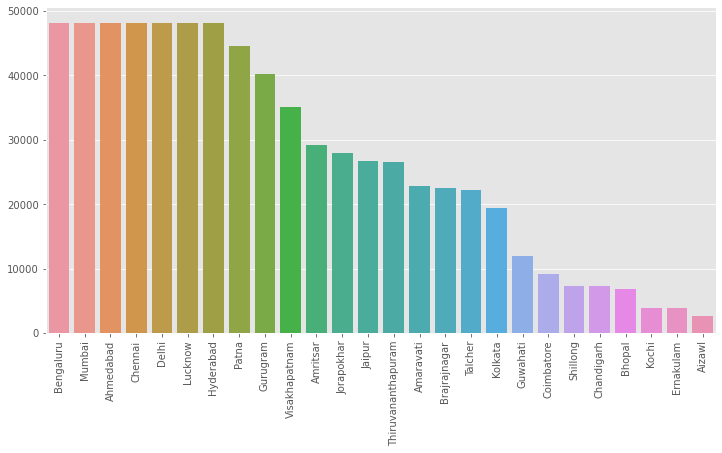

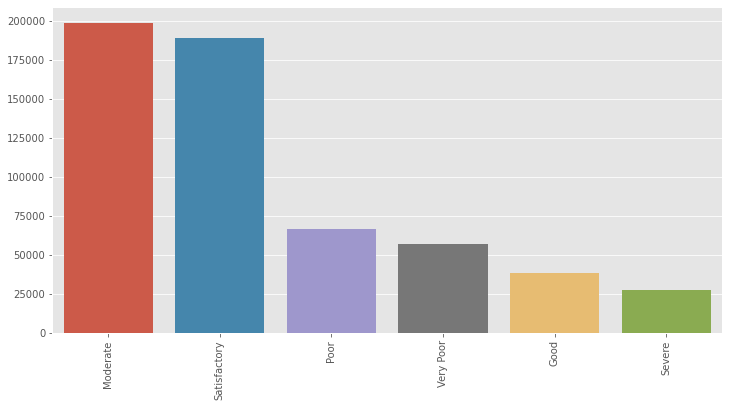

In [25]:
for i in categorical.drop('Datetime',axis=1).columns:
    plt.figure(figsize=(12,6))
    sns.barplot(x=city_hour[i].value_counts().index,y=city_hour[i].value_counts().values,)
    plt.xticks(rotation=90)
    plt.show()

**Observations:**
- These graphs are showing the data about the records we are having in the data as per cities and as per air quality bucket.
- Before moving forward we will take a look at the data and impute the missing values.

In [26]:
city_hour.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000,578795.000000
mean,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537,166.413500
std,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832,162.112729
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000,79.000000
50%,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000
75%,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000,208.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


In [27]:
city_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [28]:
city_hour.head(10)

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
5,Ahmedabad,2015-01-01 06:00:00,NaN,NaN,0.33,15.95,10.82,NaN,0.33,29.87,64.25,0.0,0.0,0.0,NaN,NaN
6,Ahmedabad,2015-01-01 07:00:00,NaN,NaN,0.45,15.94,12.47,NaN,0.45,27.41,191.96,0.0,0.0,0.0,NaN,NaN
7,Ahmedabad,2015-01-01 08:00:00,NaN,NaN,1.03,16.66,16.48,NaN,1.03,20.92,177.21,0.0,0.0,0.0,NaN,NaN
8,Ahmedabad,2015-01-01 09:00:00,NaN,NaN,1.47,16.25,18.02,NaN,1.47,16.45,122.08,0.0,0.0,0.0,NaN,NaN
9,Ahmedabad,2015-01-01 10:00:00,NaN,NaN,2.05,13.78,16.08,NaN,2.05,15.14,NaN,0.0,0.0,0.0,NaN,NaN


<div class="h2">Imputation of null values City Hour Data</div> <a class="anchor" id="Imputation-of-null-values-City-Hour-Data"></a>

In [29]:
## Iterative Imputer is a multivariate imputer that estimates each feature based on the other features 

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [30]:
II=IterativeImputer()

In [31]:
df1=city_hour.drop(['City','Datetime','AQI_Bucket'],axis=1)


In [32]:
df1=pd.DataFrame(II.fit_transform(df1),columns=df1.columns)

In [33]:
df1.isna().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [34]:
df2=city_hour[['City','Datetime']]

In [35]:
final_city_hour=pd.concat([df2,df1],axis=1)

In [36]:
final_city_hour.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01 01:00:00,74.729529,176.324331,1.00,40.01,36.37,34.835398,1.00,122.07,54.170183,0.0,0.0,0.0,320.675957
1,Ahmedabad,2015-01-01 02:00:00,63.818996,144.917028,0.02,27.75,19.73,29.491698,0.02,85.90,48.420389,0.0,0.0,0.0,245.947751
2,Ahmedabad,2015-01-01 03:00:00,55.611523,119.399367,0.08,19.32,11.08,26.525925,0.08,52.83,42.745103,0.0,0.0,0.0,187.900714
3,Ahmedabad,2015-01-01 04:00:00,70.175657,149.047405,0.30,16.45,9.20,19.490652,0.30,39.53,153.580000,0.0,0.0,0.0,225.111122
4,Ahmedabad,2015-01-01 05:00:00,51.105402,104.953506,0.12,14.90,7.85,24.517023,0.12,32.63,39.205186,0.0,0.0,0.0,153.592767


<div class="h2">Checking Variance Inflation Factor City Hour Data</div> <a class="anchor" id="Checking-Variance-Inflation-Factor-City-Hour-Data"></a>

In [37]:
multi_c = final_city_hour.drop(['City','Datetime'],axis=1)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame() 
vif_data["feature"] = multi_c.columns 
vif_data["VIF"] = [variance_inflation_factor(multi_c.values, i) 
                          for i in range(len(multi_c.columns))] 
vif_data.style.background_gradient()

,feature,VIF
0,PM2.5,9.210645
1,PM10,19.475981
2,NO,4.701930
3,NO2,4.686444
4,NOx,7.743691
5,NH3,9.741543
6,CO,4.992215
7,SO2,2.188397
8,O3,2.076272
9,Benzene,4.455632


<div class="h2">Distribution of imputed features and original features</div> <a class="anchor" id="Distribution-of-imputed-features-and-original-features"></a>

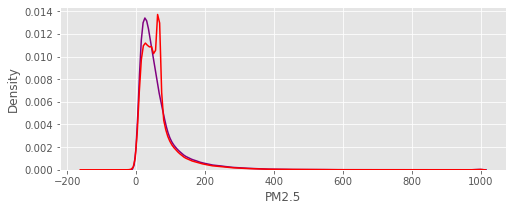

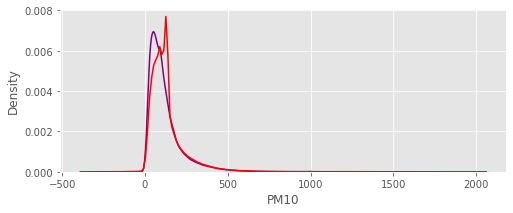

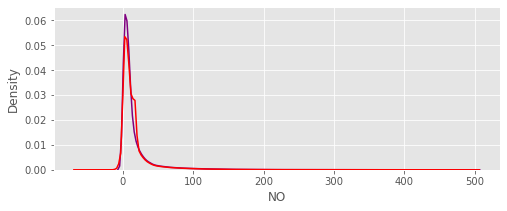

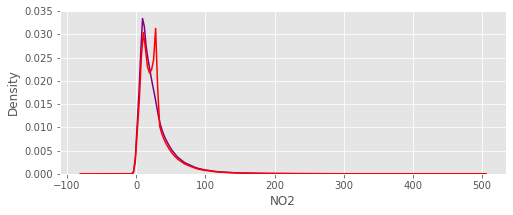

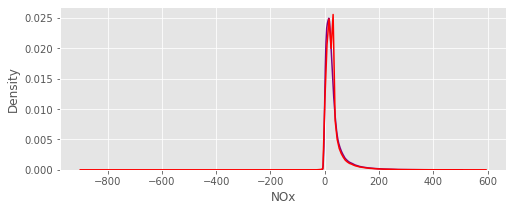

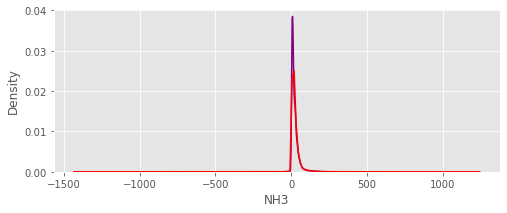

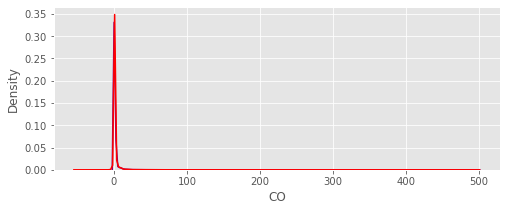

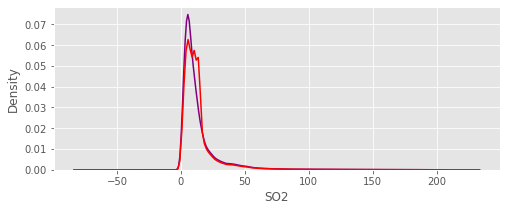

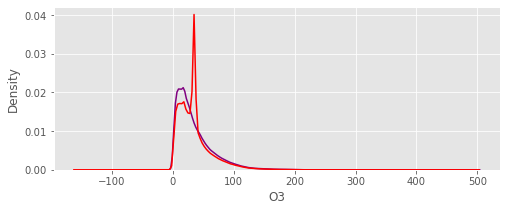

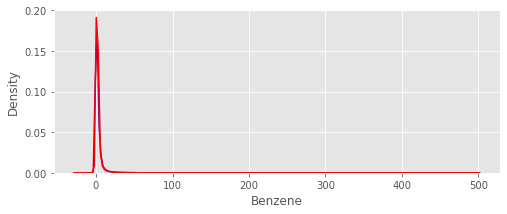

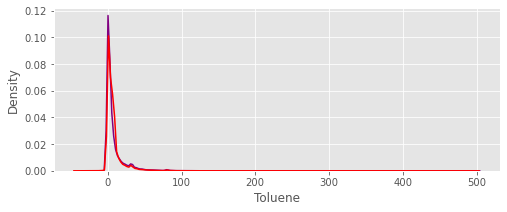

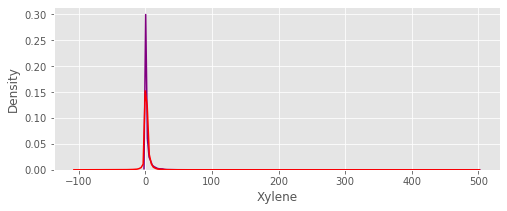

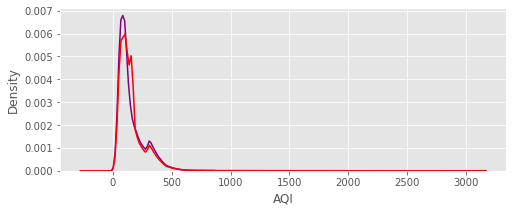

In [39]:
for i in numerical.columns:
    plt.figure(figsize=(8,3))
    sns.distplot(city_hour[i],hist=False,color='purple')
    sns.distplot(final_city_hour[i],hist=False,color='r')
    plt.show()

After the imputation of the null values in the city_hour data we can see their is not change in the distribution of the dataset

In [40]:
final_city_hour.to_csv('final_city_hour.csv')

<div class="h2">Hour Wise Top 5 Polluted Cities</div> <a class="anchor" id="Hour-Wise-Top-5-Polluted-Cities"></a>

### Hour-Wise Top 5 least polluted 

<AxesSubplot:xlabel='City'>

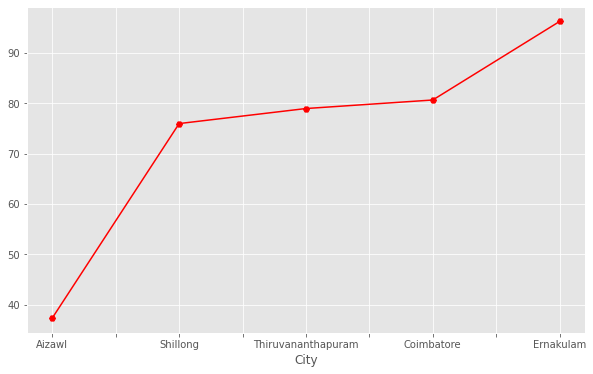

In [41]:
final_city_hour.groupby(by='City').mean().sort_values(by='AQI').head(5)['AQI'].plot(figsize=(10,6),color='red',marker='H')

### Hour Wise  TOP 5 Most Polluted 

<AxesSubplot:xlabel='City'>

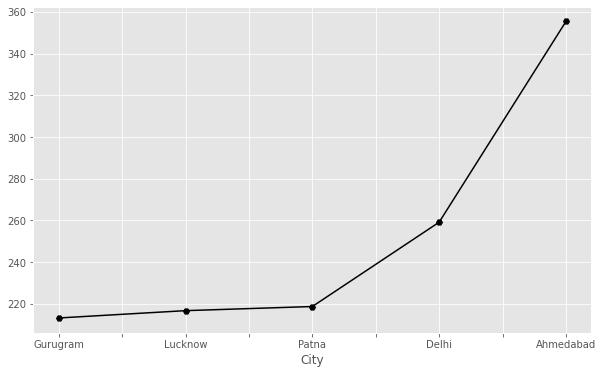

In [42]:
final_city_hour.groupby(by='City').mean().sort_values(by='AQI').tail(5)['AQI'].plot(figsize=(10,6),color='black',marker='H')

<div class="h2">Top 3 Cities with Maximum and Minimum content of each pollutant</div> <a class="anchor" id="Top-3-Cities-with-Maximum-and-Minimum-content-of-each-pollutant"></a>

### Top 3 City with maximum content of each pollutant

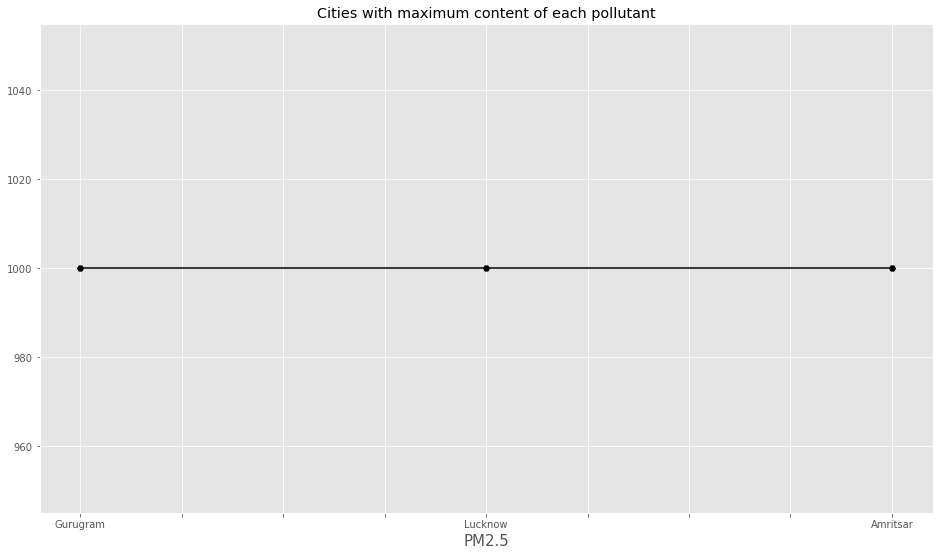

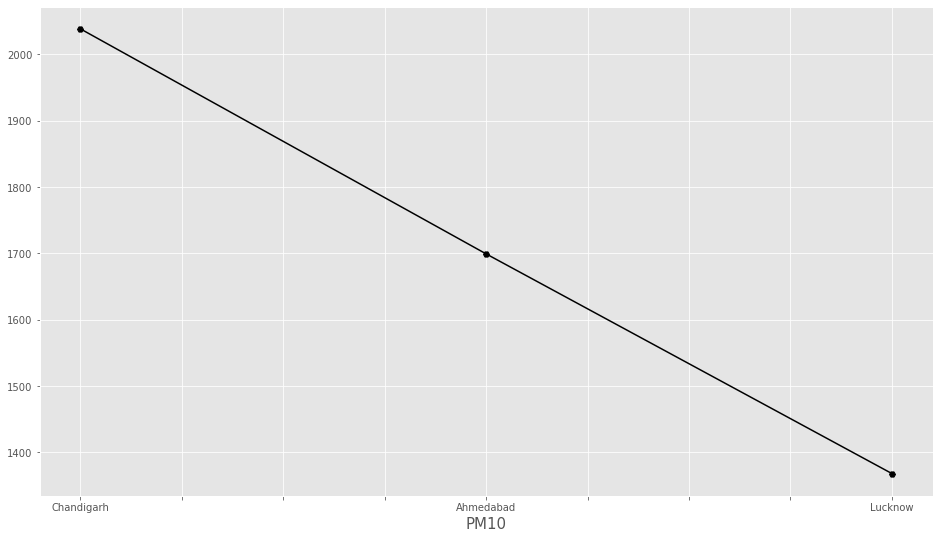

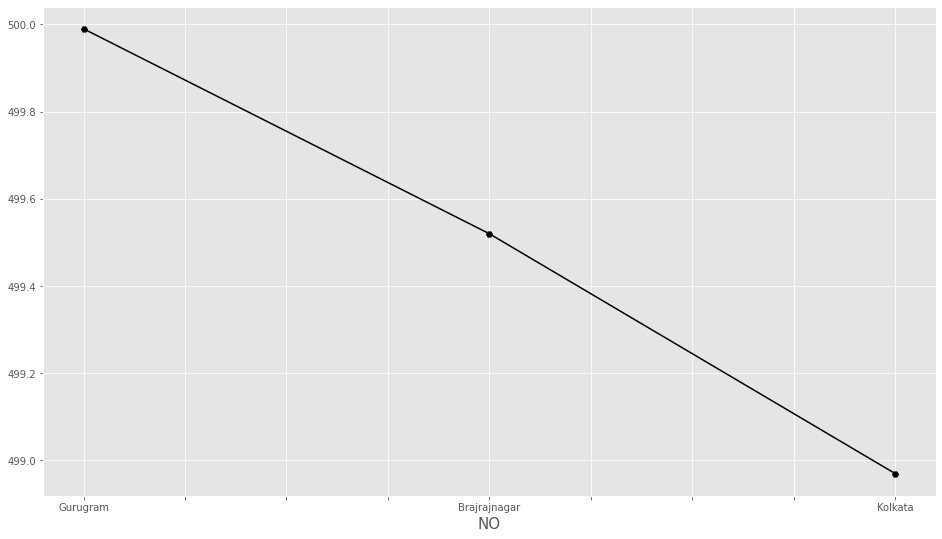

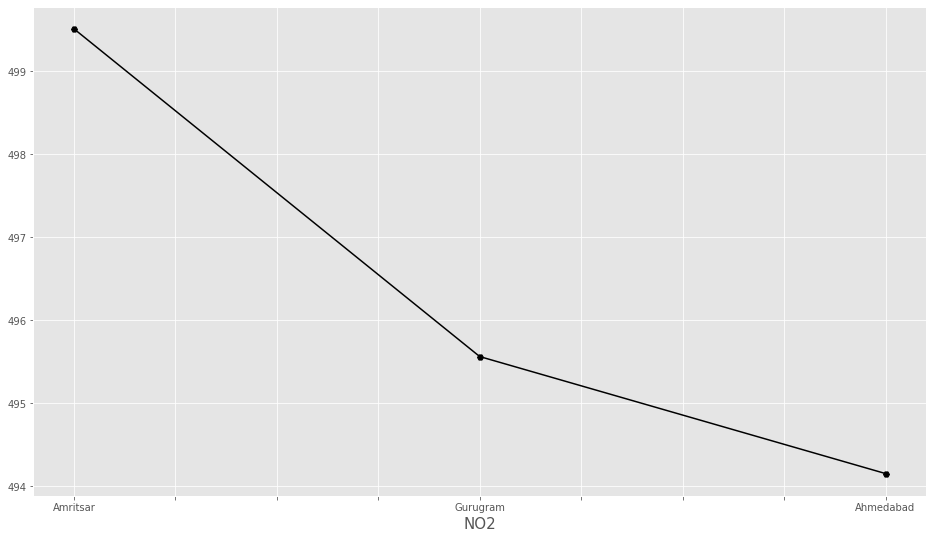

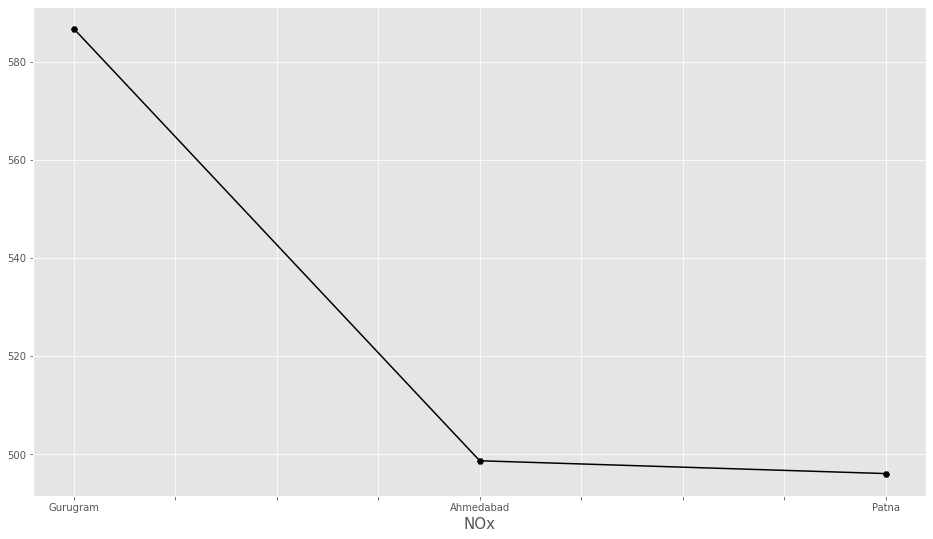

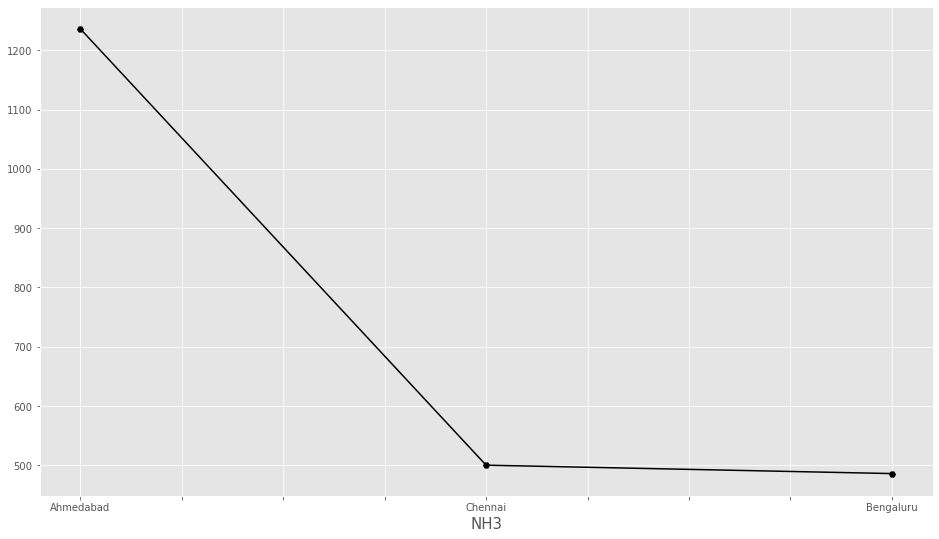

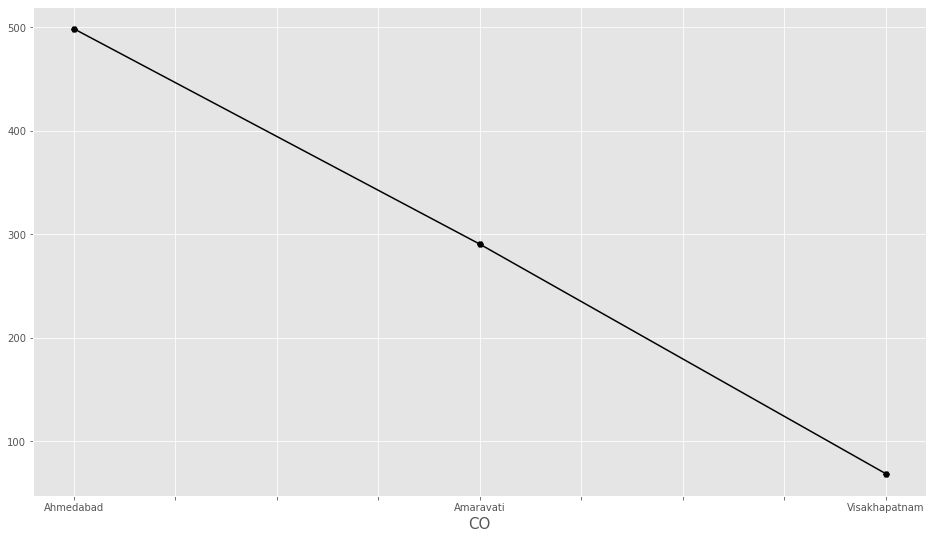

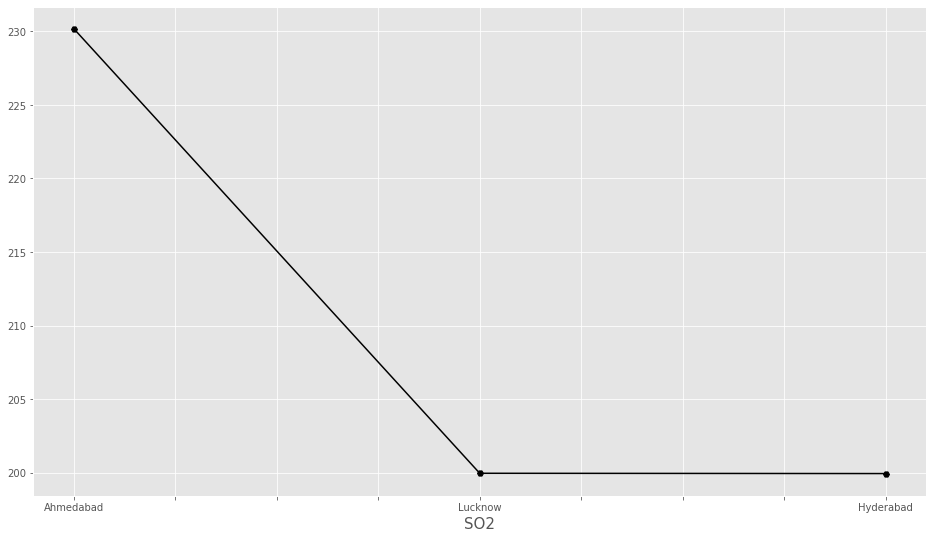

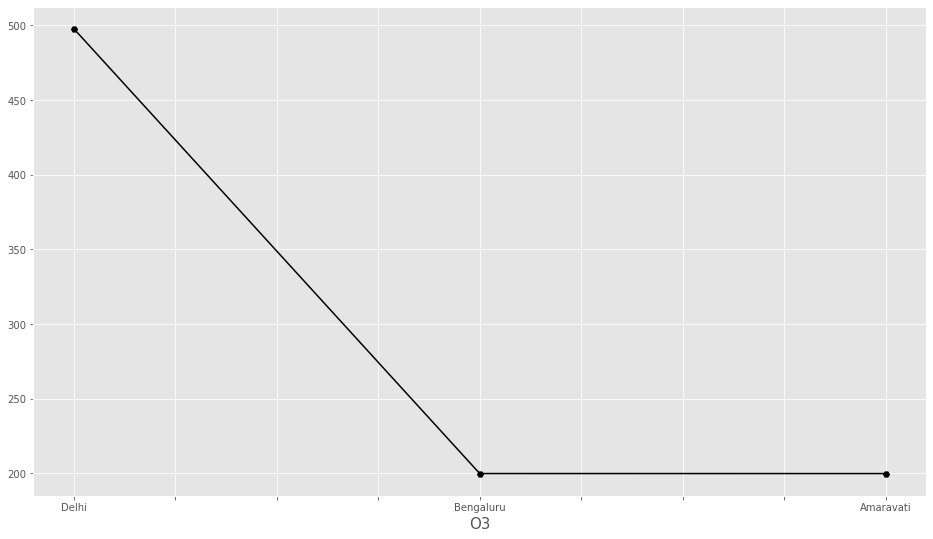

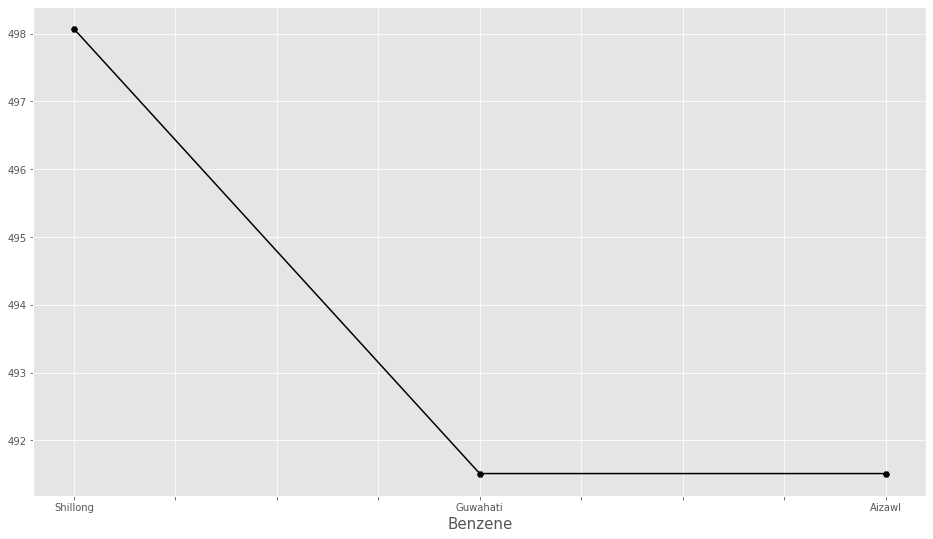

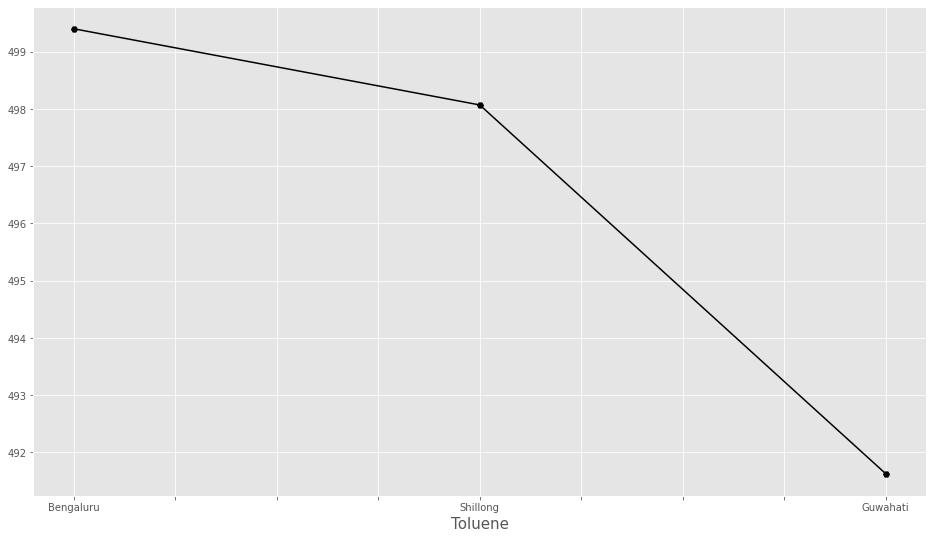

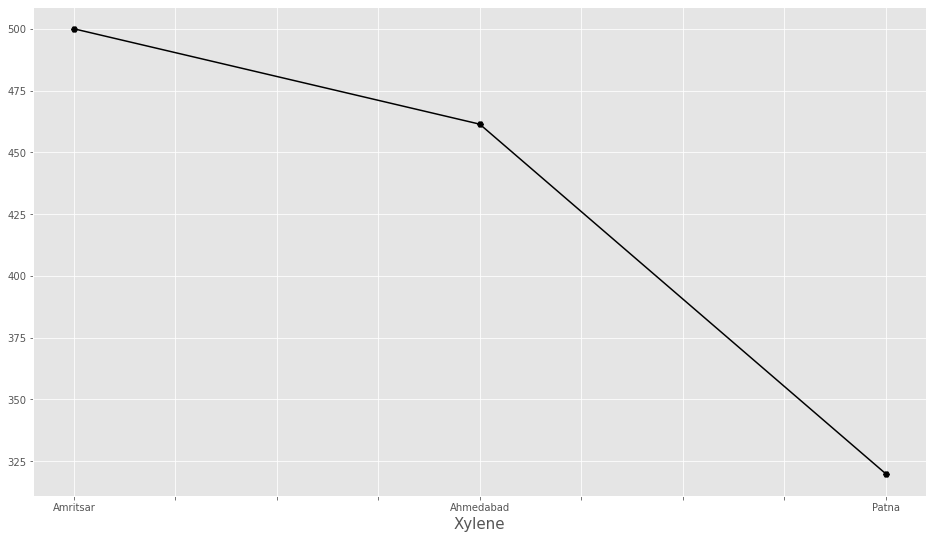

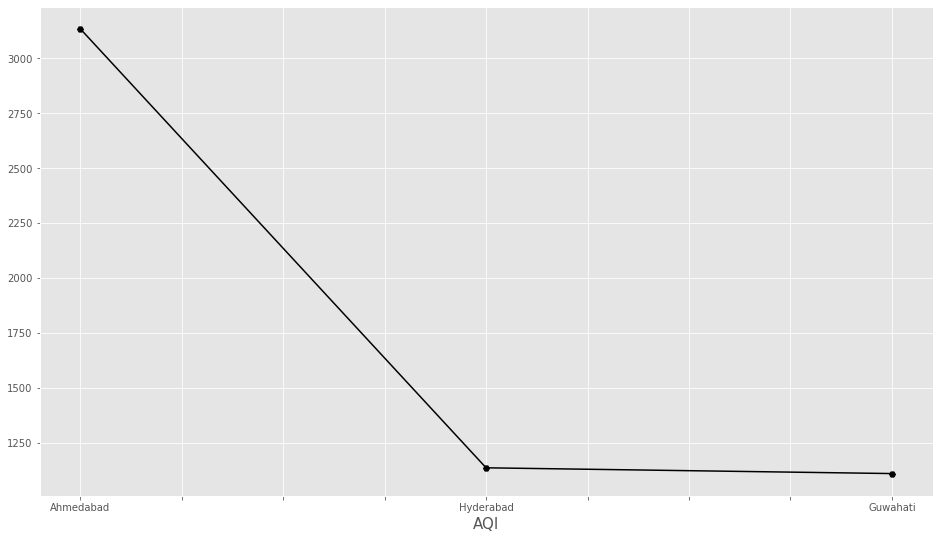

In [43]:
plt.title('Cities with maximum content of each pollutant')
for i in final_city_hour.drop(['City','Datetime'],axis=1).columns:
    final_city_hour.groupby(by='City').max()[i].sort_values(ascending=False).head(3).plot(color='black',marker='H')
    plt.xlabel(i,fontsize=15)
    plt.show()

### Top 3 cities with minimum content of each pollutant

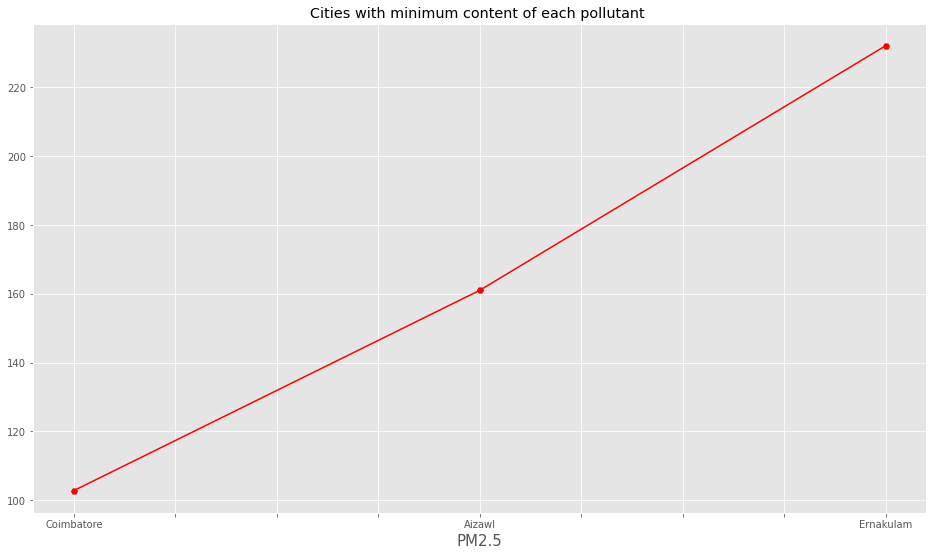

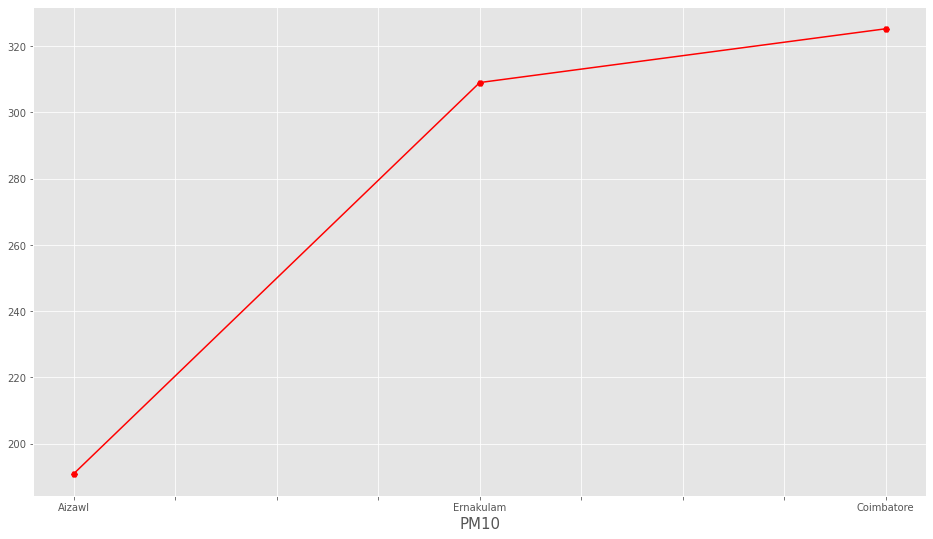

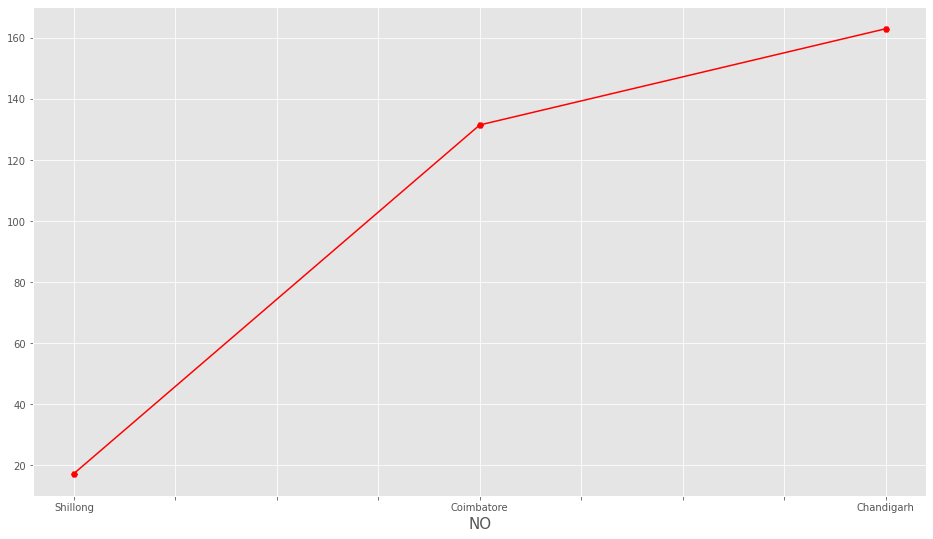

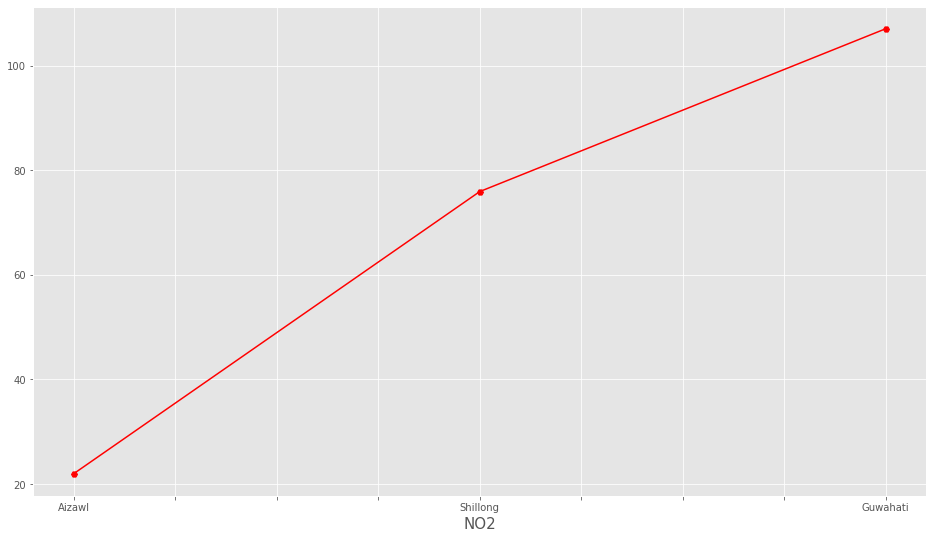

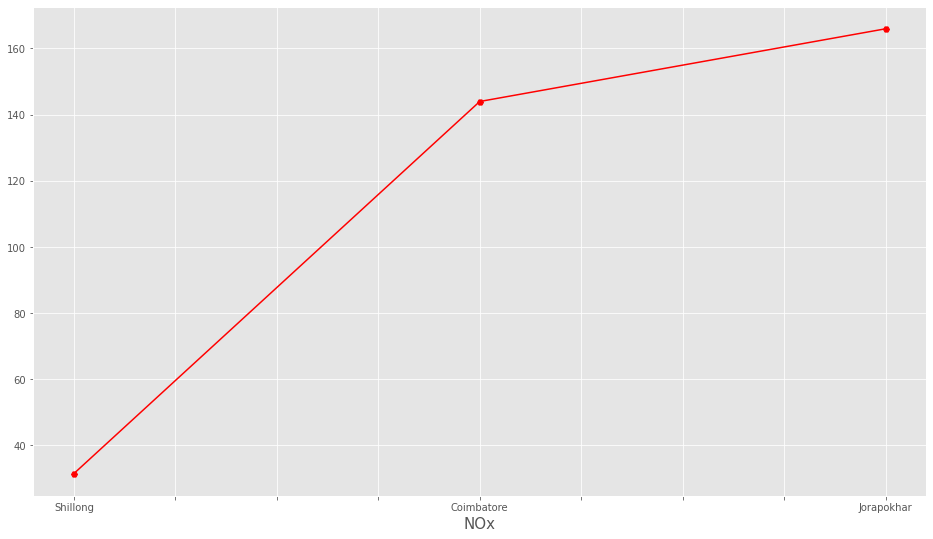

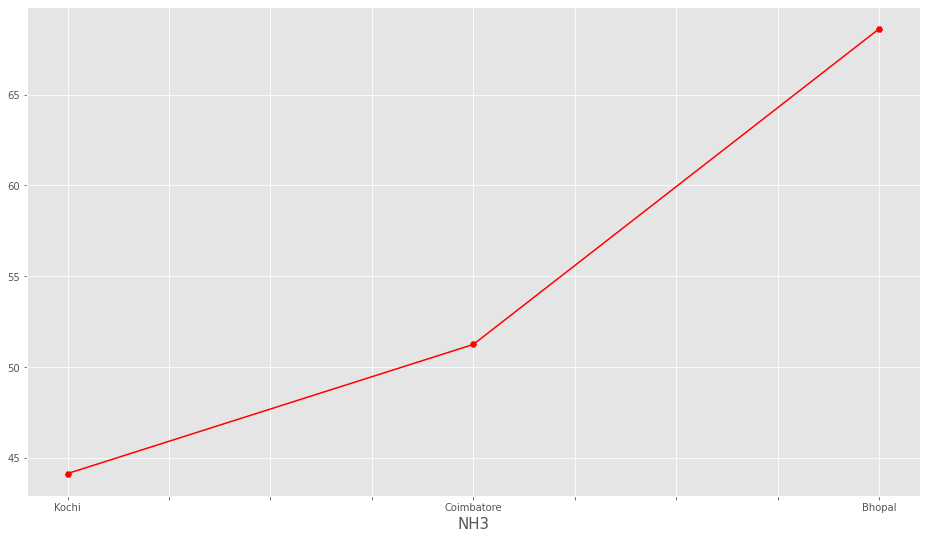

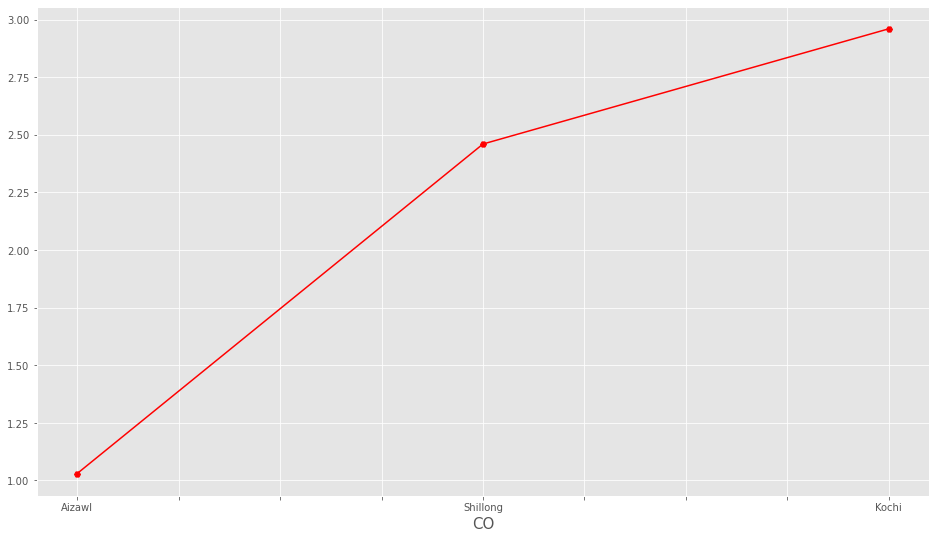

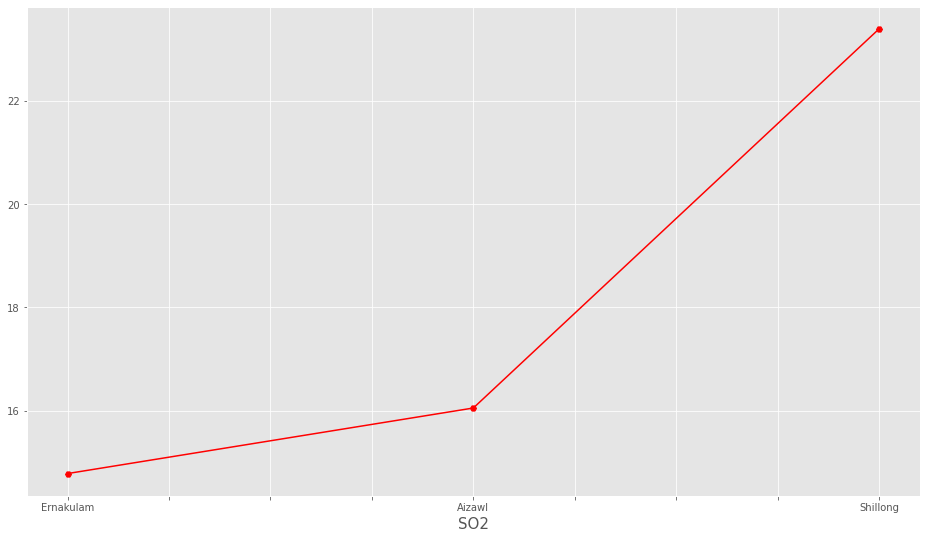

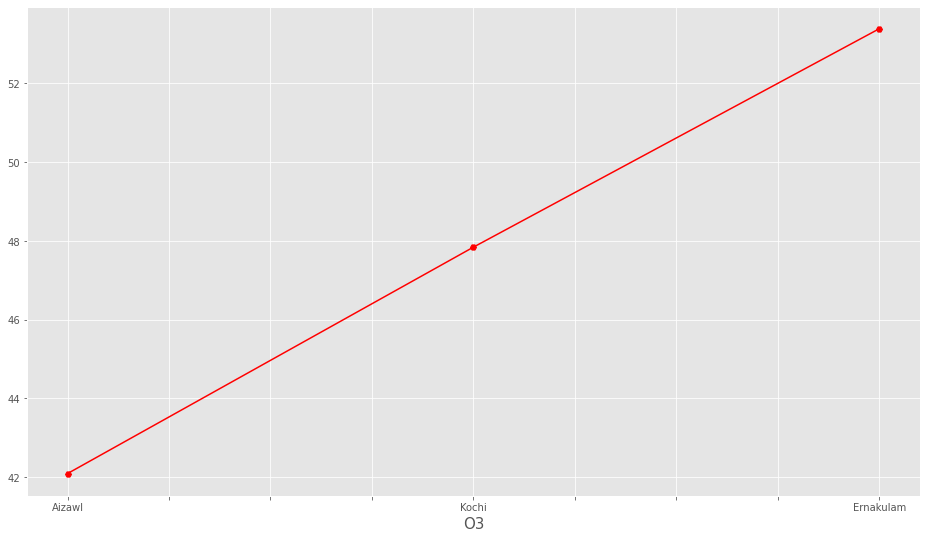

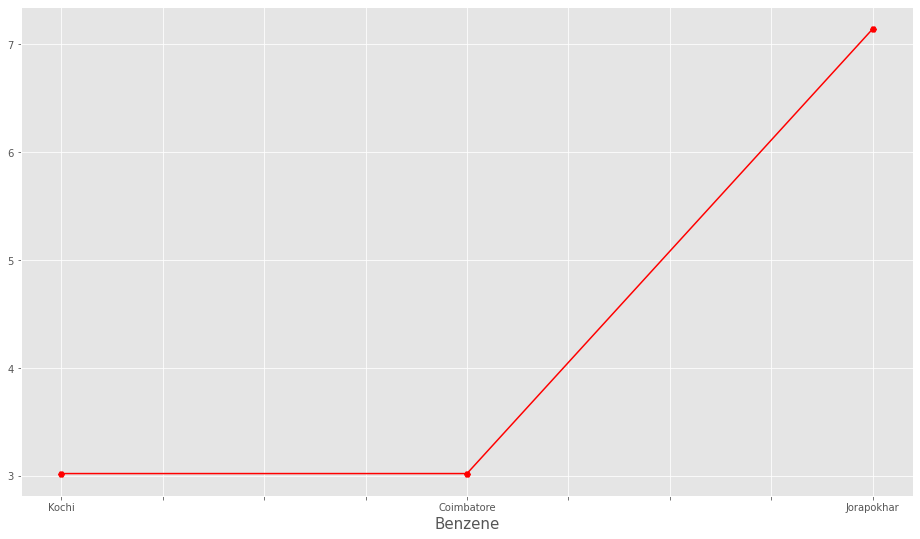

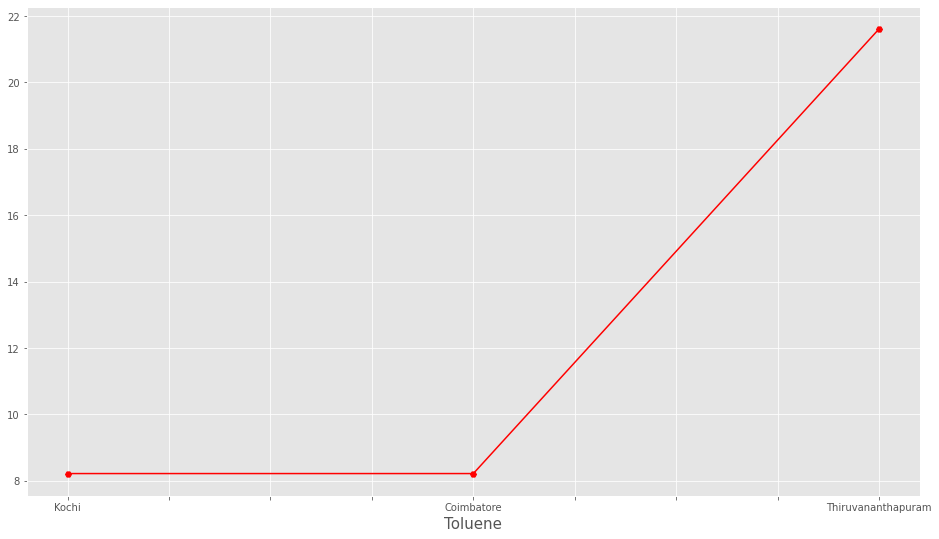

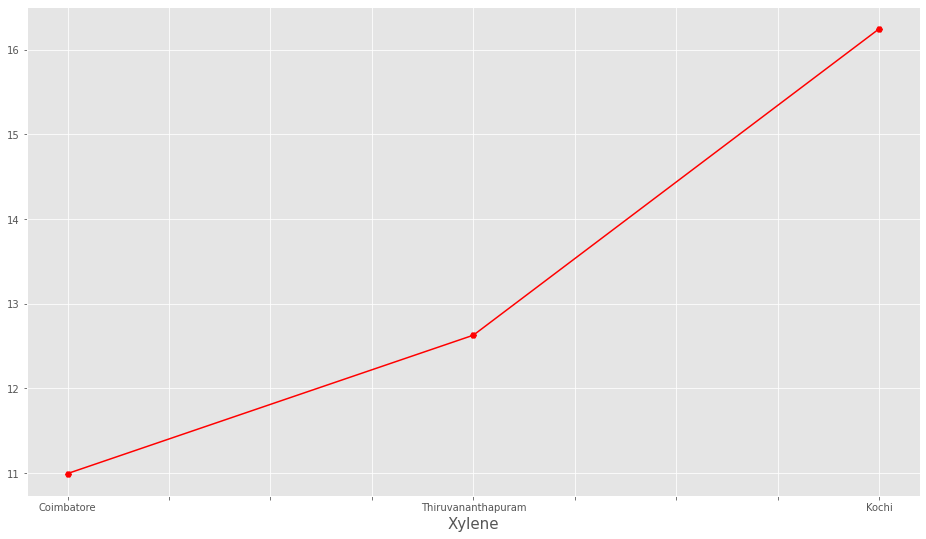

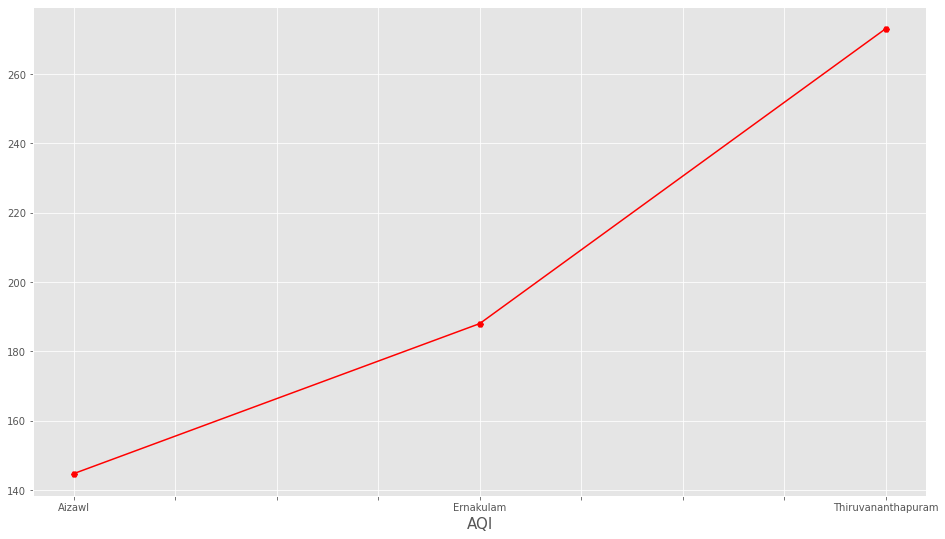

In [44]:
 plt.title('Cities with minimum content of each pollutant ')
for i in final_city_hour.drop(['City','Datetime'],axis=1).columns:
    final_city_hour.groupby(by='City').max()[i].sort_values(ascending=True).head(3).plot(color='red',marker='H')
    plt.xlabel(i,fontsize=15)
    plt.show()

## City Day Data
****

In [45]:
city_day.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [46]:
df1=city_day.drop(['City','Date','AQI_Bucket'],axis=1)

<div class="h2">Imputation of null values City Day Data</div> <a class="anchor" id="Imputation-of-null-values-City-Day-Data"></a>

In [47]:
## Iterative Imputer is a multivariate imputer that estimates each feature based on the other features 

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [48]:
II=IterativeImputer()
df1=pd.DataFrame(II.fit_transform(df1),columns=df1.columns)

In [49]:
df2=city_day[['City','Date','AQI_Bucket']]

In [50]:
final_city_day=pd.concat([df2,df1],axis=1)

In [51]:
final_city_day=final_city_day.drop('AQI_Bucket',axis=1)

In [52]:
final_city_day.isna().sum()

City       0
Date       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [53]:
final_city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,70.247384,145.149912,0.92,18.22,17.15,17.107710,0.92,27.64,133.36,0.00,0.02,0.00,187.848472
1,Ahmedabad,2015-01-02,51.705822,111.013449,0.97,15.69,16.46,13.169056,0.97,24.55,34.06,3.68,5.50,3.77,135.164770
2,Ahmedabad,2015-01-03,38.182483,64.496013,17.40,19.30,29.70,64.154174,17.40,29.07,30.70,6.80,16.40,2.25,298.011990
3,Ahmedabad,2015-01-04,51.048814,106.320601,1.70,18.48,17.97,26.156670,1.70,18.59,36.08,4.43,10.14,1.00,140.462721
4,Ahmedabad,2015-01-05,36.711762,61.328483,22.10,21.42,37.76,72.805995,22.10,39.33,39.31,7.01,18.89,2.78,357.723688


In [54]:
final_city_day.to_csv('final_city_day.csv')

<div class="h2">Top 10 cities having maximum AQI on Daywise</div> <a class="anchor" id="Top-10-cities-having-maximum-AQI-on-Daywise"></a>

In [55]:
city_max_AQI=pd.DataFrame(final_city_day.groupby(by=['City'])['AQI'].max().sort_values(ascending=False).head(10),columns=['AQI'])
city_max_AQI.style.background_gradient()

,AQI
City,
Ahmedabad,2049.000000
Gurugram,1234.119343
Guwahati,1046.361107
Lucknow,997.530179
Shillong,986.383058
Amritsar,869.000000
Hyderabad,737.000000
Delhi,716.000000
Jorapokhar,689.567290


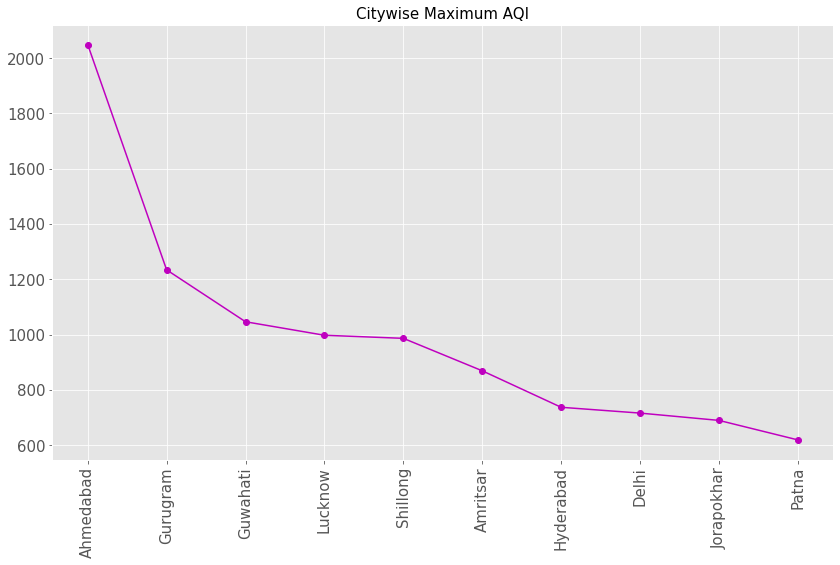

In [56]:
plt.figure(figsize=(14,8))
plt.title('Citywise Maximum AQI',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.plot(city_max_AQI,color='m',marker='o')
plt.show()

<div class="h2">Year wise change in AQI</div> <a class="anchor" id="Year-wise-change-in-AQI"></a>

In [57]:
final_city_day.head()
final_city_day['Year']=pd.DatetimeIndex(final_city_day['Date']).year

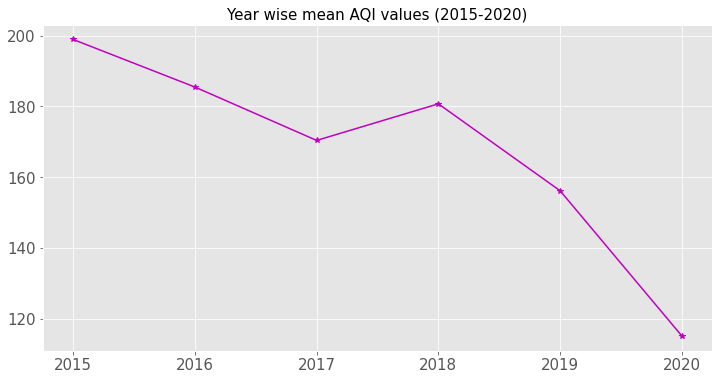

In [58]:
plt.figure(figsize=(12,6))
city_day_year=final_city_day.groupby(by='Year').mean()
plt.plot(city_day_year['AQI'],marker='*',c='m')
plt.title("Year wise mean AQI values (2015-2020)",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<div class="h2">Mean Value of Each Pollutant Yearwise from 2020 to 2015</div> <a class="anchor" id="Mean-Value-of-Each-Pollutant-Yearwise-from-2020-to-2015"></a>
The below heatmap is showing the mean value of different air pollutants in different cities, it is for comparison purpose for different cities, and it is for all the years. Below also there will be some heatmaps, but those will be for specific years.

Mean Value of Each Pollutant in Year  2015


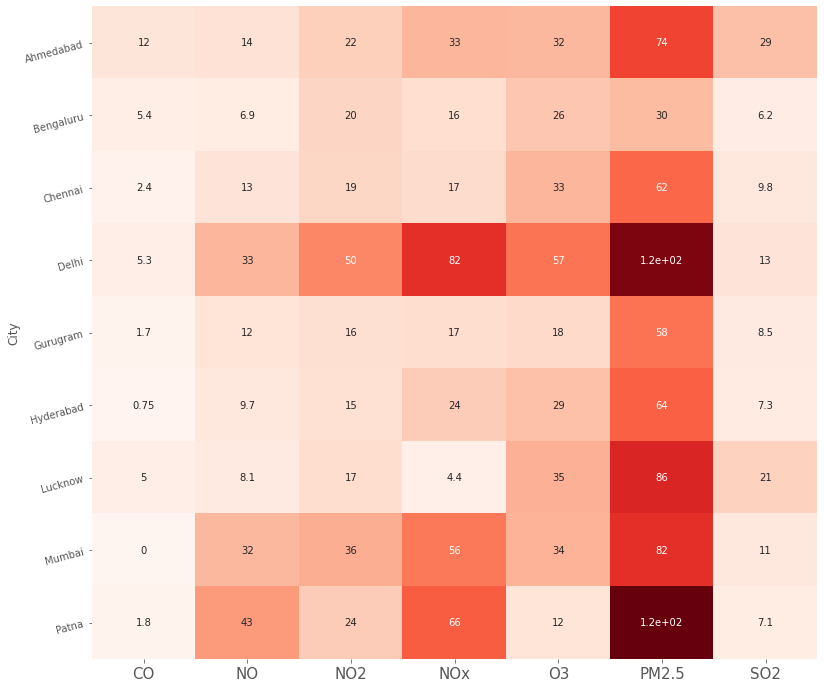


Mean Value of Each Pollutant in Year  2016


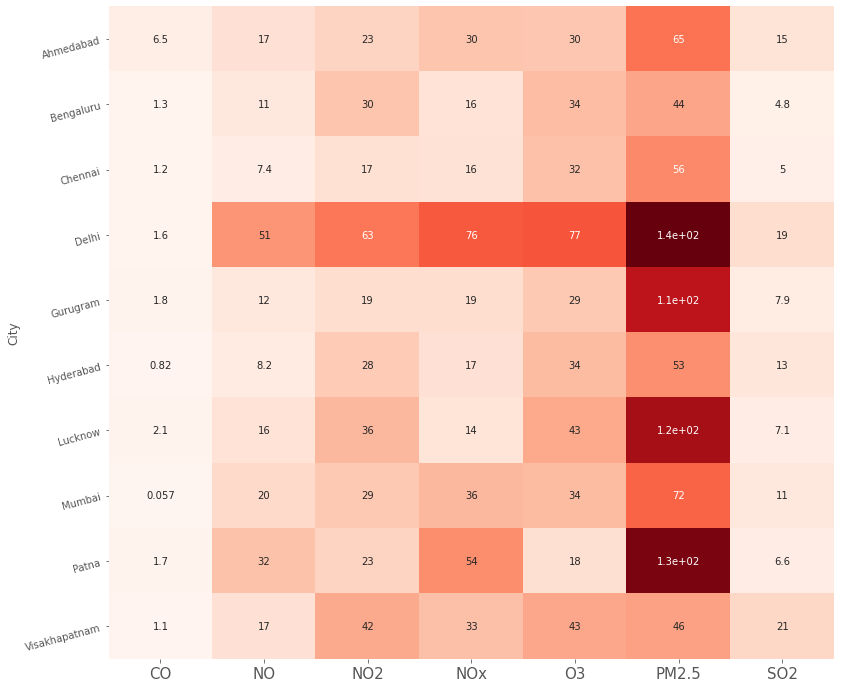


Mean Value of Each Pollutant in Year  2017


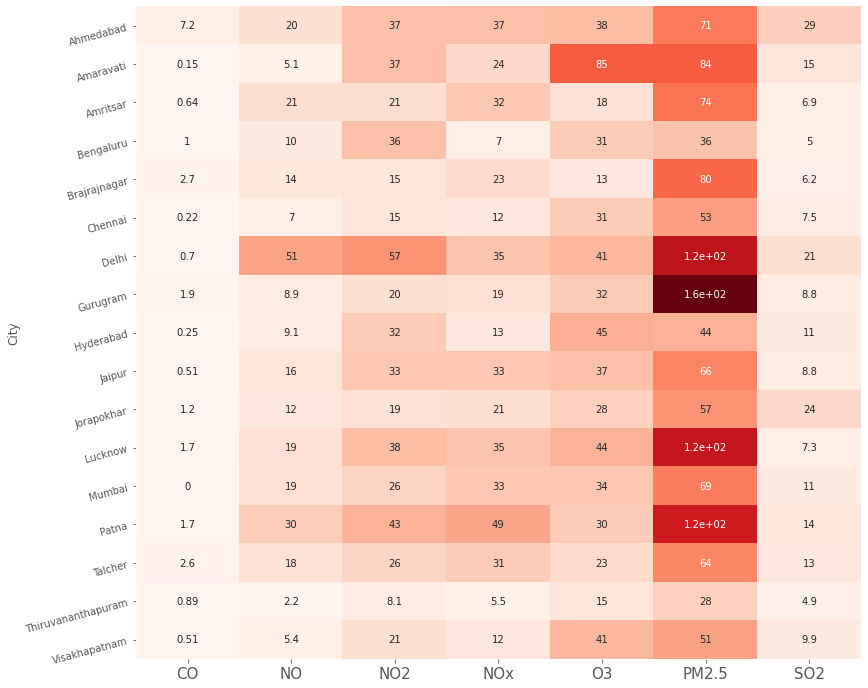


Mean Value of Each Pollutant in Year  2018


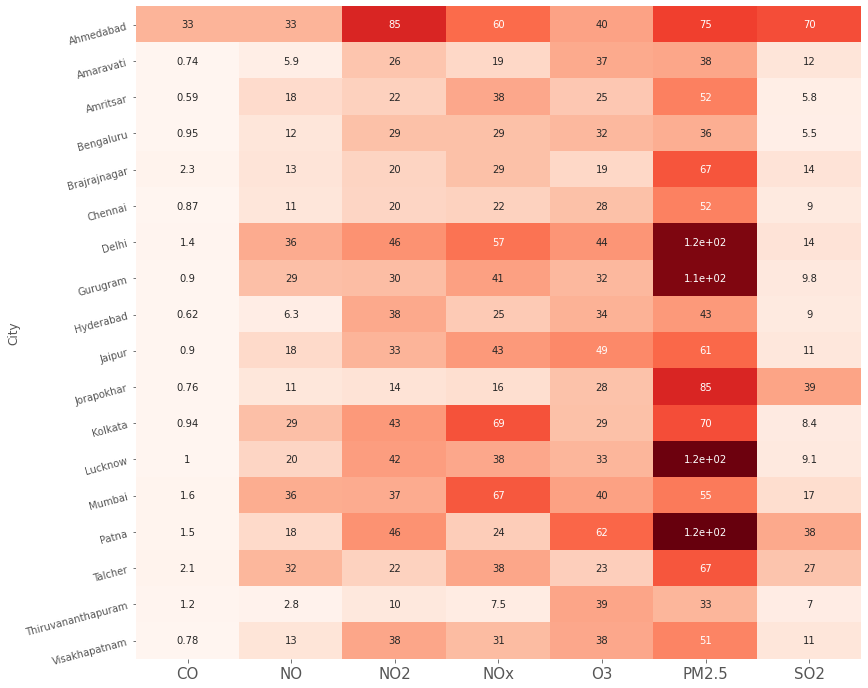


Mean Value of Each Pollutant in Year  2019


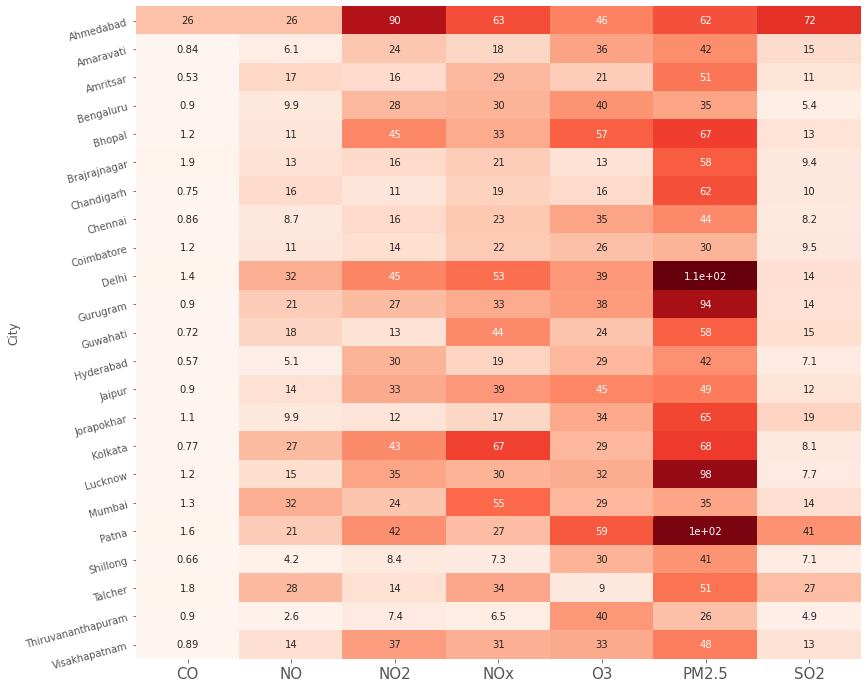


Mean Value of Each Pollutant in Year  2020


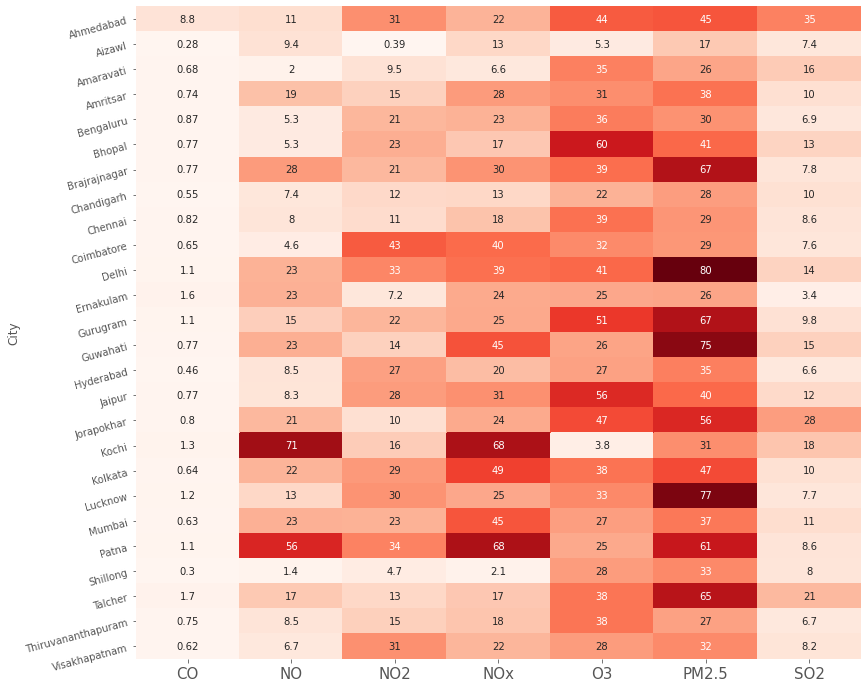

In [59]:
years = [2015,2016,2017,2018,2019,2020]
for i in years:
    print('Mean Value of Each Pollutant in Year ', i)
    plt.figure(figsize=(13,12))
    pivot3=final_city_day[final_city_day["Year"]==i].pivot_table(index="City",values=["PM2.5","NO2","CO","SO2","O3","NOx","NO"])
    sns.heatmap(pivot3,cmap="Reds",cbar=False,annot=True)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=10,rotation=15)
    plt.show()
    print()

<div class="h2">Glimpse on Vehicular and Industrial Pollution Content</div> <a class="anchor" id="Glimpse-on-Vehicular-and-Industrial-Pollution-Content"></a>

Dividing the data set into two part namely Vehicular Pollution content (PM2.5, PM10, NO2, NH3, CO,) and Industrial Pollution content (CO, SO2, O3, Benzene, Toluene, Xylene) and find how these contents correlated with AQI (air quality index)

In [61]:
final_city_day_c = final_city_day.copy() 
final_city_day_c['Vehicular Pollution content'] = final_city_day_c['PM2.5']+final_city_day_c['PM10']+final_city_day_c['NO']+final_city_day_c['NO2']+final_city_day_c['NOx']+final_city_day_c['NH3']+final_city_day_c['CO']
final_city_day_c['Industrial Pollution content'] = final_city_day_c['SO2']+final_city_day_c['O3']+final_city_day_c['Benzene']+final_city_day_c['Toluene']+final_city_day_c['Xylene']
final_city_day_c = final_city_day_c.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
final_city_day_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   City                          29531 non-null  object 
 1   Date                          29531 non-null  object 
 2   AQI                           29531 non-null  float64
 3   Year                          29531 non-null  int64  
 4   Vehicular Pollution content   29531 non-null  float64
 5   Industrial Pollution content  29531 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.4+ MB


### Top 5 Cities contributing in Industrial and Vehicular Pollution since 2015

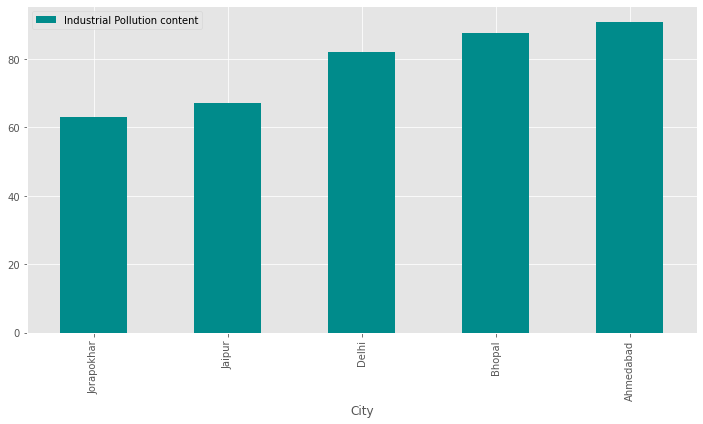

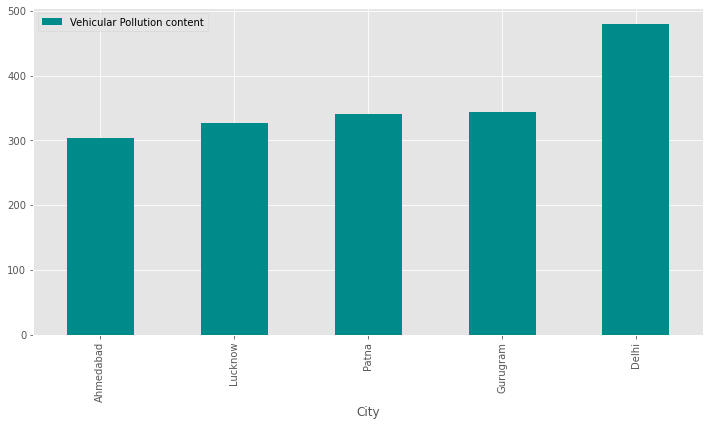

In [62]:
pollution = ['Industrial Pollution content','Vehicular Pollution content']
for i in pollution:
    
    final_city_day_c[['City',i]].groupby(["City"]).median().sort_values(by =i,ascending = True).tail(5).plot(kind='bar',figsize=(12,6),color='darkcyan')
    plt.show()

#### Creating a new columns as Month

In [63]:
final_city_day['Month']=pd.DatetimeIndex(final_city_day['Date']).month
final_city_day.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year,Month
0,Ahmedabad,2015-01-01,70.247384,145.149912,0.92,18.22,17.15,17.107710,0.92,27.64,133.36,0.00,0.02,0.00,187.848472,2015,1
1,Ahmedabad,2015-01-02,51.705822,111.013449,0.97,15.69,16.46,13.169056,0.97,24.55,34.06,3.68,5.50,3.77,135.164770,2015,1
2,Ahmedabad,2015-01-03,38.182483,64.496013,17.40,19.30,29.70,64.154174,17.40,29.07,30.70,6.80,16.40,2.25,298.011990,2015,1
3,Ahmedabad,2015-01-04,51.048814,106.320601,1.70,18.48,17.97,26.156670,1.70,18.59,36.08,4.43,10.14,1.00,140.462721,2015,1
4,Ahmedabad,2015-01-05,36.711762,61.328483,22.10,21.42,37.76,72.805995,22.10,39.33,39.31,7.01,18.89,2.78,357.723688,2015,1


<div class="h2">Change in mean AQI monthwise for years 2015-2020</div> <a class="anchor" id="Change-in-mean-AQI-monthwise-for-years-2015-2020"></a>

Change in Mean AQI Monthwise for year  2015


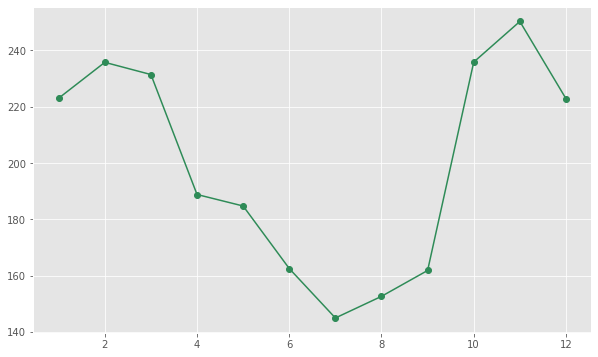

Change in Mean AQI Monthwise for year  2016


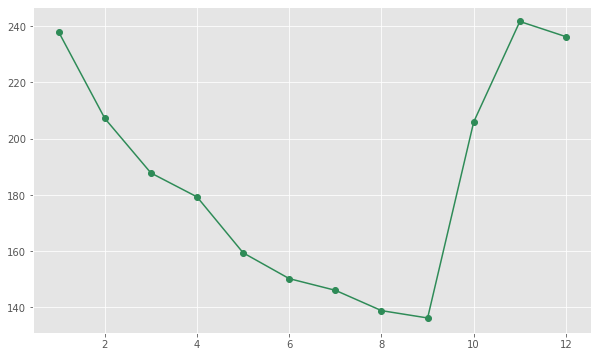

Change in Mean AQI Monthwise for year  2017


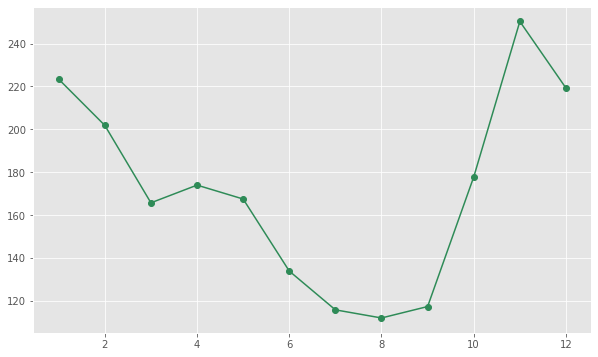

Change in Mean AQI Monthwise for year  2017


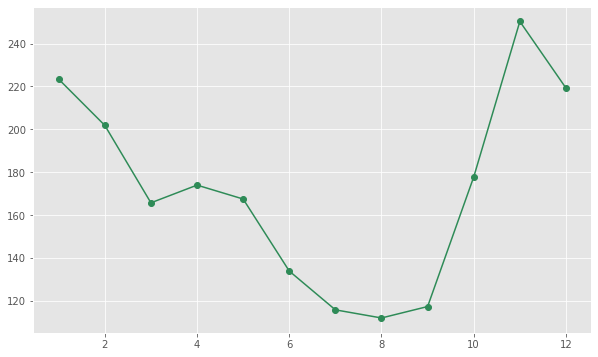

Change in Mean AQI Monthwise for year  2019


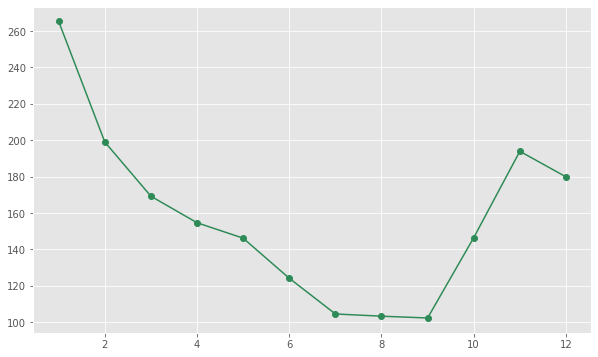

Change in Mean AQI Monthwise for year  2020


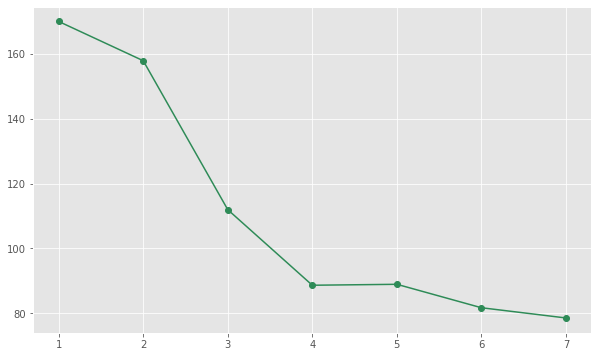

In [64]:
years = [2015,2016,2017,2017,2019,2020]
for i in years: 
    plt.figure(figsize=(10,6))
    print('Change in Mean AQI Monthwise for year ',i)
    year_aqi_trend=final_city_day[final_city_day['Year']==i].groupby(['Month']).mean()
    plt.plot(year_aqi_trend['AQI'],color='seagreen',marker='o')
    plt.show()

#### From the above year and month wise analysis we can clearly see how lockdown has effected the AQI over the country 

As the years progress, a general trend sees the cities move towards the bottom right.
This indicates that data collection has in general become better for these cities over the given time period

<div class="h2">Cities with Maximum AQI on different conditions</div> <a class="anchor" id="Cities-with-Maximum-AQI-on-different-condition"></a>

In this graph we can see that, from Jan 2015 to July 2020. In each month, which city was having highest AQI is shown.

In [65]:
year_month_max_AQI=pd.DataFrame(final_city_day.groupby(['Year','Month']).max()[['City','AQI']]).sort_values(by=['Year','Month'])
pd.options.display.max_rows = 100

In [66]:
year_month_max_AQI

City          AQI
Year Month                            
2015 1             Mumbai  1383.785782
     2             Mumbai  1247.000000
     3             Mumbai   997.530179
     4             Mumbai   774.000000
     5             Mumbai   577.000000
     6              Patna   661.000000
     7              Patna   330.000000
     8              Patna   390.000000
     9              Patna   390.000000
     10             Patna   971.000000
     11             Patna  1065.018341
     12             Patna   586.000000
2016 1              Patna   619.000000
     2              Patna   510.000000
     3              Patna  1179.902796
     4              Patna   392.000000
     5              Patna   494.000000
     6              Patna   737.000000
     7      Visakhapatnam  1842.000000
     8      Visakhapatnam   798.000000
     9      Visakhapatnam   449.000000
     10     Visakhapatnam   721.000000
     11     Visakhapatnam   716.000000
     12     Visakhapatnam   623.554503
2017 1      Visakhapatnam   531.000000
     2      Visakhapatnam   520.000000
     3      Visakhapatnam   417.000000
     4      Visakhapatnam   497.000000
     5      Visakhapatnam   550.000000
     6      Visakhapatnam   648.000000
     7      Visakhapatnam  1063.633236
     8      Visakhapatnam  1234.119343
     9      Visakhapatnam   271.000000
     10     Visakhapatnam  1426.000000
     11     Visakhapatnam  1747.000000
     12     Visakhapatnam   773.000000
2018 1      Visakhapatnam  1414.000000
     2      Visakhapatnam  2049.000000
     3      Visakhapatnam  1434.000000
     4      Visakhapatnam  1235.000000
     5      Visakhapatnam   587.000000
     6      Visakhapatnam   869.000000
     7      Visakhapatnam   613.000000
     8      Visakhapatnam   623.000000
     9      Visakhapatnam   876.000000
     10     Visakhapatnam  1561.000000
     11     Visakhapatnam  1672.000000
     12     Visakhapatnam  1558.000000
2019 1      Visakhapatnam  1719.000000
     2      Visakhapatnam  1261.000000
     3      Visakhapatnam  1459.000000
     4      Visakhapatnam  1346.000000
     5      Visakhapatnam  1046.361107
     6      Visakhapatnam   640.000000
     7      Visakhapatnam   610.000000
     8      Visakhapatnam   957.000000
     9      Visakhapatnam   986.383058
     10     Visakhapatnam  1595.000000
     11     Visakhapatnam   884.000000
     12     Visakhapatnam   712.000000
2020 1      Visakhapatnam  1716.827062
     2      Visakhapatnam  1291.000000
     3      Visakhapatnam   988.000000
     4      Visakhapatnam   315.000000
     5      Visakhapatnam   256.000000
     6      Visakhapatnam   575.570750
     7      Visakhapatnam   164.863553

### Highest AQI recorded City, Date

In [67]:
city_day[city_day['AQI']==city_day['AQI'].max()]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1145,Ahmedabad,2018-02-19,242.66,NaN,132.47,199.17,246.03,NaN,132.47,NaN,44.06,0.74,5.81,3.21,2049.0,Severe


### Citywise Year having maximum AQI

In [68]:
city_year_max_aqi=final_city_day.groupby(['City','Year']).max()['AQI']

In [69]:
pd.options.display.max_rows = 200

In [70]:
pd.DataFrame(city_year_max_aqi)

AQI
City               Year             
Ahmedabad          2015  1383.785782
                   2016  1842.000000
                   2017  1747.000000
                   2018  2049.000000
                   2019  1719.000000
                   2020  1716.827062
Aizawl             2020    92.000000
Amaravati          2017   310.000000
                   2018   276.000000
                   2019   312.000000
                   2020   177.000000
Amritsar           2017   539.000000
                   2018   869.000000
                   2019   399.000000
                   2020   478.000000
Bengaluru          2015   335.673809
                   2016   342.000000
                   2017   273.000000
                   2018   352.000000
                   2019   174.000000
                   2020   137.000000
Bhopal             2019   312.000000
                   2020   307.000000
Brajrajnagar       2017   334.700853
                   2018   355.000000
                   2019   334.000000
                   2020   551.985046
Chandigarh         2019   335.000000
                   2020   170.000000
Chennai            2015   448.000000
                   2016   449.000000
                   2017   431.000000
                   2018   258.000000
                   2019   306.000000
                   2020   230.000000
Coimbatore         2019   126.212993
                   2020   164.863553
Delhi              2015   483.000000
                   2016   716.000000
                   2017   677.000000
                   2018   593.000000
                   2019   659.000000
                   2020   492.000000
Ernakulam          2020   180.000000
Gurugram           2015   164.863553
                   2016  1179.902796
                   2017  1234.119343
                   2018   670.000000
                   2019   607.000000
                   2020   429.000000
Guwahati           2019  1046.361107
                   2020   462.000000
Hyderabad          2015   661.000000
                   2016   737.000000
                   2017   281.000000
                   2018   174.000000
                   2019   186.000000
                   2020   154.000000
Jaipur             2017   336.000000
                   2018   434.000000
                   2019   457.000000
                   2020   199.000000
Jorapokhar         2017   264.312944
                   2018   689.567290
                   2019   604.000000
                   2020   269.000000
Kochi              2020   277.000000
Kolkata            2018   431.000000
                   2019   475.000000
                   2020   347.000000
Lucknow            2015   997.530179
                   2016   604.000000
                   2017   581.000000
                   2018   485.000000
                   2019   457.000000
                   2020   442.000000
Mumbai             2015   318.109892
                   2016   561.016585
                   2017   280.514903
                   2018   366.493587
                   2019   283.000000
                   2020   260.000000
Patna              2015   586.000000
                   2016   619.000000
                   2017   550.000000
                   2018   490.000000
                   2019   568.000000
                   2020   372.000000
Shillong           2019   986.383058
                   2020   182.000000
Talcher            2017   170.158258
                   2018   525.000000
                   2019   584.407714
                   2020   444.813556
Thiruvananthapuram 2017   230.000000
                   2018   220.000000
                   2019   180.000000
                   2020   215.000000
Visakhapatnam      2016   188.000000
                   2017   296.000000
                   2018   387.000000
                   2019   343.000000
                   2020   326.000000

In [71]:
city_year_month_max_AQI=final_city_day.groupby(['City','Year','Month']).max()['AQI']


pd.options.display.max_rows = 1005
city_year_month_max_AQI=pd.DataFrame(city_year_month_max_AQI)

In [72]:
city_year_month_max_AQI

AQI
City               Year Month             
Ahmedabad          2015 1      1383.785782
                        2      1247.000000
                        3       883.000000
                        4       774.000000
                        5       577.000000
                        6       310.000000
                        7       330.000000
                        8       310.000000
                        9       390.000000
                        10      971.000000
                        11     1065.018341
                        12      164.863553
                   2016 1       164.863553
                        2       164.863553
                        3       164.863553
                        4       164.863553
                        5       164.863553
                        6       272.000000
                        7      1842.000000
                        8       798.000000
                        9       306.000000
                        10      721.000000
                        11      420.000000
                        12      164.863553
                   2017 1       150.685909
                        2       150.685909
                        3       164.863553
                        4       164.863553
                        5       164.863553
                        6       164.863553
                        7       164.863553
                        8       164.863553
                        9       164.863553
                        10     1426.000000
                        11     1747.000000
                        12      773.000000
                   2018 1      1414.000000
                        2      2049.000000
                        3      1434.000000
                        4      1235.000000
                        5       587.000000
                        6       556.000000
                        7       613.000000
                        8       623.000000
                        9       876.000000
                        10     1561.000000
                        11     1672.000000
                        12     1558.000000
                   2019 1      1719.000000
                        2      1261.000000
                        3      1459.000000
                        4      1346.000000
                        5       813.000000
                        6       640.000000
                        7       610.000000
                        8       957.000000
                        9       799.166906
                        10     1595.000000
                        11      884.000000
                        12      712.000000
                   2020 1      1716.827062
                        2      1291.000000
                        3       988.000000
                        4       183.000000
                        5       146.000000
                        6       575.570750
                        7       119.000000
Aizawl             2020 3        92.000000
                        4        76.000000
                        5        46.000000
                        6        33.000000
                        7        20.000000
Amaravati          2017 11      198.000000
                        12      310.000000
                   2018 1       235.000000
                        2       136.000000
                        3       126.080095
                        4       102.887565
                        5       192.000000
                        6       155.000000
                        7       106.000000
                        8       112.000000
                        9       164.863553
                        10      214.833896
                        11      235.504826
                        12      276.000000
                   2019 1       312.000000
                        2       178.000000
                        3       130.000000
                        4       124.000000
                        5       158.000000
                        6       107.0000

### Station Datasets

In [73]:
station_hour.isna().sum()

StationId           0
Datetime            0
PM2.5          647689
PM10          1119252
NO             553711
NO2            528973
NOx            490808
NH3           1236618
CO             499302
SO2            742737
O3             725973
Benzene        861579
Toluene       1042366
Xylene        2075104
AQI            570190
AQI_Bucket     570190
dtype: int64

In [74]:
df1=station_hour.drop(['StationId','Datetime','AQI_Bucket'],axis=1)
df2=station_hour[['StationId','Datetime','AQI_Bucket']]


In [75]:
df1=pd.DataFrame(II.fit_transform(df1),columns=df1.columns)
final_station_hour=pd.concat([df1,df2],axis=1)

#### Missing Values in Stations 

In [76]:
missing_val(stations)

,Missing_values,Percent_missing_values
Status,97,42.170000


In [77]:
stations.isna().sum()

StationId       0
StationName     0
City            0
State           0
Status         97
dtype: int64

In [78]:
stations=stations.fillna('Unknown')

In [79]:
stations.head()

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,Unknown
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,Unknown
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,Unknown
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


<div class="h2">Stations in each state</div> <a class="anchor" id="Stations-in-each-state"></a>

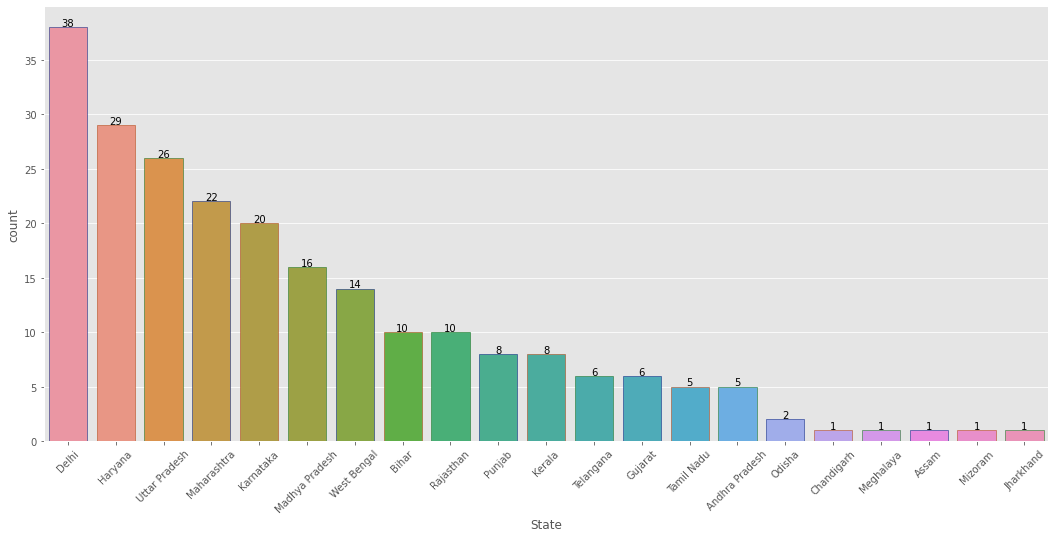

In [80]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=45)
graph=sns.countplot(x=stations['State'],order=stations['State'].value_counts().index,edgecolor=sns.color_palette("dark", 3))
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        stations['State'].value_counts()[i],ha="center")
    i += 1
plt.show()

In [81]:
stations['Status'].value_counts()

Active      131
Unknown      97
Inactive      2
Name: Status, dtype: int64

Visualizing Stations Status 

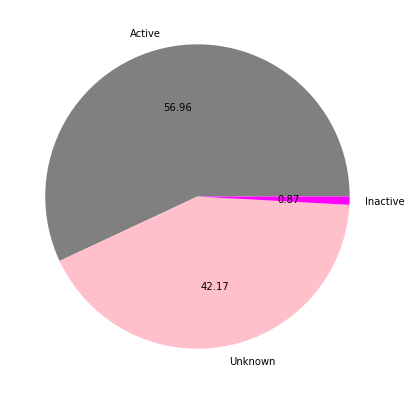

In [82]:
plt.figure(figsize=(14,7))
plt.pie(stations['Status'].value_counts(),colors=['gray','pink','magenta'],autopct='%.2f',labels=['Active','Unknown','Inactive'])
plt.show()

#### 5 CITIES WITH MAXIMUM NUMBER OF STATIONS

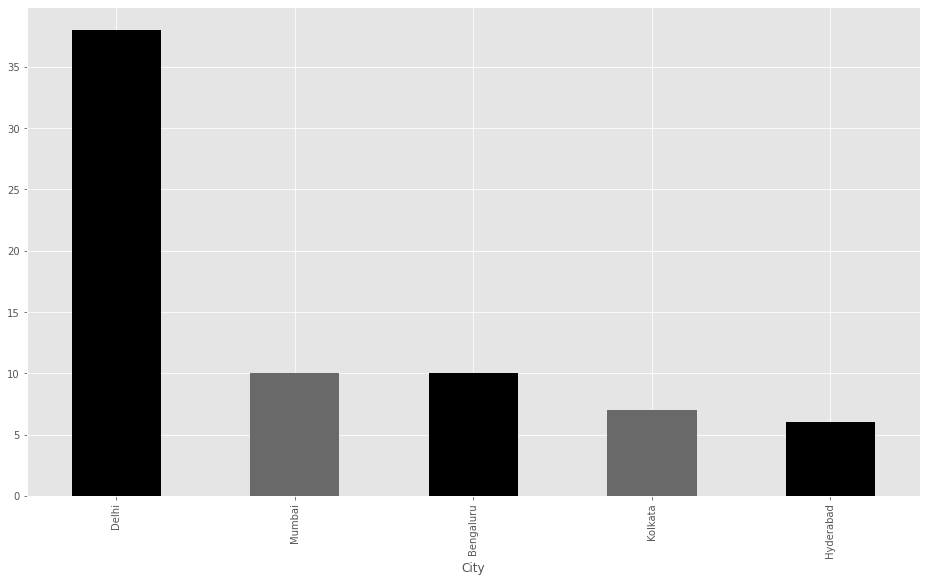

In [83]:
stations.groupby(by='City')['StationId'].count().sort_values(ascending=False).head(5).plot(kind='bar',color=['black','dimgray'])
plt.show()

In [84]:
state_status=pd.DataFrame(stations.groupby(by='State')['Status'].value_counts())
state_status.style.background_gradient('winter_r')

In [85]:
full_data = final_station_hour.merge(stations,on='StationId').head()
full_data.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,StationId,Datetime,AQI_Bucket,StationName,City,State,Status
0,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,151.750876,AP001,2017-11-24 17:00:00,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,156.874722,AP001,2017-11-24 18:00:00,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,165.272589,AP001,2017-11-24 19:00:00,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,169.522274,AP001,2017-11-24 20:00:00,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,156.591148,AP001,2017-11-24 21:00:00,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


<div class="h2">Correlation (Heatmap) of City Hour Data</div> <a class="anchor" id="Correlation-(Heatmap)-of-City-Hour-Data"></a>

In [86]:
cor = final_city_hour.corr()
cor.style.background_gradient(cmap='coolwarm')

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.866451,0.383928,0.315899,0.377391,0.212654,0.079379,0.134904,0.046728,0.030833,0.135311,0.121539,0.513788
PM10,0.866451,1.000000,0.399436,0.404226,0.411860,0.129269,0.070955,0.232062,0.078873,0.033207,0.209066,0.278388,0.622273
NO,0.383928,0.399436,1.000000,0.456701,0.820774,0.315792,0.313271,0.142945,-0.114989,0.069012,0.186048,0.124562,0.352483
NO2,0.315899,0.404226,0.456701,1.000000,0.643662,0.305115,0.266955,0.326443,0.055190,0.052046,0.268306,0.114326,0.433619
NOx,0.377391,0.411860,0.820774,0.643662,1.000000,0.296365,0.281691,0.170111,-0.080448,0.074877,0.221820,0.071240,0.380048
NH3,0.212654,0.129269,0.315792,0.305115,0.296365,1.000000,0.694165,0.194087,-0.032438,0.023902,0.100737,-0.387821,0.547276
CO,0.079379,0.070955,0.313271,0.266955,0.281691,0.694165,1.000000,0.301894,-0.047966,0.070695,0.236687,0.127462,0.587577
SO2,0.134904,0.232062,0.142945,0.326443,0.170111,0.194087,0.301894,1.000000,0.106126,0.033391,0.260391,0.186143,0.409864
O3,0.046728,0.078873,-0.114989,0.055190,-0.080448,-0.032438,-0.047966,0.106126,1.000000,-0.007341,0.038901,-0.047764,0.095714
Benzene,0.030833,0.033207,0.069012,0.052046,0.074877,0.023902,0.070695,0.033391,-0.007341,1.000000,0.776981,0.541362,0.055201


In [87]:
final_city_hour.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01 01:00:00,74.729529,176.324331,1.00,40.01,36.37,34.835398,1.00,122.07,54.170183,0.0,0.0,0.0,320.675957
1,Ahmedabad,2015-01-01 02:00:00,63.818996,144.917028,0.02,27.75,19.73,29.491698,0.02,85.90,48.420389,0.0,0.0,0.0,245.947751
2,Ahmedabad,2015-01-01 03:00:00,55.611523,119.399367,0.08,19.32,11.08,26.525925,0.08,52.83,42.745103,0.0,0.0,0.0,187.900714
3,Ahmedabad,2015-01-01 04:00:00,70.175657,149.047405,0.30,16.45,9.20,19.490652,0.30,39.53,153.580000,0.0,0.0,0.0,225.111122
4,Ahmedabad,2015-01-01 05:00:00,51.105402,104.953506,0.12,14.90,7.85,24.517023,0.12,32.63,39.205186,0.0,0.0,0.0,153.592767


In [88]:
final_station_hour.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,StationId,Datetime,AQI_Bucket
0,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,151.750876,AP001,2017-11-24 17:00:00,NaN
1,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,156.874722,AP001,2017-11-24 18:00:00,NaN
2,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,165.272589,AP001,2017-11-24 19:00:00,NaN
3,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,169.522274,AP001,2017-11-24 20:00:00,NaN
4,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,156.591148,AP001,2017-11-24 21:00:00,NaN


In [89]:
final_station_hour.shape

(2589083, 16)

<div class="h2">Splitting of Data into X,Y and training and validation</div> <a class="anchor" id="Splitting-of-Data-into-X,Y-and-training-and-validation"></a>

In [90]:
y=final_station_hour['AQI']
X=final_station_hour.drop(['StationId','Datetime','AQI_Bucket','AQI'],axis=1)

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.7)

<div class="h2">Statistical Test for Significance of Data</div> <a class="anchor" id="Statistical-Test-for-Significance-of-Data"></a>

In [93]:
from scipy.stats import ttest_ind

Null Hypothesis :- The sample data is the representation of population data 

Alternate Hypothesis :- The sample is not the representation of population data 

In [94]:
ttest_ind(X,xtrain)

Ttest_indResult(statistic=array([-0.23548626, -0.1061635 , -0.41177213, -0.61086815, -0.32990641,
       -0.35056389, -0.86645969, -0.2506561 ,  0.67275395, -0.48319607,
       -0.7766932 , -0.8189051 ]), pvalue=array([0.81383135, 0.91545263, 0.68050647, 0.54128691, 0.74147069,
       0.72591557, 0.38623817, 0.80208002, 0.50110387, 0.62895655,
       0.43733984, 0.4128406 ]))

p_val>0.05 , thus we fail to rejects the null hypothesis and thus infer that our sample data is the clear representation of the population data 

<div class="h2">OLS Model on full data</div> <a class="anchor" id="OLS-Model-on-full-data"></a>

In [96]:
import statsmodels.api as sm 
Xc=sm.add_constant(X)
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AQI   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 5.568e+05
Date:                Tue, 09 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:02:07   Log-Likelihood:            -1.4574e+07
No. Observations:             2589083   AIC:                         2.915e+07
Df Residuals:                 2589070   BIC:                         2.915e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6484      0.097    203.197      0.000      19.459      19.838
PM2.5          0.0691      0.001     62.394      0.000       0.067       0.071
PM10           0.6253      0.001    837.833      0.000       0.624       0.627
NO            -0.3362      0.002   -144.312      0.000      -0.341      -0.332
NO2            0.0543      0.002     25.853      0.000       0.050       0.058
NOx            0.1594      0.002     71.830      0.000       0.155       0.164
NH3            0.9144      0.004    227.861      0.000       0.907       0.922
CO             5.9857      0.011    526.839      0.000       5.963       6.008
SO2            0.2273      0.004     60.548      0.000       0.220       0.235
O3             0.4335      0.001    396.768      0.000       0.431       0.436
Benzene        0.3376      0.005     64.162      0.000       0.327       0.348
Toluene       -0.3899      0.003   -116.435      0.000      -0.396      -0.383
Xylene         1.6071      0.014    111.702      0.000       1.579       1.635
==============================================================================
Omnibus:                  2191376.278   Durbin-Watson:                   0.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        528939895.254
Skew:                           3.262   Prob(JB):                         0.00
Kurtosis:                      72.718   Cond. No.                         563.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="h2">Assumptions of Linear Regression</div> <a class="anchor" id="Assumptions-of-Linear-Regression"></a>

### Assumption 1 Normality of the data 

In [ ]:
from scipy.stats import shapiro
for i in X.columns:
    print(shapiro(X[i]))

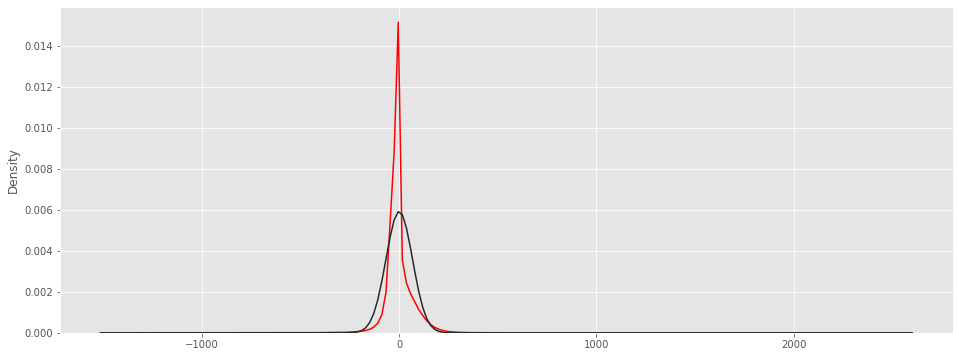

In [102]:
from scipy.stats import norm
residuals=model.resid 
norm.fit(residuals)
plt.figure(figsize=(16,6))
sns.distplot(residuals,hist=False,fit=norm,color='red')
plt.show()

In [103]:
residuals.mean()

9.127010205336573e-11

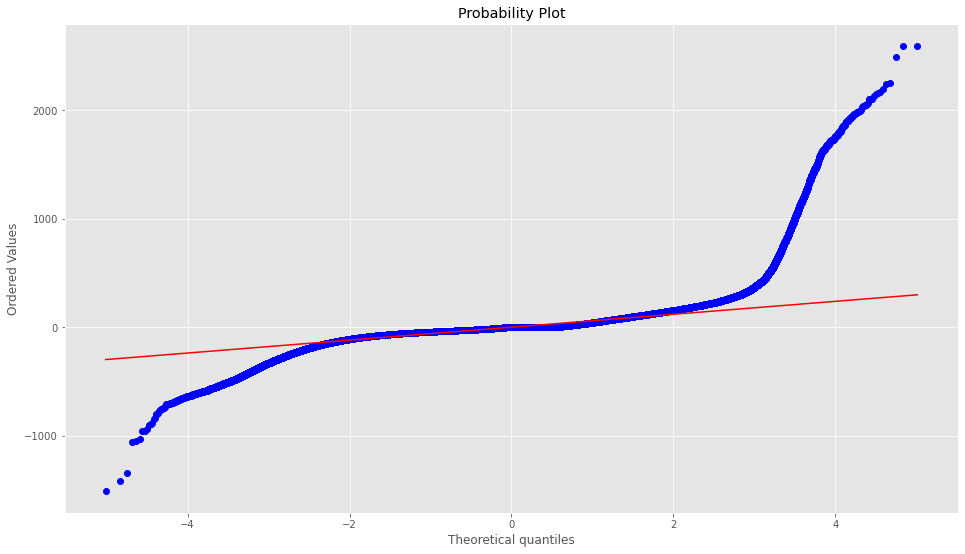

In [104]:
import scipy.stats as stats
stats.probplot(residuals,plot=plt)
plt.show()

###### QQ plot shows that the residuals are close to the normality around the means . It deviates from normality at extreme values 

In [105]:
stats.jarque_bera(residuals)

Jarque_beraResult(statistic=528939895.254463, pvalue=0.0)

h0: Data is normal 

ha: Data is not normal

Since the pval is 0 we reject the null hypothesis and accept the alternate hypothesis
HEnce conclude that the data is not normal

However our data is so large that ,the normality assumption is not needed as the central limit theoram ensures that the distribution
will appromixate normality

### Assumption 2 Multicollinearity 

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame() 
vif_data["feature"] = Xc.columns 
vif_data["VIF"] = [variance_inflation_factor(Xc.values, i) 
                          for i in range(len(Xc.columns))]
vif_data.style.background_gradient('Greys_r')

,feature,VIF
0,const,5.333553
1,PM2.5,4.441996
2,PM10,5.072354
3,NO,6.152315
4,NO2,2.531561
5,NOx,8.098802
6,NH3,5.815284
7,CO,2.436376
8,SO2,1.272130
9,O3,1.097239


##### From VIF we can conclude that there is no multicollinearity in our data further with the cmap we can assure this 

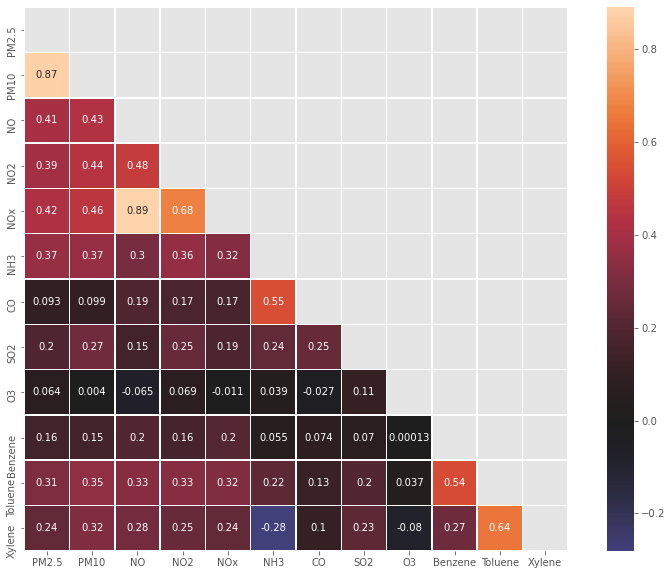

In [107]:
plt.figure(figsize=(14,10))
corrback=X.corr()
mask=np.zeros_like(corrback,dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
sns.heatmap(corrback,annot=True,square=True,mask=mask,center=0,linewidth=0.5)
plt.show()

### Assumption 3 Test for Homoscedasticity

In [108]:
residuals=model.resid
y_pred=model.predict(Xc)

In [109]:
# sns.regplot(x=y_pred,y=residuals,lowess=True,line_kws={'color':'red'})
# plt.xlabel('Predicted Values ')
# plt.ylabel('Residuals')
# plt.show()

In [110]:
import statsmodels.stats.api as sms 
name=['F-Stat','p-value']
test = sms.het_goldfeldquandt(y=model.resid,x=Xc)

In [111]:
test

(0.29305931997541246, 0.9999999999999999, 'increasing')

h0: variance is constant across the range of data

ha: Variance is not constant across the raneg of data

Since p value is greater than 0.05 ,H0 is accepted to conclude that 
variance of residuals is constant across the data 

### Test for Linearity in Parameters 

In [112]:
# H0: The parameters are linear 
# Ha: The parameters are not linear 

In [113]:
sm.stats.diagnostic.linear_rainbow(model,frac=0.05)

(0.5530691720359139, 0.9999999999999999)

Since , pval >0.05 we  strongly accept the  null hypothesis that states our parameters are linear .

In [114]:
station_hour = pd.read_csv('station_hour.csv')

In [115]:
station_hour.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [116]:
station_hour.shape

(2589083, 16)

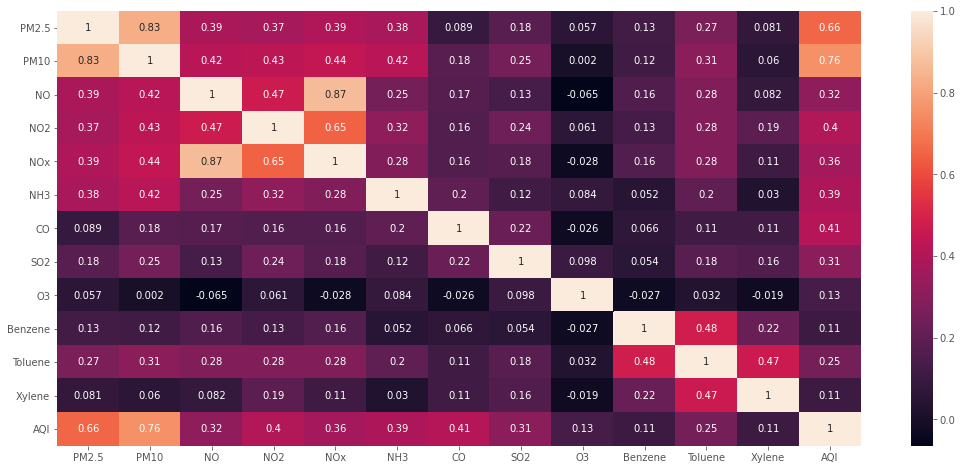

In [117]:
plt.figure(figsize=(18,8))
sns.heatmap(station_hour.corr(),annot=True)
plt.show()

In [118]:
missing_val(station_hour)

,Missing_values,Percent_missing_values
Xylene,2075104,80.150000
NH3,1236618,47.760000
PM10,1119252,43.230000
Toluene,1042366,40.260000
Benzene,861579,33.280000
SO2,742737,28.690000
O3,725973,28.040000
PM2.5,647689,25.020000
AQI,570190,22.020000
AQI_Bucket,570190,22.020000


<div class="h2">Imputation of null values Station Hour Data</div> <a class="anchor" id="Imputation-of-null-values-Station-Hour-Data"></a>

In [119]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
station_hour['Datetime'] = pd.to_datetime(station_hour['Datetime'])
station_hour = station_hour[station_hour['Datetime'].dt.year.isin([2018,2019,2020])]

In [124]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

iterimp = IterativeImputer(estimator = lr)

station_hour_AQI = pd.DataFrame(iterimp.fit_transform(station_hour.drop(['AQI_Bucket','StationId','Datetime'],axis=1)),columns = station_hour.drop(['AQI_Bucket','StationId','Datetime'],axis=1).columns)

In [125]:
missing_val(station_hour_AQI)

,Missing_values,Percent_missing_values


In [126]:
station_hour_AQI.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,48.00,86.00,0.18,17.00,9.12,16.07,0.1,11.73,78.40,0.20,1.90,0.10,124.0
1,53.25,100.50,0.35,16.40,9.05,16.27,0.1,12.85,79.88,0.20,2.90,0.18,117.0
2,57.50,108.00,0.20,14.78,8.00,17.07,0.1,11.93,88.67,0.25,3.43,0.10,115.0
3,61.75,109.75,0.38,13.08,7.27,18.62,0.1,12.27,81.32,0.23,2.75,0.10,114.0
4,68.00,113.25,0.20,11.97,6.50,20.23,0.1,13.10,80.85,0.28,2.32,0.03,112.0


<div class="h2">Clustering of Data using KMeans</div> <a class="anchor" id="Clustering-of-Data-using-KMeans"></a>

In [127]:
station_hour_cluster = station_hour_AQI.drop('AQI',axis=1)

In [128]:
from sklearn.model_selection import train_test_split

train_df,test_df = train_test_split(station_hour_cluster,test_size=0.3,random_state=4)

train_df.shape, test_df.shape

((1297979, 12), (556277, 12))

In [130]:
from sklearn.cluster import KMeans, DBSCAN
# Kmeans
iner=[]
for i in range(1,8):
    km = KMeans(n_clusters = i)
    km.fit(train_df)
    iner.append(km.inertia_)

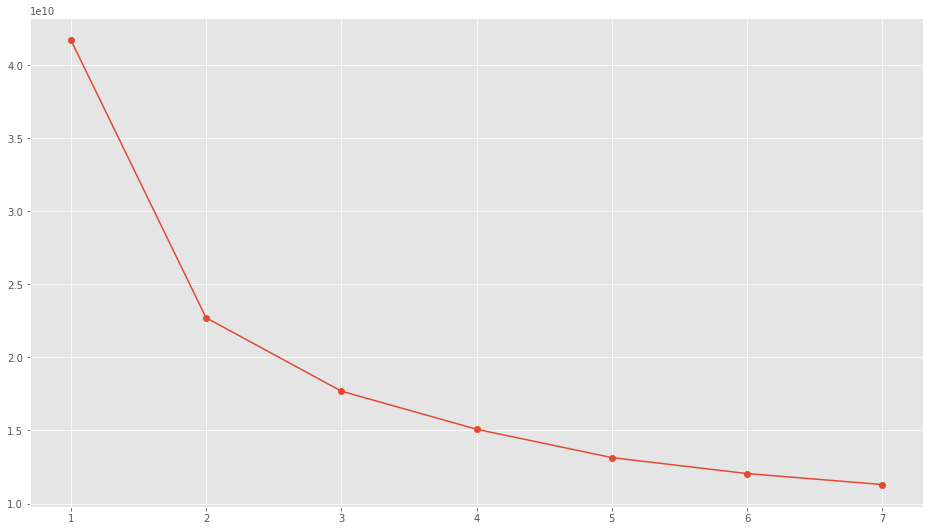

In [131]:
# Elbow Plot
k=[i for i in range(1,8)]
plt.plot(k,iner,marker='o')
plt.show()

In [132]:
# from sklearn.metrics import silhouette_score

# cluster_range = range(2,10)

# for i in cluster_range:
#     clusters = KMeans(i, n_init=100, init='k-means++')
#     clusters.fit(station_hour_cluster)
#     labels = clusters.labels_
#     sil_score = silhouette_score(station_hour_cluster, labels)
#     print('The silhouette score for', i, 'cluster is', sil_score)

In [133]:
# from sklearn.cluster import DBSCAN

# db = DBSCAN(eps=3, min_samples=2).fit(station_hour_cluster)

In [134]:
km = KMeans(n_clusters = 2)
km.fit(train_df)


KMeans(n_clusters=2)

In [135]:
lab = km.labels_

In [136]:
train_df['cluster'] = lab

In [137]:
# sns.pairplot(station_hour_cluster,hue = 'cluster')
# plt.show()

In [138]:
km.cluster_centers_

array([[ 51.24565351, 113.16163802,  13.92886811,  29.06456419,
         31.79649507,  24.6298132 ,   1.1265348 ,  11.19389351,
         37.56956832,   2.93665831,  12.48954322,   1.79039359],
       [210.74823561, 393.40466941,  70.6866756 ,  65.55360978,
         99.03132398,  46.88893755,   2.89255508,  18.30818485,
         32.36720418,   7.20798615,  39.61009159,   7.76670979]])

In [139]:
# plt.rcParams['figure.figsize']=(18,8)
# for i in station_hour_cluster.columns:
#     sns.scatterplot(station_hour[i],station_hour['AQI'],hue=station_hour['cluster'])
#     plt.show()

In [140]:
train_df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,cluster
497762,47.500000,105.500000,9.68,26.43,21.95,13.47,0.80,13.55,5.400000,0.200000,0.550000,0.000000,0
1180739,-4.699993,7.000000,1.93,9.93,6.85,12.52,0.26,1.35,14.200000,0.300000,0.500000,-0.255248,0
1769968,49.620000,88.396414,10.75,26.47,22.68,19.65,1.02,3.32,29.293715,2.740883,9.890244,1.458409,0
1778725,4.150000,18.290000,1.98,10.84,12.82,34.50,0.22,2.16,25.620000,16.060000,31.620000,0.920000,0
558959,147.500000,267.250000,0.57,19.88,10.85,17.10,1.45,32.72,4.830000,3.200000,2.580000,5.586817,0


In [141]:
train_df['cluster'].value_counts()

0    1102010
1     195969
Name: cluster, dtype: int64

In [142]:
train_df_cluster = pd.concat([train_df,station_hour_AQI['AQI']],axis=1).dropna()

train_df_cluster.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,cluster,AQI
1,53.25,100.50,0.35,16.40,9.05,16.27,0.1,12.85,79.88,0.20,2.90,0.18,0.0,117.0
2,57.50,108.00,0.20,14.78,8.00,17.07,0.1,11.93,88.67,0.25,3.43,0.10,0.0,115.0
3,61.75,109.75,0.38,13.08,7.27,18.62,0.1,12.27,81.32,0.23,2.75,0.10,0.0,114.0
5,63.25,108.25,0.50,13.70,7.67,20.82,0.1,17.45,90.62,0.20,1.80,0.00,0.0,109.0
7,66.25,117.50,0.60,19.65,10.97,22.47,0.1,13.95,46.10,0.38,4.80,0.10,0.0,104.0


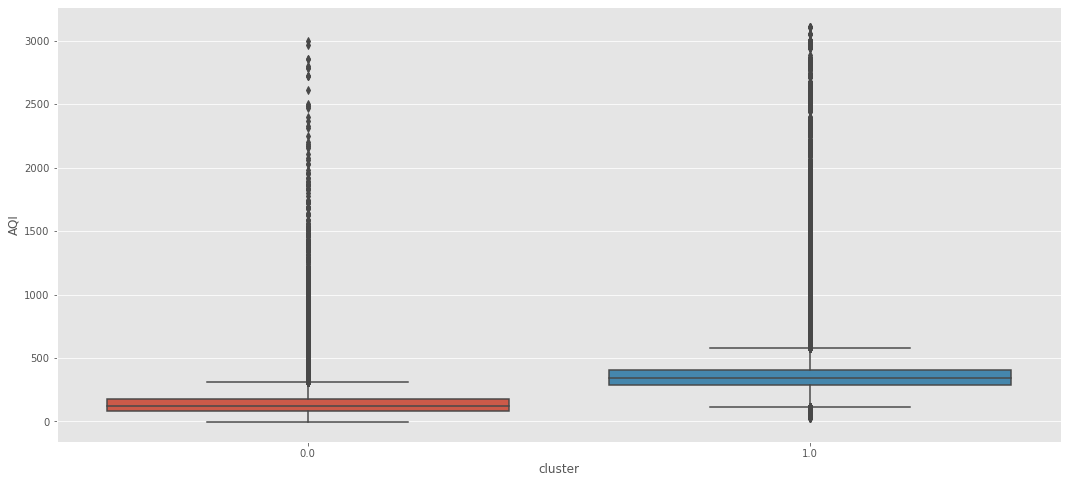

In [143]:
plt.figure(figsize=(18,8))
sns.boxplot(x = train_df_cluster['cluster'],y=train_df_cluster['AQI'])
plt.show()

In [144]:
# Clear distinction of AQI between 2 clusters

In [145]:
train_df_cluster.groupby('cluster')['AQI'].mean()

cluster
0.0    140.267244
1.0    358.475314
Name: AQI, dtype: float64

In [146]:
#splitting based on cluster to apply seperate models

gb = train_df_cluster.groupby('cluster')

In [147]:
train_df_cluster_0 = gb.get_group(0).drop('cluster',axis=1)
train_df_cluster_1 = gb.get_group(1).drop('cluster',axis=1)

In [148]:
train_df_cluster_0.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
1,53.25,100.50,0.35,16.40,9.05,16.27,0.1,12.85,79.88,0.20,2.90,0.18,117.0
2,57.50,108.00,0.20,14.78,8.00,17.07,0.1,11.93,88.67,0.25,3.43,0.10,115.0
3,61.75,109.75,0.38,13.08,7.27,18.62,0.1,12.27,81.32,0.23,2.75,0.10,114.0
5,63.25,108.25,0.50,13.70,7.67,20.82,0.1,17.45,90.62,0.20,1.80,0.00,109.0
7,66.25,117.50,0.60,19.65,10.97,22.47,0.1,13.95,46.10,0.38,4.80,0.10,104.0


<div class="h2">Taking sample from data for modeling</div> <a class="anchor" id="Taking-sample-from-data-for-modeling"></a>

### Taking Sample from train data of Cluster 0 for modelling

In [149]:
sample_0=train_df_cluster_0.sample(frac=0.4,replace=False,random_state=10)
print(sample_0.shape)
sample_0.head()

(440804, 13)


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
1467492,47.90,55.45,7.90,35.98,43.88,53.50,0.76,2.81,91.92,1.01,17.170000,-6.134485,115.0
1524547,79.50,180.50,1.90,21.45,12.95,12.40,0.56,11.33,14.65,0.00,0.500000,0.000000,153.0
1115962,8.50,43.75,1.95,15.15,9.65,9.57,0.26,3.20,47.38,0.12,1.300000,0.964897,47.0
761506,35.00,101.00,1.88,2.25,4.10,27.88,1.82,5.43,32.23,0.20,0.950000,-1.422399,199.0
54928,5.28,11.00,0.69,4.10,2.49,3.82,0.37,14.67,27.73,0.00,0.915783,2.904414,33.0


In [150]:
train_df_cluster_1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
73,99.00,298.50,1.50,48.00,26.78,19.97,0.10,11.55,46.05,0.35,8.50,0.25,146.0
215,104.75,299.25,3.58,74.20,42.35,17.62,0.10,12.55,52.40,0.00,0.00,0.00,280.0
598,114.50,276.75,8.60,71.55,45.05,38.38,0.10,11.62,18.13,0.30,8.63,0.40,154.0
599,103.50,290.50,2.47,45.20,26.08,36.58,0.00,5.93,24.50,0.30,9.10,0.15,160.0
3477,308.75,334.50,5.02,16.75,13.00,15.03,0.85,15.53,14.20,25.30,0.00,0.10,105.0


### Taking Sample from train data of Cluster 1 for modelling 

In [151]:
sample_1=train_df_cluster_1.sample(frac=0.4,replace=False,random_state=10)
print(sample_1.shape)
sample_1.head()

(78388, 13)


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
757042,337.00,437.000000,40.93,57.90,64.15,77.200000,2.68,15.28,2.85,6.600000,37.73,0.681112,611.0
1717670,455.53,616.979587,201.98,56.09,172.98,56.865428,4.62,3.95,10.83,6.750000,5.85,3.855481,413.0
188231,332.25,483.250000,40.22,45.65,57.02,56.720000,2.12,11.22,4.30,45.391916,220.72,34.433511,437.0
597632,263.50,329.000000,21.07,42.45,39.77,82.770000,2.12,11.62,14.12,9.670000,12.55,-8.687925,364.0
884922,115.00,311.000000,3.55,63.50,36.62,59.300000,1.15,13.88,173.30,3.730000,20.40,-3.143619,340.0


<div class="h2">Statistical Test to Prove that the sample is a fair representation of the Population</div> <a class="anchor" id="Statistics"></a> 

#### Null Hypothesis : Sample is a representation of the Population Data

#### Alternate Hyothesis : Sample is not a representation of the Population Data

In [152]:
from scipy.stats import ttest_ind
ttest_ind(sample_0,train_df_cluster_0)

Ttest_indResult(statistic=array([ 0.16795793,  0.37288753,  0.55751539,  0.43671777,  0.58222817,
       -0.47399696,  0.34739195, -0.01128547, -1.09319768, -0.57843224,
       -0.46751228,  0.18829414,  0.43937676]), pvalue=array([0.8666164 , 0.70923221, 0.57717543, 0.6623161 , 0.56041309,
       0.63550214, 0.72829692, 0.99099569, 0.27430719, 0.56297242,
       0.64013348, 0.8506461 , 0.66038862]))

#### Inference for sample cluster 0 :
###### Since pval > 0.05 we accept the Null Hypothesis thus inferring that the sample is a fair representation of the population data 

In [153]:
ttest_ind(sample_1,train_df_cluster_1)

Ttest_indResult(statistic=array([ 0.91114562,  1.15158817, -0.4940209 , -0.4463445 , -0.51260173,
       -0.37232398, -0.65403739,  0.69379793, -0.23673499,  0.23023911,
       -0.28406463, -0.16756136,  0.48385286]), pvalue=array([0.36221945, 0.24949135, 0.62129182, 0.65534877, 0.60823035,
       0.70965193, 0.51308827, 0.48780953, 0.81286257, 0.81790614,
       0.77636107, 0.8669285 , 0.62849069]))

#### Inference for sample cluster 1 :
###### Since pval > 0.05 we accept the Null Hypothesis thus inferring that the sample is a fair representation of the population data 

<div class="h2">Base Linear Regression Model</div> <a class="anchor" id="BaseLinRegModel"></a> 

In [154]:
# model for cluster 0

lr_0 = LinearRegression()

x_0 = train_df_cluster_0.drop('AQI',axis=1)
y_0 = train_df_cluster_0['AQI']

lr_0.fit(x_0,y_0)

LinearRegression()

In [155]:
# model for cluster 1

lr_1 = LinearRegression()

x_1 = train_df_cluster_1.drop('AQI',axis=1)
y_1 = train_df_cluster_1['AQI']

lr_1.fit(x_1,y_1)

LinearRegression()

In [156]:
# Test data

test_df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
558042,191.500000,366.0000,4.000000,30.020000,19.220000,72.450000,1.020000,61.830000,19.250000,5.950000,3.23000,-4.618917
41140,11.750000,44.2500,2.170000,17.680000,11.200000,13.300000,0.690000,9.520000,13.400000,1.250000,2.45000,0.470000
1100381,75.317211,155.4462,22.463421,34.569003,41.910544,28.001271,1.395254,12.272489,36.785764,3.584718,16.56297,2.685139
1536933,19.000000,35.0000,1.850000,10.900000,7.300000,13.530000,1.590000,23.600000,17.150000,0.030000,1.23000,0.000000
228049,75.317211,155.4462,22.463421,34.569003,41.910544,28.001271,1.395254,12.272489,36.785764,3.584718,16.56297,2.685139


In [157]:
# Cluster Prediction

label = km.predict(test_df)

test_df['cluster'] = label

In [158]:
test_df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,cluster
558042,191.500000,366.0000,4.000000,30.020000,19.220000,72.450000,1.020000,61.830000,19.250000,5.950000,3.23000,-4.618917,1
41140,11.750000,44.2500,2.170000,17.680000,11.200000,13.300000,0.690000,9.520000,13.400000,1.250000,2.45000,0.470000,0
1100381,75.317211,155.4462,22.463421,34.569003,41.910544,28.001271,1.395254,12.272489,36.785764,3.584718,16.56297,2.685139,0
1536933,19.000000,35.0000,1.850000,10.900000,7.300000,13.530000,1.590000,23.600000,17.150000,0.030000,1.23000,0.000000,0
228049,75.317211,155.4462,22.463421,34.569003,41.910544,28.001271,1.395254,12.272489,36.785764,3.584718,16.56297,2.685139,0


In [159]:
gb = test_df.groupby('cluster')

test_df_cluster_0 = gb.get_group(0).drop('cluster',axis=1)
test_df_cluster_1 = gb.get_group(1).drop('cluster',axis=1)

In [160]:
#AQI prediction for cluster 0

x_0 = test_df_cluster_0

pred_0 = lr_0.predict(x_0)

test_df_cluster_0['predicted_AQI'] = pred_0

In [161]:
#AQI prediction for cluster 1

x_1 = test_df_cluster_1

pred_1 = lr_1.predict(x_1)

test_df_cluster_1['predicted_AQI'] = pred_1

In [162]:
test_df_cluster_0.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,predicted_AQI
41140,11.750000,44.2500,2.170000,17.680000,11.200000,13.300000,0.690000,9.520000,13.400000,1.250000,2.450000,0.470000,56.250256
1100381,75.317211,155.4462,22.463421,34.569003,41.910544,28.001271,1.395254,12.272489,36.785764,3.584718,16.562970,2.685139,182.041803
1536933,19.000000,35.0000,1.850000,10.900000,7.300000,13.530000,1.590000,23.600000,17.150000,0.030000,1.230000,0.000000,67.581960
228049,75.317211,155.4462,22.463421,34.569003,41.910544,28.001271,1.395254,12.272489,36.785764,3.584718,16.562970,2.685139,182.041803
1078117,69.250000,160.5000,53.079512,110.030000,105.502061,14.280000,2.370000,12.530000,20.110000,1.400000,20.003967,9.609701,179.542280


In [163]:
test_sample_0=test_df_cluster_0.sample(frac=0.4,replace=False,random_state=10)
print(test_sample_0.shape)
test_sample_0.head()

(188816, 13)


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,predicted_AQI
1177807,40.161416,92.600492,15.918998,27.211777,33.523459,17.480125,-0.300748,9.329354,32.953966,3.013867,11.459751,1.808521,107.952949
467280,99.000000,224.000000,126.200000,87.530000,149.700000,25.830000,1.850000,19.200000,1.700000,8.470000,23.750000,8.292660,228.250840
171238,97.890000,185.560000,9.790000,29.390000,39.180000,28.570852,0.480000,12.486637,27.090000,3.505104,13.854697,1.544344,203.045119
991860,87.070000,133.011044,2.930000,11.490000,7.340000,22.979426,1.540000,5.400000,28.000000,0.030000,0.050000,-0.086116,167.086885
1001968,24.950000,58.238907,2.870000,10.640000,13.510000,16.269555,0.610000,4.610000,18.730000,1.980129,4.324004,0.391240,74.148683


In [164]:
test_df_cluster_1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,predicted_AQI
558042,191.500000,366.000000,4.000000,30.020000,19.220000,72.450000,1.020000,61.83,19.25000,5.950000,3.230000,-4.618917,408.066266
975543,165.679416,346.270000,44.021413,56.330704,68.994218,42.386675,2.944771,42.08,31.03000,5.276189,36.100439,9.354763,352.666232
504906,88.250000,350.000000,13.880000,27.880000,26.120000,40.750000,0.700000,35.80,28.98000,1.820000,35.300000,7.039038,335.168768
1640342,176.280000,244.790125,21.920000,49.220000,71.140000,101.570000,0.550000,23.33,34.88369,3.848646,28.584933,-11.123464,352.680181
861437,240.000000,374.500000,1.680000,36.400000,20.700000,37.250000,5.448760,25.52,121.15000,4.270000,18.380000,6.872969,388.647240


In [165]:
test_sample_1=test_df_cluster_1.sample(frac=0.4,replace=False,random_state=10)
print(test_sample_1.shape)
test_sample_1.head()

(33695, 13)


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,predicted_AQI
611640,193.25,268.370000,15.07,7.91,22.99,36.649799,2.43,12.779817,28.330000,0.000000,0.000000,0.000000,302.071855
758375,326.00,732.000000,469.00,178.80,477.30,60.150000,8.35,32.650000,21.230000,21.439157,115.479083,33.536098,469.872666
452132,162.64,350.600000,31.77,32.56,64.35,24.054838,2.66,16.752037,12.800000,17.700000,12.250000,6.640000,330.422911
360448,166.70,294.115347,15.32,51.00,38.95,17.600000,0.97,15.760000,43.012062,5.148898,25.763884,8.601034,289.914799
120771,147.00,274.000000,86.77,95.98,177.11,40.500000,1.20,29.260000,15.020000,7.420000,7.920000,1.822484,286.606306


In [166]:
test_df.shape

(556277, 13)

## Statistical test for sample representation of Test data 
##### Null Hypothesis : Sample is a fair representation of the population
##### Alternate Hypothesis : Sample is not a fair representation of the population 

In [167]:
ttest_ind(test_sample_0,test_df_cluster_0)

Ttest_indResult(statistic=array([-0.41321543, -0.32998313, -0.2431783 ,  0.38999681, -0.07717807,
       -0.010124  ,  0.41307809, -0.17738   ,  0.46621205, -1.33918106,
       -0.81605769, -0.31359772, -0.05342803]), pvalue=array([0.67944892, 0.74141281, 0.80786735, 0.69653903, 0.93848191,
       0.99192235, 0.67954953, 0.85920997, 0.64106388, 0.1805122 ,
       0.41446744, 0.75382669, 0.95739089]))

##### Inference for sample of Test data of Cluster 0
###### SInce pval>0.05 we accept the Null Hypothesis thus inferring that the sample of test data is a fair representation of the test population

In [168]:
ttest_ind(test_sample_1,test_df_cluster_1)

Ttest_indResult(statistic=array([-0.18894333, -0.03216791, -0.2076769 ,  0.10147686, -0.37642084,
       -1.02411562, -1.08923044,  0.20792748, -0.99500775,  0.89126543,
       -0.06537826,  0.1758067 , -0.75300589]), pvalue=array([0.85013756, 0.9743382 , 0.83548161, 0.9191721 , 0.70660473,
       0.30578277, 0.2760545 , 0.83528595, 0.31973454, 0.37278861,
       0.94787295, 0.86044611, 0.45144788]))

##### Inference for sample of Test data of Cluster 1
###### SInce pval>0.05 we accept the Null Hypothesis thus inferring that the sample of test data is a fair representation of the test population

#### Linear Regression Base Model Results

In [169]:
#LInear Regression Results

actual_aqi_0 = station_hour_AQI.loc[test_df_cluster_0.index,:]['AQI']
actual_aqi_1 = station_hour_AQI.loc[test_df_cluster_1.index,:]['AQI']

In [170]:
from sklearn.metrics import r2_score,mean_squared_error

r2_score(actual_aqi_0,test_df_cluster_0['predicted_AQI'])

0.6118400877847092

In [171]:
r2_score(actual_aqi_1,test_df_cluster_1['predicted_AQI'])

0.5074734498906696

In [172]:
rmse_0 = np.sqrt(mean_squared_error(actual_aqi_0,test_df_cluster_0['predicted_AQI']))
rmse_1 = np.sqrt(mean_squared_error(actual_aqi_1,test_df_cluster_1['predicted_AQI']))

rmse_0, rmse_1

(54.32563612032832, 120.57724947621142)

<div class="h2">Random Forest Regressor Algorithm</div> <a class="anchor" id="RFRModel"></a> 

In [173]:
#Random Forest Regressor Model for cluster 0
from sklearn.ensemble import RandomForestRegressor
rfr_0 = RandomForestRegressor()

x_0 = sample_0.drop('AQI',axis=1)
y_0 = sample_0['AQI']

rfr_0.fit(x_0,y_0)

RandomForestRegressor()

In [174]:
#  #model for cluster 1

rfr_1 = RandomForestRegressor()

x_1 = sample_1.drop('AQI',axis=1)
y_1 = sample_1['AQI']

rfr_1.fit(x_1,y_1)

RandomForestRegressor()

In [175]:
#AQI prediction for cluster 0

x_0 = test_sample_0
x_0 = x_0.drop('predicted_AQI',axis=1)

pred_0 = rfr_0.predict(x_0)

test_sample_0['predicted_AQI'] = pred_0

In [176]:
#AQI prediction for cluster 1

x_1 = test_sample_1
x_1 = x_1.drop('predicted_AQI',axis=1)

pred_1 = rfr_1.predict(x_1)

test_sample_1['predicted_AQI'] = pred_1

#### Random Forest Base Model Results

In [177]:
#RandomForest Results

actual_aqi_0 = station_hour_AQI.loc[test_sample_0.index,:]['AQI']
actual_aqi_1 = station_hour_AQI.loc[test_sample_1.index,:]['AQI']

In [178]:
r2_score(actual_aqi_0,test_sample_0['predicted_AQI']),r2_score(actual_aqi_1,test_sample_1['predicted_AQI'])

(0.7564715587988788, 0.7795471623341493)

In [179]:
rmse_0 = np.sqrt(mean_squared_error(actual_aqi_0,test_sample_0['predicted_AQI']))
rmse_1 = np.sqrt(mean_squared_error(actual_aqi_1,test_sample_1['predicted_AQI']))

rmse_0, rmse_1

(43.120671820543556, 78.57693045985485)

<div class="h2">Random Forest Regressor Tunning</div> <a class="anchor" id="RFRTunningModel"></a> 

In [180]:
# Tuning of Parameters of Random Forest Regressor 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
x_0 = sample_0.drop('AQI',axis=1)
y_0 = sample_0['AQI']

params={'n_estimators':sp_randint(50,200),
        'max_features':sp_randint(2,12),
        'max_depth':sp_randint(2,10),
       'min_samples_leaf':sp_randint(1,10),
       'min_samples_split':sp_randint(1,15)}
rsearch=RandomizedSearchCV(rfr_0,param_distributions=params,n_iter=50,n_jobs=-1,
                           cv=3,random_state=4,return_train_score=True)


rsearch.fit(x_0,y_0)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A0402ACC70>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A0402ACAF0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A0402ACF10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A0402A9070>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A0134553D0>},
                   random_state=4, return_train_score=True)

In [181]:
rsearch.best_params_

{'max_depth': 9,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 78}

In [182]:
rfr_0 = RandomForestRegressor(**rsearch.best_params_)

x_0 = sample_0.drop('AQI',axis=1)
y_0 = sample_0['AQI']

rfr_0.fit(x_0,y_0)

RandomForestRegressor(max_depth=9, max_features=5, min_samples_leaf=3,
                      min_samples_split=10, n_estimators=78)

In [183]:
# Tuning of Parameters of Random Forest Regressor 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
x_1 = sample_1.drop('AQI',axis=1)
y_1 = sample_1['AQI']

params={'n_estimators':sp_randint(50,200),
        'max_features':sp_randint(2,12),
        'max_depth':sp_randint(2,10),
       'min_samples_leaf':sp_randint(1,10),
       'min_samples_split':sp_randint(1,15)}
rsearch=RandomizedSearchCV(rfr_0,param_distributions=params,n_iter=20,n_jobs=-1,
                           cv=3,random_state=4,return_train_score=True)


rsearch.fit(x_1,y_1)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=9, max_features=5,
                                                   min_samples_leaf=3,
                                                   min_samples_split=10,
                                                   n_estimators=78),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A0402B80D0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A0D7980F70>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A0D7980B20>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A01344A4F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object

In [184]:
rsearch.best_params_

{'max_depth': 9,
 'max_features': 11,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 123}

In [185]:
rfr_1 = RandomForestRegressor(**rsearch.best_params_)

x_1 = sample_1.drop('AQI',axis=1)
y_1 = sample_1['AQI']

rfr_1.fit(x_1,y_1)

RandomForestRegressor(max_depth=9, max_features=11, min_samples_leaf=3,
                      n_estimators=123)

In [232]:
rfr_1.feature_importances_

array([0.16579974, 0.25869321, 0.02721828, 0.00465125, 0.00811952,
       0.11767367, 0.37049861, 0.0253141 , 0.00883519, 0.00393079,
       0.0047324 , 0.00453326])

In [186]:
#AQI prediction for cluster 0

x_0 = test_sample_0
x_0 = x_0.drop('predicted_AQI',axis=1)

pred_0 = rfr_0.predict(x_0)

test_sample_0['predicted_AQI'] = pred_0

In [233]:
rfr_0.feature_importances_

array([0.224813  , 0.3982294 , 0.00732904, 0.00432801, 0.00510234,
       0.11584368, 0.1154384 , 0.02424895, 0.06627175, 0.00337039,
       0.02356198, 0.01146306])

In [187]:
#AQI prediction for cluster 1

x_1 = test_sample_1
x_1 = x_1.drop('predicted_AQI',axis=1)

pred_1 = rfr_1.predict(x_1)

test_sample_1['predicted_AQI'] = pred_1

#### Random Forest Final Model Results

In [188]:
#RandomForest Results

actual_aqi_0 = station_hour_AQI.loc[test_sample_0.index,:]['AQI']
actual_aqi_1 = station_hour_AQI.loc[test_sample_1.index,:]['AQI']

In [189]:
r2_score(actual_aqi_0,test_sample_0['predicted_AQI']),r2_score(actual_aqi_1,test_sample_1['predicted_AQI'])

(0.6812509321322748, 0.7218297716333228)

In [190]:
rmse_0 = np.sqrt(mean_squared_error(actual_aqi_0,test_sample_0['predicted_AQI']))
rmse_1 = np.sqrt(mean_squared_error(actual_aqi_1,test_sample_1['predicted_AQI']))

rmse_0, rmse_1

(49.33272846244628, 88.26581513540552)

<div class="h2">LightGBM Regressor Model</div> <a class="anchor" id="LGBMRModel"></a> 

In [ ]:
!pip install lightgbm

In [191]:
import lightgbm as lgb

In [192]:
lg_0=lgb.LGBMRegressor()


x_0 = sample_0.drop('AQI',axis=1)
y_0 = sample_0['AQI']

lg_0.fit(x_0,y_0)


LGBMRegressor()

In [193]:
#  #model for cluster 1
lg_1 = lgb.LGBMRegressor()

x_1 = sample_1.drop('AQI',axis=1)
y_1 = sample_1['AQI']

lg_1.fit(x_1,y_1)

LGBMRegressor()

In [194]:
#AQI prediction for cluster 0



x_0 = test_sample_0
x_0 = x_0.drop('predicted_AQI',axis=1)

pred_0 = lg_0.predict(x_0)

test_sample_0['predicted_AQI'] = pred_0

In [195]:
#AQI prediction for cluster 1

x_1 = test_sample_1
x_1 = x_1.drop('predicted_AQI',axis=1)

pred_1 = lg_1.predict(x_1)

test_sample_1['predicted_AQI'] = pred_1

#### Base LGBM Results 

In [196]:
#LGBMRegressor Results

actual_aqi_0 = station_hour_AQI.loc[test_sample_0.index,:]['AQI']
actual_aqi_1 = station_hour_AQI.loc[test_sample_1.index,:]['AQI']

In [197]:
r2_score(actual_aqi_0,test_sample_0['predicted_AQI']),r2_score(actual_aqi_1,test_sample_1['predicted_AQI'])

(0.7043783602111822, 0.7484942753305183)

In [198]:
rmse_0 = np.sqrt(mean_squared_error(actual_aqi_0,test_sample_0['predicted_AQI']))
rmse_1 = np.sqrt(mean_squared_error(actual_aqi_1,test_sample_1['predicted_AQI']))

rmse_0, rmse_1

(47.50931677396465, 83.92882636600184)

<div class="h2">LightGBM Regressor Tunning Model</div> <a class="anchor" id="LGBMRTunningModel"></a> 

In [199]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform as sp_uniform
ss=StandardScaler()
lg_0=lgb.LGBMRegressor()


x_0 = sample_0.drop('AQI',axis=1)
y_0 = sample_0['AQI']


Xs_0=ss.fit_transform(x_0)


params={'n_estimators':sp_randint(20,250),
       'max_depth':sp_randint(2,10),
       'learning_rate':sp_uniform(0,0.5),
       'num_leaves':sp_randint(10,100)}
rsearch=RandomizedSearchCV(lg_0,param_distributions=params,n_iter=30,cv=3,n_jobs=-1,random_state=4,
                           return_train_score=True)

rsearch.fit(Xs_0,y_0)


RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A0EE3E8850>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A0EBA8BE20>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A0EBA8B550>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A0EE3E8BE0>},
                   random_state=4, return_train_score=True)

In [200]:
lg_0=lgb.LGBMRegressor(**rsearch.best_params_)


x_0 = sample_0.drop('AQI',axis=1)
y_0 = sample_0['AQI']

lg_0.fit(x_0,y_0)


LGBMRegressor(learning_rate=0.3163319886621688, max_depth=8, n_estimators=219,
              num_leaves=83)

In [201]:
#AQI prediction for cluster 0



x_0 = test_sample_0
x_0 = x_0.drop('predicted_AQI',axis=1)

pred_0 = lg_0.predict(x_0)

test_sample_0['predicted_AQI'] = pred_0

In [202]:
ss=StandardScaler()
lg_1=lgb.LGBMRegressor()


x_1 = sample_1.drop('AQI',axis=1)
y_1 = sample_1['AQI']


Xs_1=ss.fit_transform(x_1)


params={'n_estimators':sp_randint(20,250),
       'max_depth':sp_randint(2,10),
       'learning_rate':sp_uniform(0,0.5),
       'num_leaves':sp_randint(10,100)}
rsearch=RandomizedSearchCV(lg_1,param_distributions=params,n_iter=30,cv=3,n_jobs=-1,random_state=4,
                           return_train_score=True)

rsearch.fit(Xs_1,y_1)


RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A0EBA8B7F0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A0EE42AEE0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A0EE3E5CD0>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A0EE41CE80>},
                   random_state=4, return_train_score=True)

In [203]:
lg_1=lgb.LGBMRegressor(**rsearch.best_params_)


x_1 = sample_1.drop('AQI',axis=1)
y_1 = sample_1['AQI']

lg_1.fit(x_1,y_1)


LGBMRegressor(learning_rate=0.2231745987130903, max_depth=7, n_estimators=181,
              num_leaves=42)

In [204]:
#AQI prediction for cluster 1

x_1 = test_sample_1
x_1 = x_1.drop('predicted_AQI',axis=1)

pred_1 = lg_1.predict(x_1)

test_sample_1['predicted_AQI'] = pred_1

#### Tuned LGBM Results

In [205]:
#LGBMRegressor Results

actual_aqi_0 = station_hour_AQI.loc[test_sample_0.index,:]['AQI']
actual_aqi_1 = station_hour_AQI.loc[test_sample_1.index,:]['AQI']

In [206]:
r2_score(actual_aqi_0,test_sample_0['predicted_AQI']),r2_score(actual_aqi_1,test_sample_1['predicted_AQI'])

(0.7534361867992246, 0.7727117537298787)

In [207]:
rmse_0 = np.sqrt(mean_squared_error(actual_aqi_0,test_sample_0['predicted_AQI']))
rmse_1 = np.sqrt(mean_squared_error(actual_aqi_1,test_sample_1['predicted_AQI']))

rmse_0, rmse_1

(43.38857061720121, 79.78581792913252)

<div class="h2">XGBoost Algorithm</div> <a class="anchor" id="XBGModel"></a>

In [ ]:
!pip install xgboost

In [208]:
#XGB Regressor

from xgboost import XGBRegressor



In [209]:
# model for cluster 0

xgb_0 = XGBRegressor()

x_0 = sample_0.drop('AQI',axis=1)
y_0 = sample_0['AQI']

xgb_0.fit(x_0,y_0)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [210]:
# model for cluster 1

xgb_1 = XGBRegressor()

x_1 = sample_1.drop('AQI',axis=1)
y_1 = sample_1['AQI']

xgb_1.fit(x_1,y_1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [211]:
#AQI prediction for cluster 0



x_0 = test_df_cluster_0
x_0 = x_0.drop('predicted_AQI',axis=1)

pred_0 = xgb_0.predict(x_0)

test_df_cluster_0['predicted_AQI'] = pred_0

In [212]:
#AQI prediction for cluster 1

x_1 = test_df_cluster_1
x_1 = x_1.drop('predicted_AQI',axis=1)

pred_1 = xgb_1.predict(x_1)

test_df_cluster_1['predicted_AQI'] = pred_1

In [213]:
#XGBoost Results

actual_aqi_0 = station_hour_AQI.loc[test_df_cluster_0.index,:]['AQI']
actual_aqi_1 = station_hour_AQI.loc[test_df_cluster_1.index,:]['AQI']

In [214]:
r2_score(actual_aqi_0,test_df_cluster_0['predicted_AQI'])

0.7250998300787528

In [215]:
r2_score(actual_aqi_1,test_df_cluster_1['predicted_AQI'])

0.775791590944721

In [216]:
rmse_0 = np.sqrt(mean_squared_error(actual_aqi_0,test_df_cluster_0['predicted_AQI']))
rmse_1 = np.sqrt(mean_squared_error(actual_aqi_1,test_df_cluster_1['predicted_AQI']))

rmse_0, rmse_1

(45.71797481002455, 81.35354797760294)

<div class="h2">XGBoost Tunning and Final Model</div> <a class="anchor" id="XBGTunnModel"></a>

In [217]:

xgb_0=XGBRegressor()


x_0 = sample_0.drop('AQI',axis=1)
y_0 = sample_0['AQI']


params={'n_estimators':sp_randint(20,250),
       'max_depth':sp_randint(2,10),
       'learning_rate':sp_uniform(0,0.5),
       'booster':['gbtree','ghlinear','dart']}
rsearch=RandomizedSearchCV(xgb_0,param_distributions=params,n_iter=30,cv=3,n_jobs=-1,random_state=4,
                           return_train_score=True)

rsearch.fit(x_0,y_0)


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                   param_distributions={'booster': ['gbtree', 'ghlinear',
                                                    'dart'],
                                        'learning_rate'

In [218]:
rsearch.best_params_

{'booster': 'dart',
 'learning_rate': 0.24889705730865286,
 'max_depth': 9,
 'n_estimators': 116}

In [219]:
# model for cluster 0

xgb_0 = XGBRegressor(**rsearch.best_params_)

x_0 = sample_0.drop('AQI',axis=1)
y_0 = sample_0['AQI']

xgb_0.fit(x_0,y_0)

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.24889705730865286, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=116, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [220]:
#AQI prediction for cluster 0



x_0 = test_df_cluster_0
x_0 = x_0.drop('predicted_AQI',axis=1)

pred_0 = xgb_0.predict(x_0)

test_df_cluster_0['predicted_AQI'] = pred_0

In [221]:
xgb_1=XGBRegressor()


x_1 = sample_1.drop('AQI',axis=1)
y_1 = sample_1['AQI']


params={'n_estimators':sp_randint(20,250),
       'max_depth':sp_randint(2,10),
       'learning_rate':sp_uniform(0,0.5),
       'booster':['gbtree','ghlinear','dart']}
rsearch=RandomizedSearchCV(xgb_1,param_distributions=params,n_iter=30,cv=3,n_jobs=-1,random_state=4,
                           return_train_score=True)

rsearch.fit(x_1,y_1)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                   param_distributions={'booster': ['gbtree', 'ghlinear',
                                                    'dart'],
                                        'learning_rate'

In [222]:
# model for cluster 1

xgb_1 = XGBRegressor(**rsearch.best_params_)

x_1 = sample_1.drop('AQI',axis=1)
y_1 = sample_1['AQI']

xgb_1.fit(x_1,y_1)

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.24889705730865286, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=116, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [223]:
#AQI prediction for cluster 1

x_1 = test_df_cluster_1
x_1 = x_1.drop('predicted_AQI',axis=1)

pred_1 = xgb_1.predict(x_1)

test_df_cluster_1['predicted_AQI'] = pred_1

In [224]:
#Tuned XGBoost Results

actual_aqi_0 = station_hour_AQI.loc[test_df_cluster_0.index,:]['AQI']
actual_aqi_1 = station_hour_AQI.loc[test_df_cluster_1.index,:]['AQI']

In [225]:
r2_score(actual_aqi_0,test_df_cluster_0['predicted_AQI']),r2_score(actual_aqi_1,test_df_cluster_1['predicted_AQI'])

(0.7541097551461398, 0.7906410327011495)

In [226]:
rmse_0 = np.sqrt(mean_squared_error(actual_aqi_0,test_df_cluster_0['predicted_AQI']))
rmse_1 = np.sqrt(mean_squared_error(actual_aqi_1,test_df_cluster_1['predicted_AQI']))

rmse_0, rmse_1

(43.2384512425727, 78.6133553812048)

<center><h1>Making every bit count - Where to invest to combat air pollution in India?</h1></center><a class="anchor" id="Wheretoinvest"></a>
<center><i>Identifying the cities that require immediate attention to their increasing air pollution</i></center>
<br>
<strong>NOTE:</strong>
The work here is my interpretation of the data at hand. The recommendations I will suggest are based on what I find is true through my analysis. They need not necessarily resonate in the same tone with every reader.

In [227]:
!pip install pywaffle
!pip install bubbly

  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5432 sha256=ee0fbc3606e208bc7ce5f9fb4529b2908e5877e673a528d52b8fcbf478887c36
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\b5\4a\53\7234ca75eea014cea6a7093adc822c77b40ba13de20c6f5d0a
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=fbd74a3bbdba06c0c705f1ac2729fef36d04aa75bdd6c1a59db23f0bf59bc3e4
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built bubbly retrying


In [228]:
city = pd.read_csv("cities_r2.csv")
city.head(3)

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768


### Global Functions and Utility functions
****

In [235]:
# Global Functions and Utility functions


COLOR_PALLETTE = {'#00b050': 'Good','#91cf4f': 'Satisfactory','#fefe00': 'Moderate','#ffbf00': 'Poor',
    '#fe0000': 'Very Poor','#bf0000': 'Severe','#737373': 'Not Available'}

def trim(x):
    """Strip of trailing spaces"""
    
    return x.strip()

def order_bucket(old, order=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe', 'Not Available']):
    """
    Order by bucket
    `old` => Old dictionary and `order` => Order of AQI buckets
    """
    
    new = {}
    for cat in order:
        try:
            new[cat] = old[cat]
        except:
            continue
    return new

In [234]:
# prepare data on cities

city['name_of_city'] = city['name_of_city'].apply(trim)

new_names = {'Ahmadabad': 'Ahmedabad','Amravati': 'Amaravati','Gurgaon': 'Gurugram',
             'Greater Mumbai': 'Mumbai','Greater Hyderabad': 'Hyderabad'}

city['name_of_city'] = city['name_of_city'].replace(new_names)

rel_cols = ['name_of_city','state_name','population_total','population_male','population_female','0-6_population_total',
            'literates_total','literates_male','literates_female','sex_ratio','effective_literacy_rate_total','total_graduates']

city = city[rel_cols]

cities = ['Ahmedabad','Aizawl','Amaravati','Amritsar','Bengaluru','Bhopal','Brajrajnagar','Chandigarh','Chennai',
 'Coimbatore','Delhi','Ernakulam','Gurugram','Guwahati','Hyderabad','Jaipur','Jorapokhar','Kochi','Kolkata','Lucknow',
 'Mumbai','Patna','Shillong','Talcher','Thiruvananthapuram','Visakhapatnam']

city_t = city[city['name_of_city'].isin(cities)]

# combine data into `df`
df = pd.merge(left=city_day,right=city_t,left_on='City',right_on='name_of_city',how='outer')

<div class="h2">India's National Air Quality Index</div>

India's National Air Quality Index programme was put into effect in the year 2015 as a step to monitor the air quality in the country. It was initially started in 14 cities and later extended to 34 ([Source](http://moef.gov.in/environment/pollution/)).  

As per the AQI classification, any AQI measure can fall into a particular bucket. This bucket is represented by 

![](https://i.imgur.com/XmnE0rT.png)

<div class="h2">Methodology</div><a class="anchor" id="Methodology"></a>

The following methodology was used in order to tackle the problem at hand. Across these 7 steps, the pool of prospective cities that could be provided the funding was continuously shortened in order to narrow down to the 3 main cities of the 25+ ones at the start.


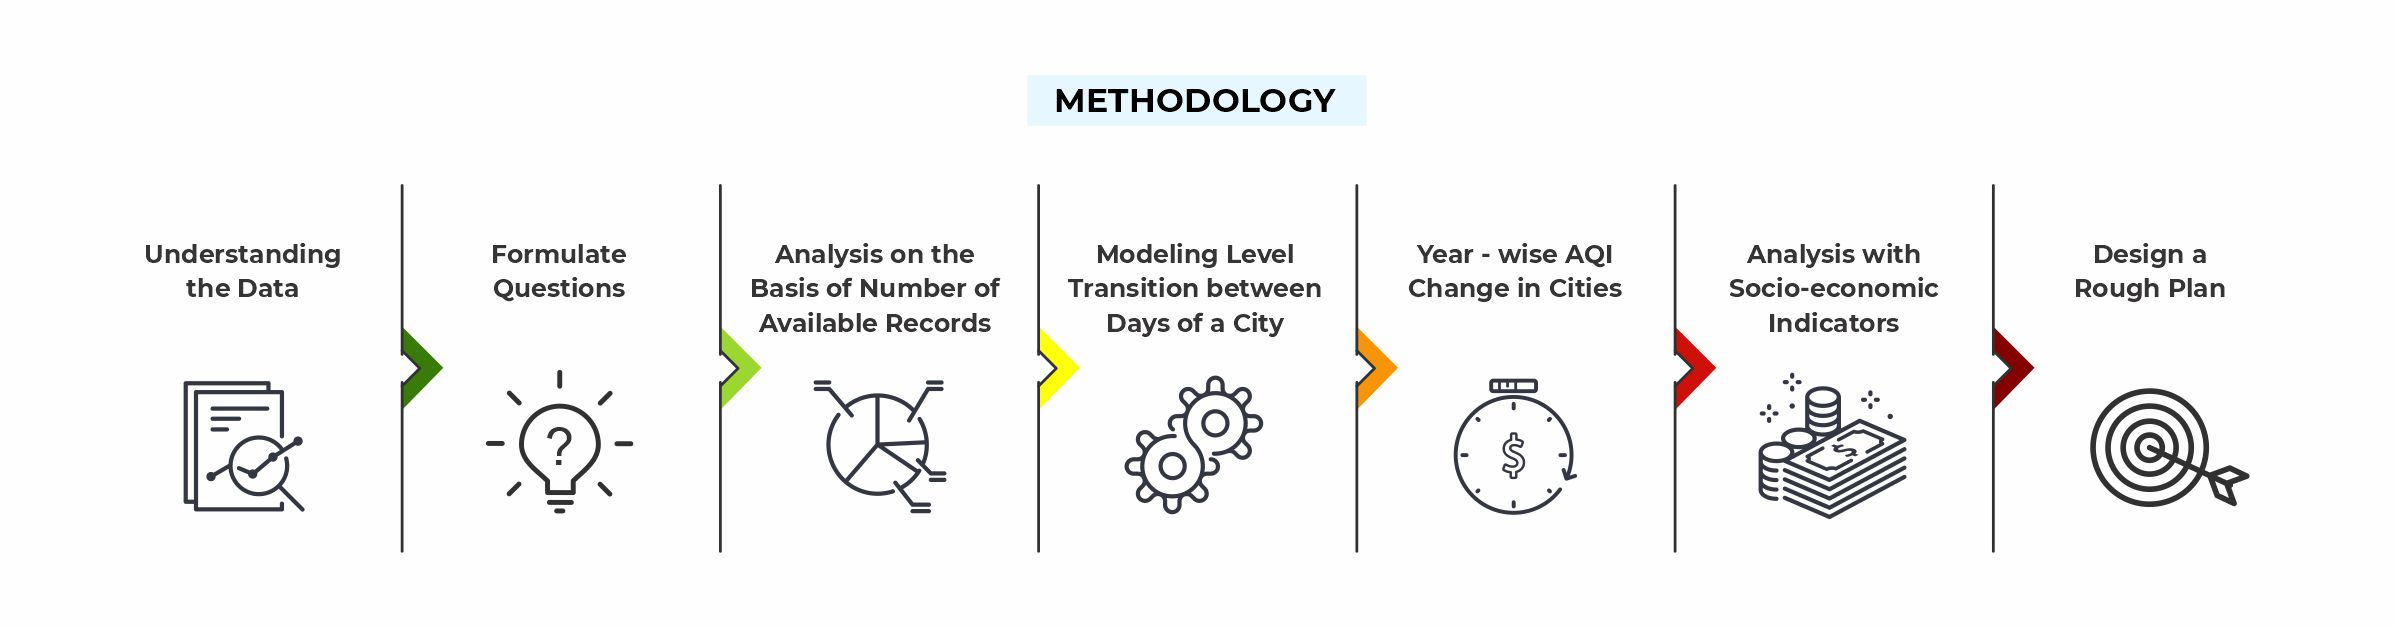

In [238]:
from IPython.display import Image, display
display(Image(filename='methodology sarthak.jpg'))

<div class="h2">Preliminary Analysis</div><a class="anchor" id="PA"></a>

In this section, some preliminary groundwork is performed which will become more relevant as the analysis progresses.

<div class="h3">How do AQI levels distribute for all cities over the last 5 years?</div><a class="anchor" id="AQIlevels"></a>

In [240]:
city_day.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

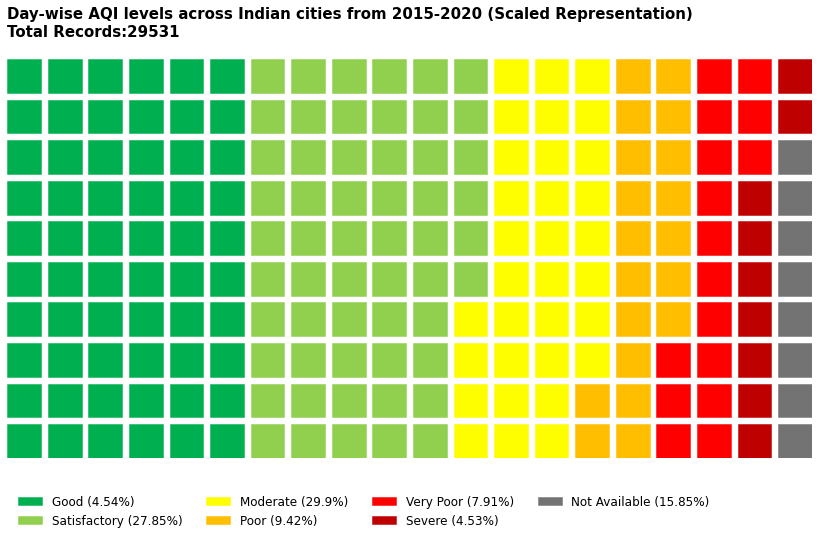

In [257]:
# Day-wise AQI levels across Indian cities from 2015-2020 (Scaled Representation) 

# prepare data
buckets = city_day['AQI_Bucket'].fillna('Not Available')
bucks = pd.DataFrame(buckets.value_counts()).to_dict()['AQI_Bucket']
bucket_dict = order_bucket(bucks) # order the dict based on AQI buckets

fig = plt.figure(title={
        'label': 'Day-wise AQI levels across Indian cities from 2015-2020 (Scaled Representation)\nTotal Records:29531\n',
        'loc': 'left',
        'fontdict': {'fontsize': 15,}},
    FigureClass=Waffle, rows=10, columns=20,values=bucks, 
    colors=['#00b050', '#91cf4f', "#fefe00", "#ffbf00", "#fe0000", "#bf0000", "#737373"],
    labels=[f"{k} ({round((v/city_day.shape[0]*100),2)}%)" for k, v in bucket_dict.items()],
    legend={'loc': 'lower left','bbox_to_anchor': (0, -0.2),'ncol': 4,'framealpha': 0,'fontsize': 12},
    block_arranging_style='style',
    figsize=(12, 15),
    starting_location='NW',
    vertical=False)

plt.show()

**Observations:**
- Only 5% of all entries recorded have an AQI that would inflict no harm on any section of the demography
- Categories Poor, Very Poor and Severe (i.e the ones that are capable of harming healthy people) contribute to around 1/5th of all entries
- 16% of all entries have missing AQI levels!

<div class="h3">Records Available as per city and their categorization</div><a class="anchor" id="categorization"></a>

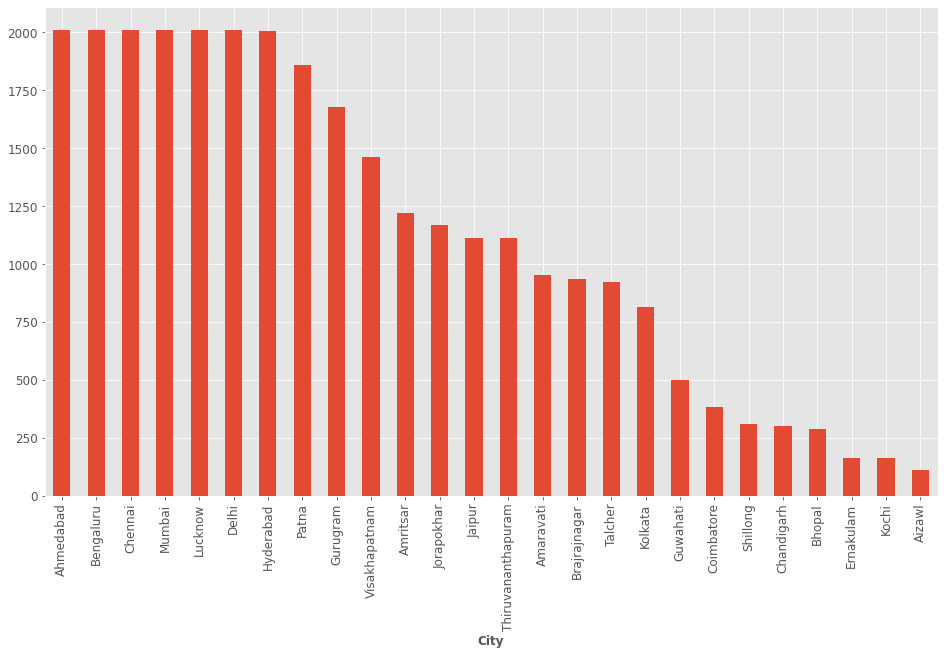

In [276]:
city_day.groupby('City').count()['Date'].sort_values(ascending=False).plot(kind='bar')
plt.show()

**Observations and Points to note**
- The most records a city in the given dataset has is 2009
- 12 out of the 26 cities have total day-wise records for 2015-2020 which is lesser than the maximum number of records available for a city i.e 2009 for Mumbai, Delhi, Lucknow, Chennai, Bengaluru, Ahmedabad, Hyderabad\
**Note: We are setting a threshold of 1500 (which is 50%) to divide the cities in two groups respectively WMR and WLR**
    - WMR: With More Records
    - WLR: With Less Records
- Why do the WLR states have low records?
    - **Hypothesis 1: Maybe they don't have the resources**
    - **Hypothesis 2: Maybe they are not prioritized by AQI**
- Cities with low records may or may not be crossed out for investment on the basis of whether
    - They have low records because they are clean and safe
    - They have low records because they are not efficiently monitored

### Cities with more than 1005 records

In [278]:
Cities_WMR = ['Thiruvananthapuram','Jaipur','Jorapokhar','Amritsar','Visakhapatnam','Gurugram','Patna','Hyderabad','Lucknow',
 'Bengaluru','Mumbai','Chennai','Delhi','Ahmedabad'] 

### Cities with less than 1005 records

In [279]:
Cities_WLR = ['Aizawl','Ernakulam','Kochi','Bhopal','Chandigarh','Shillong','Coimbatore','Guwahati','Kolkata','Talcher',
 'Brajrajnagar','Amaravati']

In [280]:
# number of stations per city(daywise measures)
station_data = pd.merge(station_day, stations)

city_station_cnt = pd.DataFrame(station_data.groupby(['City']).nunique()['StationId'].sort_values(ascending=False))

# wmr and wlr
city_station_cnt_wmr = city_station_cnt[city_station_cnt.index.isin(Cities_WMR)]
city_station_cnt_wlr = city_station_cnt[city_station_cnt.index.isin(Cities_WLR)]

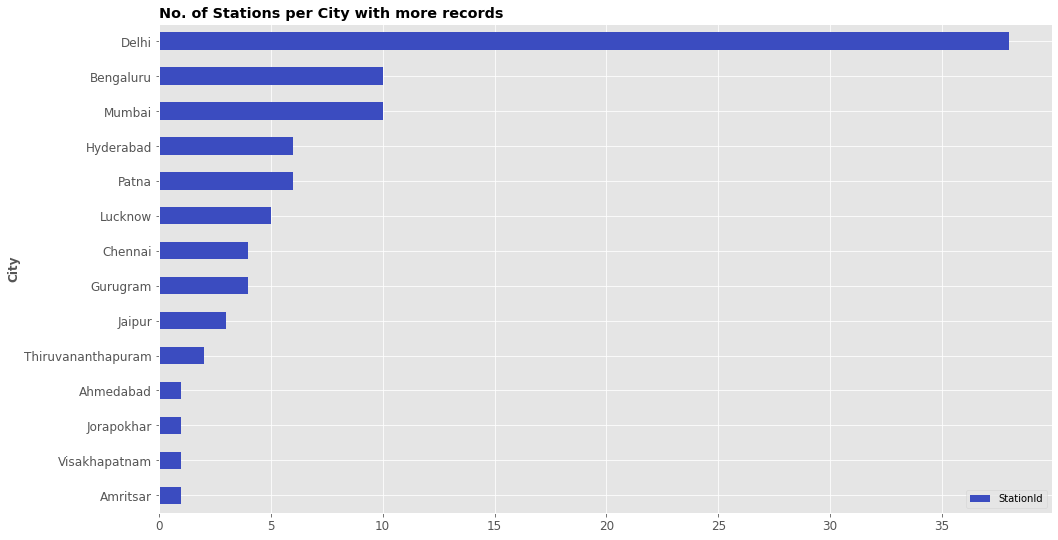

In [349]:
city_station_cnt_wmr.sort_values(by='StationId',ascending=True).plot(kind='barh',colormap='coolwarm')
plt.title("No. of Stations per City with more records")
plt.show()

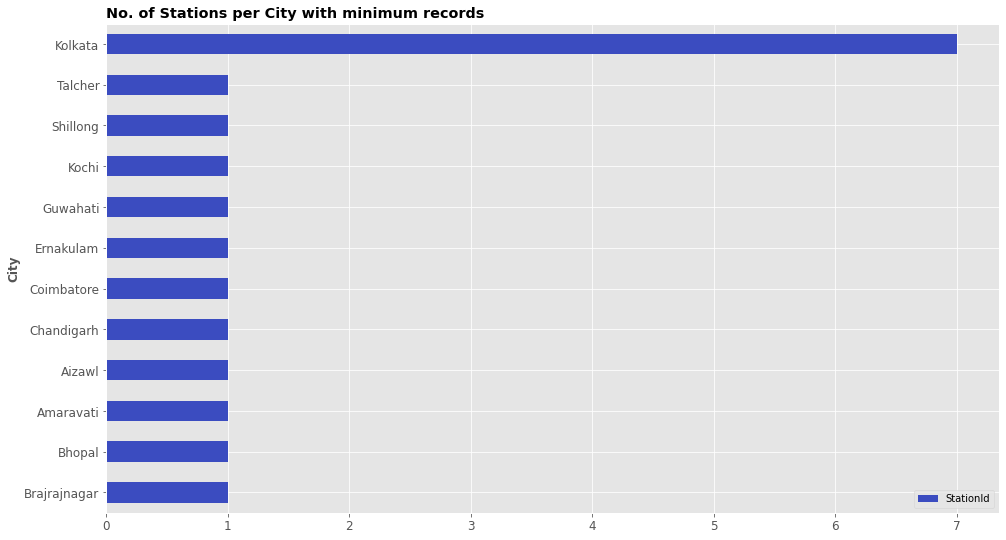

In [350]:
city_station_cnt_wlr.sort_values(by='StationId',ascending=True).plot(kind='barh',colormap='coolwarm')
plt.title("No. of Stations per City with minimum records")
plt.show()

**Observations:**

- Naturally, cities with more records in the data have more stations
    - Delhi has over 35 stations
    - Mumbai and Bengaluru rank second with 10 stations
    - Ahmedabad, Jorapokhar, Visakhapatnam and Amritsar have only 1 station each
- Amongst the cities in WLR, Kolkata is an outlier. It has 7 stations, while all others in this group only have 1 station
    - Does this mean Kolkata is not registering enough entries into the database? Is this a possible problem with administration?

In [352]:
# replace missing AQI_Bucket values with 'Not Available'
station_data['AQI_Bucket'].fillna('Not Available', inplace=True)
station_data.head(3)

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,Not Available,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


<div class="h3">Overall AQI Classifications per City (2015-2020)</div><a class="anchor" id="Classification"></a>

In [369]:
city_buckets_wmr = station_data[station_data['City'].isin(Cities_WMR)].groupby(['City', 'AQI_Bucket']).agg({'Date':'count'})
wmr_aqi = city_buckets_wmr.unstack(level='AQI_Bucket', fill_value=0)  
# Returns a DataFrame having a new level of column labels whose 
# inner-most level consists of the pivoted index labels.
wmr_aqi = wmr_aqi['Date'][['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe', 'Not Available']]
wmr_aqi

AQI_Bucket,Good,Satisfactory,Moderate,Poor,Very Poor,Severe,Not Available
City,,,,,,,
Ahmedabad,1,43,198,238,216,638,675
Amritsar,84,473,448,67,47,7,95
Bengaluru,1481,4908,2960,206,56,28,2357
Chennai,333,2451,1494,386,126,20,1596
Delhi,301,4713,11690,7344,8298,3761,9253
Gurugram,43,383,855,422,508,121,499
Hyderabad,861,2828,3179,112,34,11,1727
Jaipur,38,881,1721,277,84,10,78
Jorapokhar,10,137,451,121,34,18,398


In [371]:
city_buckets_wlr = station_data[station_data['City'].isin(Cities_WLR)].groupby(['City', 'AQI_Bucket']).agg({'Date':'count'})
wlr_aqi = city_buckets_wlr.unstack(level='AQI_Bucket', fill_value=0)
# Returns a DataFrame having a new level of column labels whose 
# inner-most level consists of the pivoted index labels.
wlr_aqi = wlr_aqi['Date'][['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe', 'Not Available']]
wlr_aqi

AQI_Bucket,Good,Satisfactory,Moderate,Poor,Very Poor,Severe,Not Available
City,,,,,,,
Aizawl,83,28,0,0,0,0,2
Amaravati,158,409,219,47,8,0,110
Bhopal,2,76,165,31,4,0,11
Brajrajnagar,14,122,421,120,36,0,225
Chandigarh,48,154,74,20,3,0,5
Coimbatore,43,288,13,0,0,0,42
Ernakulam,0,104,49,0,0,0,9
Guwahati,116,135,111,69,59,5,7
Kochi,0,82,74,2,0,0,4


In [372]:
# making into percentages
wmr_aqi['Total'] = wmr_aqi.apply('sum', axis=1)
wmr_aqi['Good'] = round(wmr_aqi['Good'] / wmr_aqi['Total'], 2) * 100
wmr_aqi['Satisfactory'] = round(wmr_aqi['Satisfactory'] / wmr_aqi['Total'], 2) * 100
wmr_aqi['Moderate'] = round(wmr_aqi['Moderate'] / wmr_aqi['Total'], 2) * 100
wmr_aqi['Poor'] = round(wmr_aqi['Poor'] / wmr_aqi['Total'], 2) * 100
wmr_aqi['Very Poor'] = round(wmr_aqi['Very Poor'] / wmr_aqi['Total'], 2) * 100
wmr_aqi['Severe'] = round(wmr_aqi['Severe'] / wmr_aqi['Total'], 2) * 100
wmr_aqi['Not Available'] = round(wmr_aqi['Not Available'] / wmr_aqi['Total'], 2) * 100
wmr_aqi = wmr_aqi.drop(['Total'], axis=1)

wlr_aqi['Total'] = wlr_aqi.apply('sum', axis=1)
wlr_aqi['Good'] = round(wlr_aqi['Good'] / wlr_aqi['Total'], 2) * 100
wlr_aqi['Satisfactory'] = round(wlr_aqi['Satisfactory'] / wlr_aqi['Total'], 2) * 100
wlr_aqi['Moderate'] = round(wlr_aqi['Moderate'] / wlr_aqi['Total'], 2) * 100
wlr_aqi['Poor'] = round(wlr_aqi['Poor'] / wlr_aqi['Total'], 2) * 100
wlr_aqi['Very Poor'] = round(wlr_aqi['Very Poor'] / wlr_aqi['Total'], 2) * 100
wlr_aqi['Severe'] = round(wlr_aqi['Severe'] / wlr_aqi['Total'], 2) * 100
wlr_aqi['Not Available'] = round(wlr_aqi['Not Available'] / wlr_aqi['Total'], 2) * 100
wlr_aqi = wlr_aqi.drop(['Total'], axis=1)

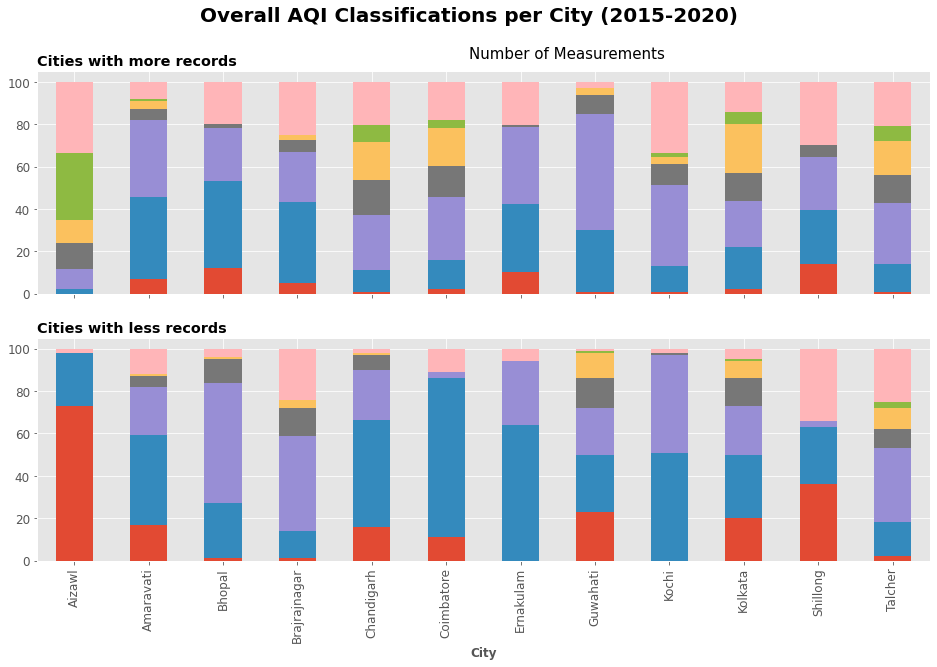

In [382]:
fig, axs = plt.subplots(2,1, sharex=True)
wmr_aqi.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,legend=False,ax=axs[0])
wlr_aqi.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,legend=False,ax=axs[1])
axs[0].set_title("Cities with more records")
axs[1].set_title("Cities with less records")
fig.text(0.5, 0.9, 'Number of Measurements', fontsize=15)
fig.suptitle("Overall AQI Classifications per City (2015-2020)")
plt.show()


**Observations:**

- In a general look, it is evident that 'Cities with less records' have measured more Good or Satisfactory classifications than the 'Cities with more records'.
- In the first set, Thiruvananthapuram registered the highest percentage of it's daily measurements as of 2015-2020 as "Good" or "Satisfactory". Ahmedabad on the other hand has less than 5% of it's entries from 2015-2020 under the positive category(Good or Satisfactory).
- Ahmedabad also has close to 35% of it's entries under the 'Not Available' status.

<div class="h3">3-Class Categorization of Cities</div><a class="anchor" id="3classcateg"></a>

In [384]:
# prep data for 3-class categorization

wmr_aqi = wmr_aqi.reset_index()
wmr_aqi['Acceptable'] = wmr_aqi['Good'] + wmr_aqi['Satisfactory']
wmr_aqi['Unacceptable'] = wmr_aqi['Moderate'] + wmr_aqi['Poor'] + wmr_aqi['Very Poor'] + wmr_aqi['Severe']
wmr_aqi.sort_values(by='Unacceptable', ascending=False)

AQI_Bucket,index,City,Good,Satisfactory,Moderate,Poor,Very Poor,Severe,Not Available,Acceptable,Unacceptable
4,4,Delhi,1.0,10.0,26.0,16.0,18.0,8.0,20.0,11.0,68.0
5,5,Gurugram,2.0,14.0,30.0,15.0,18.0,4.0,18.0,16.0,67.0
7,7,Jaipur,1.0,29.0,55.0,9.0,3.0,0.0,3.0,30.0,67.0
0,0,Ahmedabad,0.0,2.0,10.0,12.0,11.0,32.0,34.0,2.0,65.0
11,11,Patna,1.0,13.0,29.0,13.0,16.0,7.0,21.0,14.0,65.0
9,9,Lucknow,2.0,20.0,22.0,13.0,23.0,6.0,14.0,22.0,64.0
8,8,Jorapokhar,1.0,12.0,39.0,10.0,3.0,2.0,34.0,13.0,54.0
1,1,Amritsar,7.0,39.0,37.0,5.0,4.0,1.0,8.0,46.0,47.0
13,13,Visakhapatnam,4.0,31.0,40.0,5.0,1.0,0.0,20.0,35.0,46.0
6,6,Hyderabad,10.0,32.0,36.0,1.0,0.0,0.0,20.0,42.0,37.0


In [385]:
wlr_aqi = wlr_aqi.reset_index()
wlr_aqi['Acceptable'] = wlr_aqi['Good'] + wlr_aqi['Satisfactory']
wlr_aqi['Unacceptable'] = wlr_aqi['Moderate'] + wlr_aqi['Poor'] + wlr_aqi['Very Poor'] + wlr_aqi['Severe']
wlr_aqi.sort_values(by='Unacceptable', ascending=False)

AQI_Bucket,index,City,Good,Satisfactory,Moderate,Poor,Very Poor,Severe,Not Available,Acceptable,Unacceptable
2,2,Bhopal,1.0,26.0,57.0,11.0,1.0,0.0,4.0,27.0,69.0
3,3,Brajrajnagar,1.0,13.0,45.0,13.0,4.0,0.0,24.0,14.0,62.0
11,11,Talcher,2.0,16.0,35.0,9.0,10.0,3.0,25.0,18.0,57.0
7,7,Guwahati,23.0,27.0,22.0,14.0,12.0,1.0,1.0,50.0,49.0
8,8,Kochi,0.0,51.0,46.0,1.0,0.0,0.0,2.0,51.0,47.0
9,9,Kolkata,20.0,30.0,23.0,13.0,8.0,1.0,5.0,50.0,45.0
4,4,Chandigarh,16.0,51.0,24.0,7.0,1.0,0.0,2.0,67.0,32.0
6,6,Ernakulam,0.0,64.0,30.0,0.0,0.0,0.0,6.0,64.0,30.0
1,1,Amaravati,17.0,43.0,23.0,5.0,1.0,0.0,12.0,60.0,29.0
5,5,Coimbatore,11.0,75.0,3.0,0.0,0.0,0.0,11.0,86.0,3.0


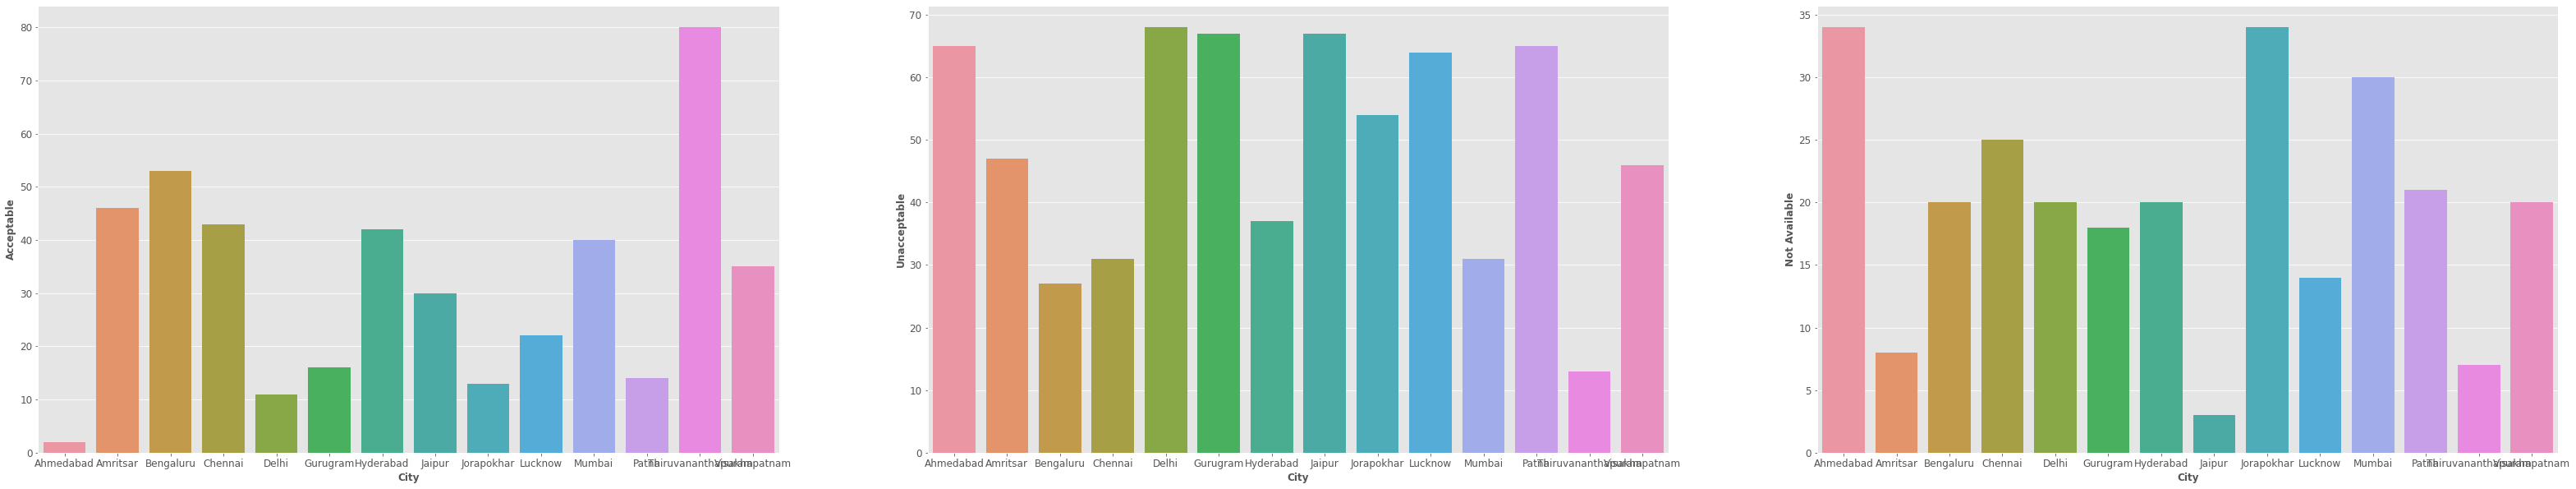

In [405]:
fig3, ax = plt.subplots(1,3,figsize=(55,10))
sns.barplot(x='City',y='Acceptable',data=wmr_aqi,ax=ax[0])
sns.barplot(x='City',y='Unacceptable',data=wmr_aqi,ax=ax[1])
sns.barplot(x='City',y='Not Available',data=wmr_aqi,ax=ax[2])
plt.show()

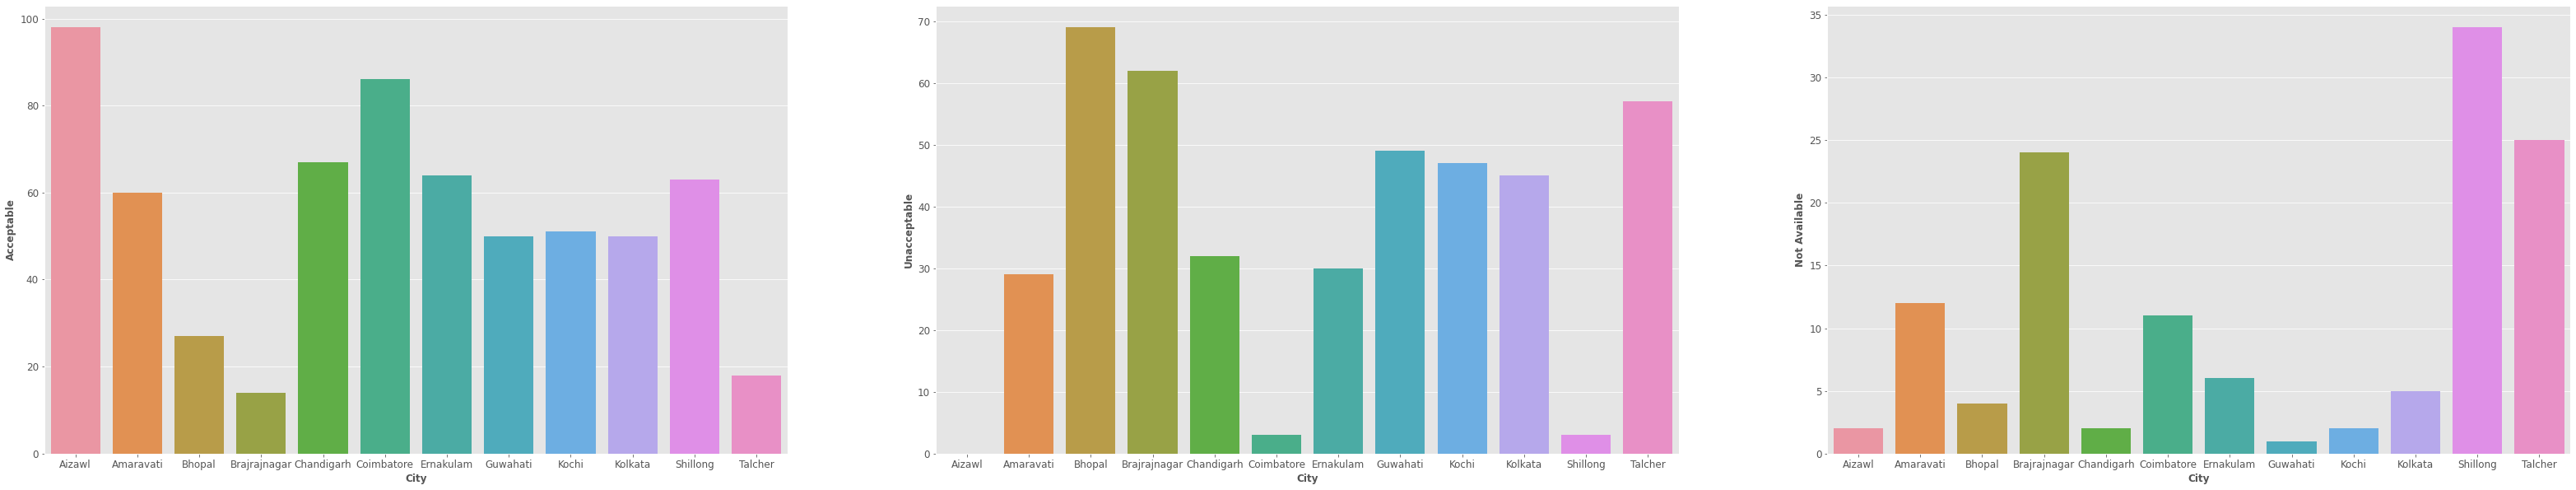

In [406]:
fig4, ax = plt.subplots(1,3,figsize=(55,10))
sns.barplot(x='City',y='Acceptable',data=wlr_aqi,ax=ax[0])
sns.barplot(x='City',y='Unacceptable',data=wlr_aqi,ax=ax[1])
sns.barplot(x='City',y='Not Available',data=wlr_aqi,ax=ax[2])
plt.show()

In the above visualization, I introduce a new way of classifying the AQI levels in order to simplify viz:
- If the AQI bucket is Good or Satisfactory, it's put into the **Acceptable** label => Means it does not harm people too much
- If the AQI bucket is Moderate, Poor, Very Poor or Severe, it's put into the **Unacceptable** label => Means it can cause harm to a healthy population
- **Missing** is a new label that takes into account the missing or null values of AQI buckets => Missing data is a red flag as it indicates poor administration or faulty apparatus


**Observations:**

- Over the last 5 years, Ahmedabad has had the lowest amount of Acceptable levels, 3rd highest amount of Unacceptable levels and the highest amount in terms of Missing levels in all WMR cities
    - Other cities that look troubled are Delhi, Gurugram, Patna, Lucknow, Jaipur and Jorapokhar
- Thiruvananthapuram is a happy outlier in that top bar plot
- Amongst the WLR cities, Bhopal looks the most troubled
    - Other cities in WLR that have recorded more Unacceptable days than Acceptable ones are Brajrajnagar and Talcher

<div class="h3">Which cities are under the radar as of now?</div>

With the analysis so far, a few cities have emerged as potential recipients of the monetary funding to improve their state. These are =>
- Ahmedabad: A very high percentage of the days it has registered measurements show unacceptable AQI levels
- Delhi: Same as Ahmedabad. Also, it's highly discussed in national and international media
- Kolkata: *The more stations, but less number of records* phenomenon puts Kolkata under scrutiny for poor administration
- Other cities that make it to this list are 
    - Gurugram
    - Patna
    - Lucknow
    - Jaipur
    - Jorapokhar
    - Bhopal
    - Brajrajnagar
    - Talcher

<div class="h3">Using a State Transition Idea to Prioritize Cities based on Air Pollution Levels</div><a class="anchor" id="statetransition"></a>

From above, we have 11 cities that make it into the list of cities we need to consider for monetary investment. What we need next is a way to filter these cities into 3 main cities. In this section, I discuss one approach: Modelling the Pollution in a City as a State(or Level) Transition diagram.

<div class="h3">The Idea</div><a class="anchor" id="idea"></a>
The AQI levels for a city is not uniform throughout the last 5 years. Sometimes, the level has been bad for human respiration and at other times, harmless. However, what if we hypothesized that the **AQI level of a city on day d depends on the AQI level of the same city on day (d-1)**. This does follow the Markovian property (though it is not completely based on it).  

AQI of a city on any given day is a result of several factors like:
- The population
- The vehicles on the road
- The industries
- and others...

Most of these factors will be common between days. Hence, if a particular city on a given day is on a given AQI level, there is a high chance it would remain in the same the next day. This helps to know a city is **bad** if this level is bad. But, it tells nothing about the **volatility of a city's AQI level**. Simply put, we want an ideal city that can change into an AQI level the next day if it has a bad one today. 

<div class="h3">The Method</div><a class="anchor" id="method"></a>
1. Convert the AQI levels in the dataset into 4 levels
    - Good and Satisfactory => Level 1
    - Moderate and Poor => Level 2
    - Very Poor and severe => Level 3
    - Not Available => Level 4
2. Create a transition matrix showing the probability of a day in a city to change to a Level i if it i's currently in Level j
3. Order the cities based on the probability for each city to transition from one level i to the next level j
    - If i > j, it is an improvement
    - If i < j, it is a deterioration
4. Cities that have high probabbilities of deterioration and low probabilities of improvement are the ones that need most focus

In [422]:
city_day['AQI_Bucket'] = city_day['AQI_Bucket'].fillna('Not Available')

def to_level(u):
    """Converting to a level"""
    
    if(u in ['Good', 'Satisfactory']):
        return 'Level 1'
    elif(u in ['Moderate', 'Poor']):
        return 'Level 2'
    elif(u in ['Very Poor', 'Severe']):
        return 'Level 3'
    elif(u == 'Not Available'):
        return 'Level 4'

def window(sequence, n=2):
    '''Source: https://stackoverflow.com/questions/47297585/building-a-transition-matrix-using-words-in-python-numpy'''
    """Sliding window width n from seq.  From old itertools recipes."""
    
    iterations = iter(sequence)
    result = tuple(islice(iterations, n))
    if len(result) == n:
        yield result
    for key in iterations:
        result = result[1:] + (key,)
        yield result
        
def make_trans_mat(states):
    """Make transition probability matrix"""
    
    # get the counts
    pairs = pd.DataFrame(window(states), columns=['Current', 'Next'])
    first = pairs.groupby('Current', as_index=False).agg({'Next': 'count'})
    first.columns = ['Current', 'Total']
    second = pd.DataFrame(pairs.groupby('Current')['Next'].value_counts())
    second.columns = ['Count']
    second = second.reset_index()
    
    # calculate probabilities
    matrix_prob = pd.merge(second, first)
    matrix_prob['Prob'] = matrix_prob['Count'] / matrix_prob['Total']
    matrix_prob = matrix_prob.pivot(index='Current', columns='Next', values='Prob').fillna(0)
    
    return matrix_prob

def model_city(city):
    """Build the model for a city"""
    
    # define states
    t_city = city_day[city_day['City']==city]
    t_city['Level'] = t_city['AQI_Bucket'].apply(to_level)
    
    # make_trans_mat
    possible_states = list(t_city['Level'])
    return make_trans_mat(possible_states)

def agg_models(cities):
    """Aggregate models"""
    
    # prep data
    i = 0
    c_name = cities[i]
    levels = model_city(cities[i])
    levels['City'] = c_name
    for i in range(1, len(cities)):
        city_df = model_city(cities[i])
        city_df['City'] = cities[i]
        levels = pd.concat([levels, city_df])
        
    # rename
    levels = levels[['Level 1', 'Level 2', 'Level 3', 'City']]
    levels = levels.fillna(0)
    return levels

def plot_probs(city_list, level_no, mode='imp'):
    """
    Plot probs for `cities` to transition into `level no`
    from any other level
    """
    
    nxt = f'Level {level_no}'
    
    # aggregate data
    e = agg_models(city_list).sort_values(by=nxt, ascending=False).reset_index()
    e = e[(e['Current']!=nxt) & (e['Current']!='Level 4')][['Current', nxt, 'City']]

    # overlook very small probabilities
    e[nxt] = round(e[nxt], 2)
    e = e[e[nxt]>0.0]
    
    # create the dataframes
    improvements = e[e['Current']>nxt].reset_index(drop=True)
    deteriorations = e[e['Current']<nxt].reset_index(drop=True)
    
    if(mode=='imp'):
        return improvements.style.set_caption(f'Improvements to Level {level_no}')\
            .background_gradient(cmap='inferno')
    elif(mode=='det'):
        return deteriorations.style.set_caption(f'Deteriorations to Level {level_no}')\
            .background_gradient(cmap='inferno')

In [423]:
model_city('Ahmedabad')

Next,Level 1,Level 2,Level 3,Level 4
Current,,,,
Level 1,0.727273,0.227273,0.000000,0.045455
Level 2,0.022989,0.744828,0.200000,0.032184
Level 3,0.001171,0.098361,0.878220,0.022248
Level 4,0.001481,0.026667,0.025185,0.946667


The above transition probability matrix can be visualized as follows:

<center><img src="https://github.com/ry05/aqi_project/blob/master/ahmedabad_transition.png?raw=true" width="900" height="700"></center>
<center><i>Credits: Author</i></center>
<br>

It shows that if a given day in Ahmedabad has an AQI classification lying in Level 2, there is a 21% chance for the next day to have a classification in Level 3(deterioration probability). And the probability for the next day to be Level 1(improvement probability) is as low as 2%!

In [424]:
plot_probs(Cities_WMR, 2, 'det')

,Current,Level 2,City
0,Level 1,0.340000,Jorapokhar
1,Level 1,0.320000,Patna
2,Level 1,0.280000,Delhi
3,Level 1,0.250000,Gurugram
4,Level 1,0.230000,Jaipur
5,Level 1,0.230000,Ahmedabad
6,Level 1,0.220000,Lucknow
7,Level 1,0.200000,Chennai
8,Level 1,0.200000,Visakhapatnam
9,Level 1,0.160000,Amritsar


**INSIGHTS**
- Jorapokhar has the highest probability of all cities in WMR to transition into Level 2 from Level 1 (34%)
- It is followed by Patna(32%), Delhi(28%), Gurugram(25%), Jaipur(23%) and Ahmedabad(23%) [Top 5]

In [426]:
plot_probs(Cities_WLR, 2, mode='det')

,Current,Level 2,City
0,Level 1,0.220000,Brajrajnagar
1,Level 1,0.200000,Talcher
2,Level 1,0.180000,Bhopal
3,Level 1,0.120000,Ernakulam
4,Level 1,0.120000,Chandigarh
5,Level 1,0.120000,Guwahati
6,Level 1,0.110000,Kochi
7,Level 1,0.080000,Amaravati
8,Level 1,0.060000,Kolkata
9,Level 1,0.020000,Coimbatore


**INSIGHTS**
- Amongst WLR cities, Brajrajnagar(22%) and Talcher(20%) are the top 2 cities in terms of deteriorations to level 2

In [427]:
plot_probs(Cities_WMR, 3, 'det')

,Current,Level 3,City
0,Level 2,0.200000,Ahmedabad
1,Level 2,0.120000,Delhi
2,Level 2,0.120000,Gurugram
3,Level 2,0.090000,Lucknow
4,Level 2,0.080000,Patna
5,Level 2,0.030000,Amritsar
6,Level 2,0.020000,Jorapokhar
7,Level 2,0.020000,Visakhapatnam
8,Level 2,0.010000,Jaipur
9,Level 2,0.010000,Hyderabad


**INSIGHTS**
- Ahmedabad has the highest(20%) chance of deteriorating to Level 3 the next day if it was at Level 2 today
- It's followed by Delhi(12%), Gurugram(12%), Lucknow(9%) and Patna(8%)

In [428]:
plot_probs(Cities_WLR, 3, mode='det')

,Current,Level 3,City
0,Level 2,0.120000,Guwahati
1,Level 2,0.050000,Talcher
2,Level 2,0.030000,Chandigarh
3,Level 2,0.030000,Brajrajnagar
4,Level 2,0.030000,Kolkata
5,Level 2,0.020000,Bhopal
6,Level 2,0.020000,Amaravati


**INSIGHTS**
- Guwahati has a 12% probability of going into level 3 the next day if its at level 2 today
- Talcher is second with a 5% probability

In [429]:
plot_probs(Cities_WMR, 2)

,Current,Level 2,City
0,Level 3,1.000000,Mumbai
1,Level 3,0.830000,Jaipur
2,Level 3,0.800000,Bengaluru
3,Level 3,0.650000,Hyderabad
4,Level 3,0.560000,Visakhapatnam
5,Level 3,0.530000,Chennai
6,Level 3,0.350000,Amritsar
7,Level 3,0.290000,Jorapokhar
8,Level 3,0.190000,Gurugram
9,Level 3,0.170000,Delhi


**INSIGHTS**
- Ahmedabad has the lowest probability(10%) of showing an improvement to level 2 the next day if it was at level 3 today
- Other cities that have low probs here are Patna(11%), Lucknow(15%), Delhi(17%) and Gurugram(19%)

In [431]:
plot_probs(Cities_WMR, 1)

,Current,Level 1,City
0,Level 2,0.290000,Thiruvananthapuram
1,Level 2,0.280000,Bengaluru
2,Level 2,0.210000,Chennai
3,Level 2,0.170000,Amritsar
4,Level 2,0.150000,Visakhapatnam
5,Level 2,0.130000,Hyderabad
6,Level 2,0.100000,Mumbai
7,Level 2,0.100000,Jaipur
8,Level 2,0.090000,Lucknow
9,Level 2,0.090000,Jorapokhar


**INSIGHTS**
- Ahmedabad has the lowest probability(2%) of showing an improvement to level 1 the next day if it was at level 2 today
- Other cities that have low probs here are Delhi(5%), Hyderabad(6%), Chennai(6%), Gurugram(7%) and Patna(8%)

In [433]:
plot_probs(Cities_WLR, 2)

,Current,Level 2,City
0,Level 3,1.000000,Chandigarh
1,Level 3,0.750000,Bhopal
2,Level 3,0.530000,Brajrajnagar
3,Level 3,0.500000,Amaravati
4,Level 3,0.330000,Guwahati
5,Level 3,0.170000,Talcher
6,Level 3,0.110000,Kolkata


**INSIGHTS**
- Kolkata has the lowest probability(11%) of showing an improvement to level 2 the next day if it was at level 3 today amongst the WLR cities
- Talcher follows with 17%

With the above insights provided by the **State Transition Idea**, we now can quantify the priority of each city involved more definitively.

<div class="h3">Which cities are under the radar now?</div>

As seen in all the analyses of the previous sections, **Ahmedabad** is a **high-priority city** when it comes to AQI. It has the highest probabilities to deteriorate from one level to the other (5th highest for level 1=>level2 and highest for level2=>level3). It also has the lowest probabilities to improve from one level to another.

Therefore, Ahmedabad is most likely the city that requires the initial monetary funding to improve its pollution.  

Other cities that are still under consideration for the second and third spots are =>
- Patna
- Delhi
- Gurugram
- Lucknow
- Kolkata
- Talcher
- Guwahati

<div class="h3">Unacceptable AQI Levels and Indeterminable AQI Levels - New metrics?</div><a class="anchor" id="levels"></a>
<br>

From a previous classification, there were 2 categories =>
* Acceptable (Good and Satisfactory AQI levels)
* Unacceptable (Moderate, Poor, Very Poor and Severe levels)
* Not Available (Missing AQI levels)

**NOTE:** The **Not Available** classification is better called as **Indeterminable** levels. It means that even if data is collected for individual pollutant levels, the collected data did not conform to the requirements to generate a final AQI bucket for the day.


**METRICS CREATED**

For this section, two key metrics are used:
* `Unacceptable AQI Level Percentage`(UALP) = (`Number of Unacceptable AQI Levels` / `Number of Records`) * 100
* `Indeterminable AQI Level Percentage`(IALP) = (`Number of Indeterminable AQI Levels` / `Number of Records`) * 100

`Record` => A record is registered when there is an entry for a given day in the dataset. A record for a given day does not indicate that the day has a determinable AQI level.


Ideally, a city that is high priority on the AQI index will have a high UALP. Having a high IALP indicates problems with the data collection of the city.

In [434]:
city_day

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,Not Available
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,Not Available
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,Not Available
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,Not Available
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [438]:
# convert to datetime
city_day['Date'] = pd.to_datetime(city_day['Date'])

# engineer into year, month
def ret_yr(x):
    
    return (x.strftime("%Y"))

def ret_mon(x):
    
    return (x.strftime("%B"))

city_day['Year'] = city_day['Date'].apply(ret_yr)
city_day['Month'] = city_day['Date'].apply(ret_mon)

# convert to BTX
city_day['BTX'] = city_day['Benzene'] + city_day['Toluene'] + city_day['Xylene']

In [440]:
city_day.head(3)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,BTX
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,Not Available,2015,January,0.02
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,Not Available,2015,January,12.95
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,Not Available,2015,January,25.45


In [444]:
def cnt_acceptable(series):
    
    return (list(series).count('Good') + (list(series).count('Satisfactory')))

def cnt_unacceptable(series):
    
    return (list(series).count('Moderate') + (list(series).count('Poor')) 
           + list(series).count('Very Poor') + list(series).count('Severe'))

def cnt_navailable(series):
    
    return (list(series).count('Not Available'))

In [445]:
# feature engineer
cd_total = city_day.groupby(['City', 'Year'], as_index=False).agg({'Date':'count'})
cd_total.columns = ['City', 'Year', 'Recorded']
cd_acceptable = city_day.groupby(['City', 'Year'], as_index=False).agg({'AQI_Bucket':cnt_acceptable})
cd_acceptable.columns = ['City', 'Year', 'Acceptable']
cd_acceptable = cd_acceptable.drop(['City', 'Year'], axis=1)
cd_unacceptable = city_day.groupby(['City', 'Year'], as_index=False).agg({'AQI_Bucket':cnt_unacceptable})
cd_unacceptable.columns = ['City', 'Year', 'Unacceptable']
cd_unacceptable = cd_unacceptable.drop(['City', 'Year'], axis=1)
cd_navailable = city_day.groupby(['City', 'Year'], as_index=False).agg({'AQI_Bucket':cnt_navailable})
cd_navailable.columns = ['City', 'Year', 'Not Available']
cd_navailable = cd_navailable.drop(['City', 'Year'], axis=1)

# filter it
yr_wise = pd.concat([cd_total, cd_acceptable, cd_unacceptable, cd_navailable], axis=1)
filtered = ['Ahmedabad', 'Patna', 'Delhi', 'Gurugram', 'Lucknow', 'Kolkata', 'Talcher', 'Guwahati']
yr_wise_f = yr_wise[yr_wise['City'].isin(filtered)]

# convert to percentages
yr_wise_f['Acceptable_Percent'] = round((yr_wise_f['Acceptable'] / yr_wise_f['Recorded']) * 100, 2)
yr_wise_f['Unacceptable_Percent'] = round((yr_wise_f['Unacceptable'] / yr_wise_f['Recorded']) * 100, 2)
yr_wise_f['Not_Available_Percent'] = round((yr_wise_f['Not Available'] / yr_wise_f['Recorded']) * 100, 2)

yr_wise_f['Year'] = yr_wise_f['Year'].astype('int')

In the visualization below, each subplot represents a year. The idea of the visualization is to show the transition of each of the 8 cities across the UALP and IALP measures for the last 6 years.

UALP is on the X Axis and IALP is on the Y Axis.

In [447]:
yr_wise_f

,City,Year,Recorded,Acceptable,Unacceptable,Not Available,Acceptable_Percent,Unacceptable_Percent,Not_Available_Percent
0,Ahmedabad,2015,365,9,254,102,2.47,69.59,27.95
1,Ahmedabad,2016,366,3,114,249,0.82,31.15,68.03
2,Ahmedabad,2017,365,1,68,296,0.27,18.63,81.10
3,Ahmedabad,2018,365,0,357,8,0.00,97.81,2.19
4,Ahmedabad,2019,365,0,352,13,0.00,96.44,3.56
5,Ahmedabad,2020,183,31,145,7,16.94,79.23,3.83
37,Delhi,2015,365,1,364,0,0.27,99.73,0.00
38,Delhi,2016,366,4,361,1,1.09,98.63,0.27
39,Delhi,2017,365,71,285,9,19.45,78.08,2.47
40,Delhi,2018,365,35,330,0,9.59,90.41,0.00


In [449]:
year = yr_wise_f[yr_wise_f['Year']==2015]
#sns.scatterplot(x='Unacceptable_Percent',y='Not_Available_Percent',data=year)
year

,City,Year,Recorded,Acceptable,Unacceptable,Not Available,Acceptable_Percent,Unacceptable_Percent,Not_Available_Percent
0,Ahmedabad,2015,365,9,254,102,2.47,69.59,27.95
37,Delhi,2015,365,1,364,0,0.27,99.73,0.00
44,Gurugram,2015,35,0,0,35,0.00,0.00,100.00
70,Lucknow,2015,365,36,248,81,9.86,67.95,22.19
82,Patna,2015,214,0,81,133,0.00,37.85,62.15


In [454]:
fig = make_subplots(rows=3, cols=2, subplot_titles=['2015', '2016', '2017', '2018', '2019', '2020'])

# add traces
year = yr_wise_f[yr_wise_f['Year']==2015]
fig.add_trace(go.Scatter(x=year['Unacceptable_Percent'],y=year['Not_Available_Percent'],
              mode='markers',text=year['City'],marker = dict(size=15),opacity=0.8,showlegend=False),row=1, col=1)

year = yr_wise_f[yr_wise_f['Year']==2016]
fig.add_trace(go.Scatter(x=year['Unacceptable_Percent'],y=year['Not_Available_Percent'],
              mode='markers',text=year['City'],
              marker = dict(size=15),opacity=0.8,showlegend=False),row=1, col=2)

year = yr_wise_f[yr_wise_f['Year']==2017]
fig.add_trace(go.Scatter(x=year['Unacceptable_Percent'],y=year['Not_Available_Percent'],
              mode='markers',text=year['City'],marker = dict(size=15),opacity=0.8,showlegend=False),row=2, col=1)

year = yr_wise_f[yr_wise_f['Year']==2018]
fig.add_trace(go.Scatter(x=year['Unacceptable_Percent'],y=year['Not_Available_Percent'],
              mode='markers',text=year['City'],marker = dict(size=15),opacity=0.8,showlegend=False),row=2, col=2)

year = yr_wise_f[yr_wise_f['Year']==2019]
fig.add_trace(go.Scatter(x=year['Unacceptable_Percent'],y=year['Not_Available_Percent'],
              mode='markers',text=year['City'],marker = dict(size=15),opacity=0.8,showlegend=False),row=3, col=1)

year = yr_wise_f[yr_wise_f['Year']==2020]
fig.add_trace(go.Scatter(x=year['Unacceptable_Percent'],y=year['Not_Available_Percent'],
              mode='markers',text=year['City'],marker = dict(size=15),opacity=0.8,showlegend=False),row=3, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="Percentage of Unacceptable AQI Levels", row=3, col=1, range=[-10,110])
fig.update_xaxes(title_text="Percentage of Unacceptable AQI Levels", row=3, col=2, range=[-10,110])

# Update yaxis properties
fig.update_yaxes(title_text="Percentage of Indeterminable AQI Levels", row=1, col=1, range=[-20,110])
fig.update_yaxes(title_text="", row=1, col=2, range=[-20,110])
fig.update_yaxes(title_text="Percentage of Indeterminable AQI Levels", row=2, col=1, range=[-20,110])
fig.update_yaxes(title_text="", row=2, col=2, range=[-20,110])
fig.update_yaxes(title_text="Percentage of Indeterminable AQI Levels", row=3, col=1, range=[-20,110])
fig.update_yaxes(title_text="", row=3, col=2, range=[-20,110])

fig.update_layout(template='ggplot2',
    title={"text": "Unacceptable AQI Levels vs Missing AQI Levels","font": {"family": "Rockwell", "size": 25},
        "xanchor": "center","yanchor": "top",},width=900,height=1200)
fig.show()

**INSIGHTS**

* As the years progress, a general trend sees the cities move towards the bottom right.
    * The bottom right is a region with high UALP and low IALP
    * This indicates that data collection has in general become better for these cities over the given time period
    * The year 2017 is an outlier in the sense that both Ahmedabad and Patna have shown a higher IALP measure than what they did have in 2016. Especially, Patna with a rise of about 50% from 2016 in the IALP. This however is restored to 1% in 2018. This does cast reasonable doubt.
* The following states are removed from this list of 8 states for the following reasons:
    * Talcher => It has a population of around 40,000 only which is way lesser than the other cities. So, a fair comparison is not possible
    * Guwahati => Data available only for 2019 and 2020
    * Kolkata => Data available for only 2018,2019 and 2020

**NOTE:** In an earlier statement, I had cast doubt on Kolkata's administration because of the lower number of records inspite of having more stations in place. This could be because Kolkata has only begun registering records since 2018(3 years lesser than the time for most other cities in this data)

The above visualization does provide insights. But, a more improve way of seeing a pattern would be using a bubble chart with only the 5 top cities (Ahmedabad, Delhi, Patna, Gurugram and Lucknow) in consideration.

<div class="h3">Comparing our top 5 cities on the basis of socio-economic factors</div><a class="anchor" id="socioeconomic"></a>

The analysis has so far focused on the specific AQI data available. However, to choose the most relevant cities to be provided the monetary investment, there is a need for comparing the filtered citites across other indicators. For this purpose, I am comparing the cities across 2 other indicators:
* Per Capita Income of the City(In INR)
* Population of Children under 6 years in the City

📚 **RELEVANCE OF THESE METRICS**

Direct consequences of air pollution are respiratory troubles and health disorders. Naturally, treating health issues is an expenditure. These treatments can at times be extra costs(or burden) on families that are not well off. Therefore, the **per capita income of a city** is a factor in deciding which city needs the investment to reduce air pollution and subsequently decrease medical expenditure due to respiratory problems.

Children are the most vulnerable of all age groups. Also, children have always been the most protected groups across human civilization. It is also a fact that children spend time outdoors playing games with their friends and tend to be in direct contact with air more. Therefore, cities with a larger **child population(under 6 years)** are to be given some consideration.

Finally, cities with low per capita income and high child population is to be given a very high priority as these fall under a *region of urgency*. 

💾 **SOURCE OF DATA**

The two indicators used in this section have been compiled from the following sources:

* Population of Children under 6 years in the City => [Top 500 Indian Cities - Based on 2011 Census](https://www.kaggle.com/zed9941/top-500-indian-cities)
* Per Capita Income of the City(INR) => 
    - Compiled manually from multiple sources
    - Ahmedabad: https://www.prsindia.org/sites/default/files/budget_files/State%20Budget%20Analysis%20-%20Gujarat%202020-21_Final.pdf
    - Delhi: https://www.prsindia.org/sites/default/files/budget_files/Delhi%20Budget%20Analysis%20-%202019-20.pdf
    - Gurgaon: https://economictimes.indiatimes.com/work-career/best-cities-to-move-into-if-you-are-starting-a-new-career/gurgaon/slideshow/55224194.cms
    - Patna: https://patna.nic.in/economy/#:~:text=As%20of%202015%2C%20GDP%20per,rate%20is%207.29%20per%20cent.
    - Lucknow: https://www.hindustantimes.com/lucknow/kasganj-s-per-capita-gdp-fourth-highest-in-uttar-pradesh/story-8tSlU6yrjAeF9H92835X5I.html
    
❗ **DISCLOSURE**

The data above has been collected through multiple different sources as there was no single source to get this from. There is some difference between the years when each city's per capita income was collected was collected. However, this difference is not more than 3 years with Patna's being the earliest at 2015 and Ahmedabad's the latest at 2017-18.

In [468]:
filtered = ['Ahmedabad', 'Patna', 'Delhi', 'Gurugram', 'Lucknow', 'Kolkata', 'Talcher', 'Guwahati']
city_f = city[city['name_of_city'].isin(filtered)]
final = pd.merge(
    left=yr_wise_f,
    right=city_f,
    left_on='City',
    right_on='name_of_city',
)

final = final[(final['City']!='Guwahati') & (final['City']!='Talcher') & (final['City']!='Kolkata')]
# area of each city in sq kms.
areas = pd.DataFrame({
    'City': ['Ahmedabad', 'Delhi', 'Gurugram', 'Lucknow', 'Patna'],
    'Area(km2)': [464, 1484, 732, 349, 136]
})
final = pd.merge(final, areas)
# per_capita_income
per_cap_inc = pd.DataFrame({
    'City': ['Ahmedabad', 'Delhi', 'Gurugram', 'Lucknow', 'Patna'],
    'Per_Capita_Income(INR)': [173000, 360644, 122000, 71000, 106000]
})
final = pd.merge(final, per_cap_inc)

In [469]:
# subset data
data = final[final['Year']==2015]

# comparing cities
fig = px.scatter(data, x="Per_Capita_Income(INR)", y="0-6_population_total",
           color="City", hover_name="City", size='Area(km2)', size_max=50, color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(template='ggplot2',
    title={
        "text": f"Comparing Cities by Area, Income and Child Population",
        "font": {"family": "Rockwell", "size": 25},
        "xanchor": "center",
        "yanchor": "top",
    },
    height=500,
    xaxis_title='Per Capita Income(INR)',
    yaxis_title='Child Population (0-6 years)',
)
fig.show()

**NOTE:** Size of the point represents geographical area of the city.


**INSIGHTS**

* Delhi has the highest child population, but also the largest per capita income. In fact, Delhi is an outlier in this 5 city group!
* Ahmedabad has already been identified as a highly polluted city w.r.t the **State/Level Transition Diagram** analysis before
    - In the above bubble plot, it can also be noticed that Ahmedabad has a high child population value
* The other 3 cities are of specific interest
* Lucknow is a city with a higher child population and lower per capita income than Patna and Gurugram. This makes it a *region of urgency*(relative to these 5 cities)
* Patna is between Lucknow and Gurugram in terms of the two factors considered here
* Gurugram has been noticed to have a sharp decline in AQI w.r.t to the other cities in previos analysis. However, it has a very low count of child population and a higher per capita income than the Patna and Lucknow

Based on the analysis so far, **Ahmedabad** is the city that should receive the initial funding for 3 years. This is because of the findings in the Level Transition Diagram-based approach that indicates Ahmedabad to have constantly deteriorating air quality and long periods of bad air quality and very little subsequent natural improvement. 

**Lucknow and Patna** are to be the 2 cities that should be funded if the funding to Ahmedabad is successful. This is because of the relative importance to these regions due to low income and high child population. 

**Why not Gurugram ❓** 
Gurugram has shown steep decline, no doubt. However, **it's a city with a larger area**. Moreover, being one of the fastest growing areas in the country the amount required to perform any kind of improvement or initiative to curb air pollution **will most likely be significantly higher**. Since there is such a doubt cast, Gurugram has been excluded from this top 3 list.

**Why not Delhi ❓**
Same reasons as that for Gurugram. But, in addition to that **Delhi's air pollution problem is internationally discussed**. Everybody is talking about it already. Therefore, it will probably receive funding from other sources. It is the other cities that are only placed in "lists of most polluted cities" and see little media visibility that require funding to improve the lives of its citizens.

<div class="h2">Rough Plan to Use the Investment</div><a class="anchor" id="investment"></a>

This section draws focus on some of the opportunities that the investment can be used for in order to improve the state of air quality in Ahmedabad, Lucknow and Patna. There are 3 main kinds of areas where I feel the funding can be applied:

![](https://github.com/ry05/aqi_project/blob/master/where_to_invest.png?raw=true)

## Invest in Clean Technology

**Clean technology** is any process, product or service that reduces negative environmental impacts through significant energy efficiency improvements, the sustainable use of resources, or environmental protection activities.([Source](https://en.wikipedia.org/wiki/Clean_technology)). A couple of ways the *uncle* could invest his money would be to

- Set up a Money-lending firm or bank
    - Provide low-interest loans for people to convert their vehicles into CNG-run from petrol-run or diesel-run
    - Provide incentives to those who are willing to give away their old fuel-driven vehicles and switch to electric-vehicles. The extra money could be used by the family for a purpose like long-term deposits for children
- Launch an Electric Carpool Startup*ask 
    - The traditional carpool system with only electric cars
    - Provide free rides and offers to attract people
    - This can generate livelihood for cab-drivers without causing pollution to the environment
    - Autorickshaw drivers can be targetted and brought into the revolution as [here](https://bengaluru.citizenmatters.in/e-rickshaws-air-pollution-bengaluru-policy-transport-28136#:~:text=According%20to%20it%2C%20in%20a,sector%20is%200.44%20million%20tonne.)
    - Under this startup, more solar-powered battery charge stations for any e-vehicle can be setup. This is important, sans this everything else fails

## Invest in Community-driven Change

Initiatives fail because people are not ready to accept it. People are not ready to accept because most initiatives and ideas are brought into effect without a public study or social research. Therefore, investment has to be put into creating an organization that would **ask people questions** and **act on their responses**. Basically, bring about effective change in existing behaviour of citizens, by involving them as key stakeholders in any relevant policy decision.

- Ask the Right Questions
    - Use social surveys to collect data
    - Make data open, but maintain ethical standards
    - Understand the *why* behind behaviours
        - Why do people not change their polluting vehicles?
        - Why do people not adhere to government regulations?
        - Why do people not want to carpool?
        - Is their cultural relevance to how people's lifestyles are?
- Make People Responsible
    - Involve local communities like for example, an apartment locality
    - Make people take initiative, rather than wait for govt. policy

## Invest in Making Connections

Alone, it will be difficult to make a change. So, its important to form the right partnerships. Develop plans with corporations to help out as part of their CSR. Create accountability by keeping all transactions open and public. 

<div class="h3">How to measure progress?</div>

Progress in Ahmedabad after the first 3 years can be measured based on the following metrics:

- UALP
    - Unacceptable AQI Level Day Percentage
    - Investment has been succesful if UALP has declined constantly(atleast by 10%) for the last 3 years(With no increase in IALP by more than 3%)
    - As of 2019, UALP measures were as follows:
        - Ahmedabad = 96.44%
        - Lucknow = 79.45%
        - Patna = 83.56%
    - If the plan works, Ahmedabad will see a UALP of atmost 66.44% by 2024. 
- IALP
    - Indeterminable AQI Level Day Percentage
    - It is also a responsibility to ensure that IALP never rises above 3% in any of the next 3 years
- Number of e-carpool cars in each city
    - Also include a count of number of cab drivers who have switched to e-carpool
    - Any increase in the proportion of e-vehicles is positive
    
There can definitely be more metrics created from the **Rough Plan** demonstrated before. In a real-world scenario, metrics need to be defined by taking way more parameters into consideration. Hence, I shall stop at these 3 simple metrics.

<div class="h2">References</div><a class="anchor" id="references"></a>

### Domain Knowledge References
1. [Air Pollutants](https://en.wikipedia.org/wiki/Air_pollution#Pollutants)
2. [UNEP Monitoring Air Quality](https://www.unep.org/explore-topics/air/what-we-do/monitoring-air-quality)
3. [UNEP's Air Programme](https://www.unep.org/explore-topics/air)
4. [UNEP's 2016 report on "Actions on Air Quality"](https://www.unenvironment.org/resources/assessment/actions-air-quality?_ga=2.209423066.934997296.1598950157-760778986.1598950157)
5. [UNEP's Air Programme](https://www.unep.org/explore-topics/air)
6. [Ministry of Environment, Forestry and Climate Change - Govt. of India](http://moef.gov.in/environment/pollution/)

### Kaggle Kernels for Inspiration
1. https://www.kaggle.com/romandovega/chaieda-air-quality-in-india-eda-using-tableau 
2. https://www.kaggle.com/parulpandey/breathe-india-covid-19-effect-on-pollution
3. https://www.kaggle.com/rohanrao/calculating-aqi-air-quality-index-tutorial